# Exploratory Data Analysis (EDA) on Phenotypic_V1_0b_preprocessed1.csv

This notebook performs exploratory data analysis (EDA) on the `Phenotypic_V1_0b_preprocessed1.csv` dataset to understand its structure, identify patterns, and visualize relationships between variables.


## Preliminary Analysis: Understanding the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from itertools import chain

In [2]:
file_path = '../data/Phenotypic_V1_0b_preprocessed1.csv'
phenotypic_data = pd.read_csv(file_path)
phenotypic_data.head()

Unnamed: 0.1  Unnamed: 0  SUB_ID  X  subject SITE_ID       FILE_ID  \
0             0           1   50002  1    50002    PITT   no_filename   
1             1           2   50003  2    50003    PITT  Pitt_0050003   
2             2           3   50004  3    50004    PITT  Pitt_0050004   
3             3           4   50005  4    50005    PITT  Pitt_0050005   
4             4           5   50006  5    50006    PITT  Pitt_0050006   

   DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  qc_notes_rater_1 qc_anat_rater_2  \
0         1          1        16.77  ...               NaN              OK   
1         1          1        24.45  ...               NaN              OK   
2         1          1        19.09  ...               NaN              OK   
3         1          1        13.73  ...               NaN              OK   
4         1          1        13.37  ...               NaN              OK   

   qc_anat_notes_rater_2  qc_func_rater_2   qc_func_notes_rater_2  \
0                    NaN             fail  ic-parietal-cerebellum   
1                    NaN               OK                     NaN   
2                    NaN               OK                     NaN   
3                    NaN            maybe  ic-parietal-cerebellum   
4                    NaN            maybe      ic-parietal slight   

   qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
0               OK                   NaN            fail   
1               OK                   NaN              OK   
2               OK                   NaN              OK   
3               OK                   NaN              OK   
4               OK                   NaN              OK   

  qc_func_notes_rater_3  SUB_IN_SMP  
0             ERROR #24           1  
1                   NaN           1  
2                   NaN           1  
3                   NaN           0  
4                   NaN           1  

[5 rows x 106 columns]

phenotypic_data is the dataframe that will be kept as reference for further analysis, while data is the one that will be modified.

In [3]:
data = phenotypic_data.copy()

### Explanation of the Data

Information and Data Legend Source: https://fcon_1000.projects.nitrc.org/indi/abide/ABIDEII_Data_Legend.pdf

There are over 106 columns (features), and 1112 entries (subjects).

**DX_GROUP** is the target variable with a coding specification of 1=ASD and 2=NON-ASD.

In [4]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1112
Number of columns: 106


In [5]:
list(data.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'SUB_ID',
 'X',
 'subject',
 'SITE_ID',
 'FILE_ID',
 'DX_GROUP',
 'DSM_IV_TR',
 'AGE_AT_SCAN',
 'SEX',
 'HANDEDNESS_CATEGORY',
 'HANDEDNESS_SCORES',
 'FIQ',
 'VIQ',
 'PIQ',
 'FIQ_TEST_TYPE',
 'VIQ_TEST_TYPE',
 'PIQ_TEST_TYPE',
 'ADI_R_SOCIAL_TOTAL_A',
 'ADI_R_VERBAL_TOTAL_BV',
 'ADI_RRB_TOTAL_C',
 'ADI_R_ONSET_TOTAL_D',
 'ADI_R_RSRCH_RELIABLE',
 'ADOS_MODULE',
 'ADOS_TOTAL',
 'ADOS_COMM',
 'ADOS_SOCIAL',
 'ADOS_STEREO_BEHAV',
 'ADOS_RSRCH_RELIABLE',
 'ADOS_GOTHAM_SOCAFFECT',
 'ADOS_GOTHAM_RRB',
 'ADOS_GOTHAM_TOTAL',
 'ADOS_GOTHAM_SEVERITY',
 'SRS_VERSION',
 'SRS_RAW_TOTAL',
 'SRS_AWARENESS',
 'SRS_COGNITION',
 'SRS_COMMUNICATION',
 'SRS_MOTIVATION',
 'SRS_MANNERISMS',
 'SCQ_TOTAL',
 'AQ_TOTAL',
 'COMORBIDITY',
 'CURRENT_MED_STATUS',
 'MEDICATION_NAME',
 'OFF_STIMULANTS_AT_SCAN',
 'VINELAND_RECEPTIVE_V_SCALED',
 'VINELAND_EXPRESSIVE_V_SCALED',
 'VINELAND_WRITTEN_V_SCALED',
 'VINELAND_COMMUNICATION_STANDARD',
 'VINELAND_PERSONAL_V_SCALED',
 'VINELAND_DOME

In [6]:
data['SITE_ID'].value_counts()

SITE_ID
NYU         184
UM_1        110
USM         101
UCLA_1       82
PITT         57
MAX_MUN      57
YALE         56
KKI          55
TRINITY      49
STANFORD     40
CALTECH      38
SDSU         36
OLIN         36
UM_2         35
LEUVEN_2     35
SBL          30
LEUVEN_1     29
OHSU         28
UCLA_2       27
CMU          27
Name: count, dtype: int64

In [7]:
column_labels = data.columns
variable_types = data.dtypes.replace({np.dtype('O'): 'String', 'int64': 'Numeric', 'float64': 'Numeric'}).values
top_unique_values = ["-" for _ in column_labels]

min_values = ["-" for _ in column_labels]
max_values = ["-" for _ in column_labels]

for col in column_labels:
    if col in data.select_dtypes(include=[np.number]).columns:
        min_values[data.columns.get_loc(col)] = data[col].min()
        max_values[data.columns.get_loc(col)] = data[col].max()

for col in column_labels:
    if data[col].dtype == 'int64' or data[col].dtype == 'object':
        value_counts = data[col].value_counts().head(10)
        if not value_counts.empty:
            top_unique_values[data.columns.get_loc(col)] = ', '.join([f"{val} ({count})" for val, count in value_counts.items()])
        else:
            top_unique_values[data.columns.get_loc(col)] = "-"

legend_data = {
    "COLUMN LABEL": column_labels,
    "VARIABLE TYPE": variable_types,
    "TOP UNIQUE VALUES": top_unique_values,
    "MIN": min_values,
    "MAX": max_values,
}

In [8]:
df_legend_direct = pd.DataFrame(legend_data)

In [9]:
print("Features with Continuous Values :", df_legend_direct[df_legend_direct["TOP UNIQUE VALUES"] == "-"].shape[0])
df_legend_direct[df_legend_direct["TOP UNIQUE VALUES"] == "-"].drop(columns=["TOP UNIQUE VALUES"])

Features with Continuous Values : 77


COLUMN LABEL VARIABLE TYPE       MIN        MAX
9         AGE_AT_SCAN       Numeric      6.47       64.0
12  HANDEDNESS_SCORES       Numeric   -9999.0      100.0
13                FIQ       Numeric   -9999.0      148.0
14                VIQ       Numeric   -9999.0      180.0
15                PIQ       Numeric   -9999.0      157.0
..                ...           ...       ...        ...
90       func_quality       Numeric  0.001693   0.098614
91       func_mean_fd       Numeric  0.016117   1.434912
92        func_num_fd       Numeric       0.0      288.0
93       func_perc_fd       Numeric       0.0  91.735537
94           func_gsr       Numeric -0.015812   0.104225

[77 rows x 4 columns]

In [10]:
print("Features with Categorical Values :",df_legend_direct[df_legend_direct["TOP UNIQUE VALUES"] != "-"].shape[0])
df_legend_direct[df_legend_direct["TOP UNIQUE VALUES"] != "-"]

Features with Categorical Values : 29


COLUMN LABEL VARIABLE TYPE  \
0             Unnamed: 0.1       Numeric   
1               Unnamed: 0       Numeric   
2                   SUB_ID       Numeric   
3                        X       Numeric   
4                  subject       Numeric   
5                  SITE_ID        String   
6                  FILE_ID        String   
7                 DX_GROUP       Numeric   
8                DSM_IV_TR       Numeric   
10                     SEX       Numeric   
11     HANDEDNESS_CATEGORY        String   
16           FIQ_TEST_TYPE        String   
17           VIQ_TEST_TYPE        String   
18           PIQ_TEST_TYPE        String   
43             COMORBIDITY        String   
44      CURRENT_MED_STATUS        String   
45         MEDICATION_NAME        String   
76      EYE_STATUS_AT_SCAN       Numeric   
95              qc_rater_1        String   
96        qc_notes_rater_1        String   
97         qc_anat_rater_2        String   
98   qc_anat_notes_rater_2        String   
99         qc_func_rater_2        String   
100  qc_func_notes_rater_2        String   
101        qc_anat_rater_3        String   
102  qc_anat_notes_rater_3        String   
103        qc_func_rater_3        String   
104  qc_func_notes_rater_3        String   
105             SUB_IN_SMP       Numeric   

                                     TOP UNIQUE VALUES    MIN    MAX  
0    0 (1), 739 (1), 745 (1), 744 (1), 743 (1), 742...      0   1111  
1    1 (1), 740 (1), 746 (1), 745 (1), 744 (1), 743...      1   1112  
2    50002 (1), 51055 (1), 51061 (1), 51060 (1), 51...  50002  51607  
3    1 (1), 740 (1), 746 (1), 745 (1), 744 (1), 743...      1   1112  
4    50002 (1), 51055 (1), 51061 (1), 51060 (1), 51...  50002  51607  
5    NYU (184), UM_1 (110), USM (101), UCLA_1 (82),...      -      -  
6    no_filename (77), NYU_0051081 (1), NYU_0051051...      -      -  
7                                     2 (573), 1 (539)      1      2  
8    0 (558), 1 (347), 2 (93), -9999 (72), 3 (36), ...  -9999      4  
10                                    1 (948), 2 (164)      1      2  
11   R (693), L (71), Ambi (15), -9999 (11), Mixed ...      -      -  
16   WASI (551), WISC_IV_FULL (103), WAIS_III (63),...      -      -  
17   WASI (513), PPVT (118), DAS_II_SA (69), WISC_I...      -      -  
18   WASI (513), Ravens (114), DAS_II_SA (70), WISC...      -      -  
43   ADHD Inattentive (10), ADHD Combined (4), Mood...      -      -  
44                  0 (673), 1 (136), -9999 (7), ` (1)      -      -  
45   0 (24), Fluoxetine (6), Methylphenidate Extend...      -      -  
76                                    1 (765), 2 (347)      1      2  
95                     OK (997), fail (111), maybe (4)      -      -  
96   dorsal cropped (16), **Not recommended with ni...      -      -  
97                    OK (866), maybe (194), fail (40)      -      -  
98   skull-striping fail (98), skull-striping fail;...      -      -  
99                    OK (842), maybe (207), fail (51)      -      -  
100  ic-cerebellum (130), Ic-parietal (27), ic-cere...      -      -  
101                              OK (1003), fail (108)      -      -  
102  headmotion (62), noise (18), half head (11), n...      -      -  
103                               OK (1035), fail (76)      -      -  
104  no T1 (11), no func images (11), ERROR #5 (3),...      -      -  
105                                   1 (763), 0 (349)      0      1

**Automated QA** (11 columns)

Source: http://preprocessed-connectomes-project.org/abide/quality_assessment.html

These columns reflect automated metrics with descriptions given further down. To determine outliers one might use 1.5x or 3x the inter-quartile range (IQR). Here, we provide a list of the columns for automated anatomical or functional quality assessment.

For each point below, the given measure is described via the following format: “Measure - Column: Summary”

**Anatomical** - *6 columns*

These columns reflect automated metrics with descriptions given further down. To determine outliers one might use 1.5x or 3x the inter-quartile range (IQR). 


* [ **anat_cnr** ] **Contrast to Noise Ratio** : Calculated as the mean of the gray matter values minus the mean of the white matter values, divided by the standard deviation of the air values 1.
* [ **anat_efc** ] **Entropy Focus Criterion** : Shannon’s entropy is used to summarize the principal directions distribution, higher energy indicating the distribution is more uniform (i.e., less noisy) 2.
* [ **anat_fber** ] **Foreground to Background Energy Ratio** : Mean energy of image values (i.e., mean of squares) within the head relative to outside the head.
* [ **anat_fwhm** ] **Smoothness of Voxels** : The full-width half maximum (FWHM) of the spatial distribution of the image intensity values in terms of voxels (e.g., a value of 3 implies smoothness of 3 voxels) 3.
* [ **anat_qi1** ] **Percent of Artifact Voxels** : The proportion of voxels with intensity corrupted by artifacts normalized by the number of voxels in the background 4.
* [ **anat_snr** ] **Signal to Noise Ratio** : The mean of image values within gray matter divided by the standard deviation of the image values within air (i.e., outside the head) 1.


In [11]:
data[['anat_cnr', 'anat_efc','anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr']]

anat_cnr  anat_efc  anat_fber  anat_fwhm  anat_qi1   anat_snr
0     10.201539  1.194664  16.223458   3.878000  0.152711  12.072452
1      7.165701  1.126752  10.460008   4.282238  0.161716   9.241155
2      7.698144  1.226218   9.725750   3.881684  0.174186   9.323463
3      9.071807  1.256278  11.198226   3.628667  0.119269  10.814200
4      8.026798  1.407166   6.282055   3.674539  0.130647  10.123574
...         ...       ...        ...        ...       ...        ...
1107   3.899774  1.697271   3.465151   3.318830  0.096813   5.434540
1108   2.757735  1.073076   7.633618   3.309370  0.104817   4.516250
1109   3.413469  1.358238   4.335700   3.324550  0.109490   4.933960
1110   7.839007  1.754363  12.270055   3.232170  0.083964  16.403174
1111  12.169297  2.818352   9.272107   3.510190  0.044310  23.565982

[1112 rows x 6 columns]

**Functional** - *9 columns*

Note that some metrics quantify the quality of the data in the spatial domain (columns: func_efc, func_fber, func_fwhm, and func_gsr) and use the mean functional image for this purpose. Other metrics quantify the quality of the data in the temporal domain (columns: func_dvars, func_outlier, func_quality, func_mean_fd, func_num_fd, and func_perc_fd) and use the voxelwise time-series functional data.

* [ **func_efc** ] **Entopy Focus Criterion** : Shannon’s entropy is used to summarize the principal directions distribution, higher energy indicating the distribution is more uniform (i.e., less noisy) 2. Uses mean functional.
*  [ **func_fber** ] **Foreground to Background Energy Ratio**: Mean energy of image values (i.e., mean of squares) within the head relative to outside the head. Uses mean functional.
* [ **func_fwhm** ] **Smoothness of Voxels** : The full-width half maximum (FWHM) of the spatial distribution of the image intensity values. Uses mean functional.
* [ **func_dvars** ] **Standardized DVARS** : The spatial standard deviation of the temporal derivative of the data, normalized by the temporal standard deviation and temporal autocorrelation 56. Uses functional time-series.
*  [ **func_outlier** ] **Fraction of Outlier Voxels** : The mean fraction of outliers found in each volume using 3dTout command in AFNI (http://afni.nimh.nih.gov/afni) 7. Uses functional time-series.
* [ **func_quality** ] **Mean Distance to Median Volume** : The mean distance (1 – spearman’s rho) between each time-point’s volume and the median volume using AFNI’s 3dTqual command (http://afni.nimh.nih.gov/afni) 7. Uses functional time-series.
* [ **func_mean_fd** ] **Mean Framewise Displacement (FD)** : A measure of subject head motion, which compares the motion between the current and previous volumes. This is calculated by summing the absolute value of displacement changes in the x, y and z directions and rotational changes about those three axes. The rotational changes are given distance values based on the changes across the surface of a 50mm radius sphere 58. Uses functional time-series.
* [ **func_num_fd** ] **Number FD greater than 0.2mm** : The number of frames or volumes with displacement greater than 0.2mm. This is not shown below. Uses functional time-series.
* [ **func_perc_fd** ] **Percent FD greater than 0.2mm** : The percent of frames or volumes with displacement greater than 0.2mm. Uses functional time-series.
* [ **func_gsr** ] **Ghost to Signal Ratio** : A measure of the mean signal in the ‘ghost’ image (signal present outside the brain due to acquisition in the phase encoding direction) relative to mean signal within the brain. Uses mean functional.

In [12]:
data[['func_efc', 'func_fber','func_fwhm', 'func_dvars', 'func_outlier', 'func_quality', 'func_mean_fd', 'func_num_fd', 'func_perc_fd']]

func_efc   func_fber  func_fwhm  func_dvars  func_outlier  func_quality  \
0     0.613128   45.446551   1.873339    1.054931      0.000641      0.011443   
1     0.578301   56.286350   2.012112    0.949857      0.000474      0.031781   
2     0.578960   63.317943   1.866104    1.180605      0.008262      0.014260   
3     0.556064   70.800354   1.918278    1.092030      0.001711      0.019205   
4     0.562942   75.364679   2.213873    1.086830      0.001500      0.006919   
...        ...         ...        ...         ...           ...           ...   
1107  0.507184   91.232616   2.022145    1.278364      0.001204      0.006403   
1108  0.486408  108.510115   2.064103    1.122410      0.001508      0.012669   
1109  0.465152   90.100651   2.157835    1.110226      0.002469      0.008923   
1110  0.573711   77.402099   1.780653    1.152828      0.000784      0.005814   
1111  0.611418   41.857515   1.786400    1.090482      0.001172      0.007255   

      func_mean_fd  func_num_fd  func_perc_fd  
0         0.116828          8.0      3.980100  
1         0.322092        135.0     67.164179  
2         0.127745         29.0     14.427861  
3         0.128136         22.0     10.945274  
4         0.070143          3.0      1.492537  
...            ...          ...           ...  
1107      0.116186         24.0     11.940299  
1108      0.140171         37.0     18.407960  
1109      0.154887         52.0     25.870647  
1110      0.048246          0.0      0.000000  
1111      0.168913         44.0     36.363636  

[1112 rows x 9 columns]

**Manual inspection** - *10 columns*

Manual Inspection of the data was carried out by three independent raters. Rater 1 examined the general quality of the data focusing on the preprocessed functional data and derivatives. Raters 2-3 examined the quality of the raw anatomical and functional data. Ratings are given as OK and fail for raters 1 and 3, and OK, maybe, and fail for rater 2. Each rater also may have taken notes related to their ratings, thus there is a notes column associated with each rating column.

In [13]:
data[['qc_rater_1', 'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3']]

qc_rater_1 qc_notes_rater_1 qc_anat_rater_2 qc_anat_notes_rater_2  \
0          fail              NaN              OK                   NaN   
1            OK              NaN              OK                   NaN   
2            OK              NaN              OK                   NaN   
3            OK              NaN              OK                   NaN   
4            OK              NaN              OK                   NaN   
...         ...              ...             ...                   ...   
1107         OK              NaN              OK                   NaN   
1108         OK              NaN              OK                   NaN   
1109         OK              NaN              OK                   NaN   
1110         OK              NaN              OK                   NaN   
1111         OK              NaN              OK                   NaN   

     qc_func_rater_2        qc_func_notes_rater_2 qc_anat_rater_3  \
0               fail       ic-parietal-cerebellum              OK   
1                 OK                          NaN              OK   
2                 OK                          NaN              OK   
3              maybe       ic-parietal-cerebellum              OK   
4              maybe           ic-parietal slight              OK   
...              ...                          ...             ...   
1107              OK  ic-cerebellum-temporal_lobe              OK   
1108           maybe                vmpfc dropout              OK   
1109           maybe  ic-cerebellum-temporal_lobe              OK   
1110           maybe                ic-cerebellum              OK   
1111           maybe                ic-cerebellum              OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  
0                      NaN            fail             ERROR #24  
1                      NaN              OK                   NaN  
2                      NaN              OK                   NaN  
3                      NaN              OK                   NaN  
4                      NaN              OK                   NaN  
...                    ...             ...                   ...  
1107                   NaN              OK                   NaN  
1108                   NaN              OK                   NaN  
1109                   NaN              OK                   NaN  
1110                   NaN              OK                   NaN  
1111                   NaN              OK                   NaN  

[1112 rows x 10 columns]

### Distribution and Statistics of the Dataset

Before we can proceed, for the sake of cohesion and to get an accurate analysis of the data, we will set all the values -9999 to NaN, since they are used to express missing values in the dataset.

In [14]:
data = data.replace([-9999.0, '-9999', 'no_filename'], np.NaN)

Additionally, since we only want subjects with FMRI scans, we will drop the rows with NaNs in the FILE_ID column

In [15]:
data = data.dropna(subset='FILE_ID')

In [16]:
data

Unnamed: 0.1  Unnamed: 0  SUB_ID     X  subject  SITE_ID  \
1                1           2   50003     2    50003     PITT   
2                2           3   50004     3    50004     PITT   
3                3           4   50005     4    50005     PITT   
4                4           5   50006     5    50006     PITT   
5                5           6   50007     6    50007     PITT   
...            ...         ...     ...   ...      ...      ...   
1107          1107        1108   51583  1108    51583      SBL   
1108          1108        1109   51584  1109    51584      SBL   
1109          1109        1110   51585  1110    51585      SBL   
1110          1110        1111   51606  1111    51606  MAX_MUN   
1111          1111        1112   51607  1112    51607  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
1         Pitt_0050003         1        1.0        24.45  ...   
2         Pitt_0050004         1        1.0        19.09  ...   
3         Pitt_0050005         1        1.0        13.73  ...   
4         Pitt_0050006         1        1.0        13.37  ...   
5         Pitt_0050007         1        1.0        17.78  ...   
...                ...       ...        ...          ...  ...   
1107       SBL_0051583         1        2.0        35.00  ...   
1108       SBL_0051584         1        2.0        49.00  ...   
1109       SBL_0051585         1        1.0        27.00  ...   
1110  MaxMun_a_0051606         1        2.0        29.00  ...   
1111  MaxMun_a_0051607         1        2.0        26.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
1                  NaN              OK                    NaN   
2                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
4                  NaN              OK                    NaN   
5                  NaN              OK                    NaN   
...                ...             ...                    ...   
1107               NaN              OK                    NaN   
1108               NaN              OK                    NaN   
1109               NaN              OK                    NaN   
1110               NaN              OK                    NaN   
1111               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
1                  OK                          NaN               OK   
2                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
4               maybe           ic-parietal slight               OK   
5               maybe   ic-cerebellum_temporal_lob               OK   
...               ...                          ...              ...   
1107               OK  ic-cerebellum-temporal_lobe               OK   
1108            maybe                vmpfc dropout               OK   
1109            maybe  ic-cerebellum-temporal_lobe               OK   
1110            maybe                ic-cerebellum               OK   
1111            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
1                      NaN              OK                   NaN           1  
2                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
4                      NaN              OK                   NaN           1  
5                      NaN              OK                   NaN           1  
...                    ...             ...                   ...         ...  
1107                   NaN              OK                   NaN           0  
1108                   NaN              OK                   NaN           0  
1109                   NaN              OK                   NaN           0  
1110    

In [17]:
data.shape

(1035, 106)

C:\Users\merye\AppData\Local\Temp\ipykernel_21456\374064799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DX_GROUP', data=data, palette='viridis', ax=axes[0, 1])
C:\Users\merye\AppData\Local\Temp\ipykernel_21456\374064799.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SITE_ID', data=data, palette='coolwarm', order=data['SITE_ID'].value_counts().index, ax=axes[1, 0])


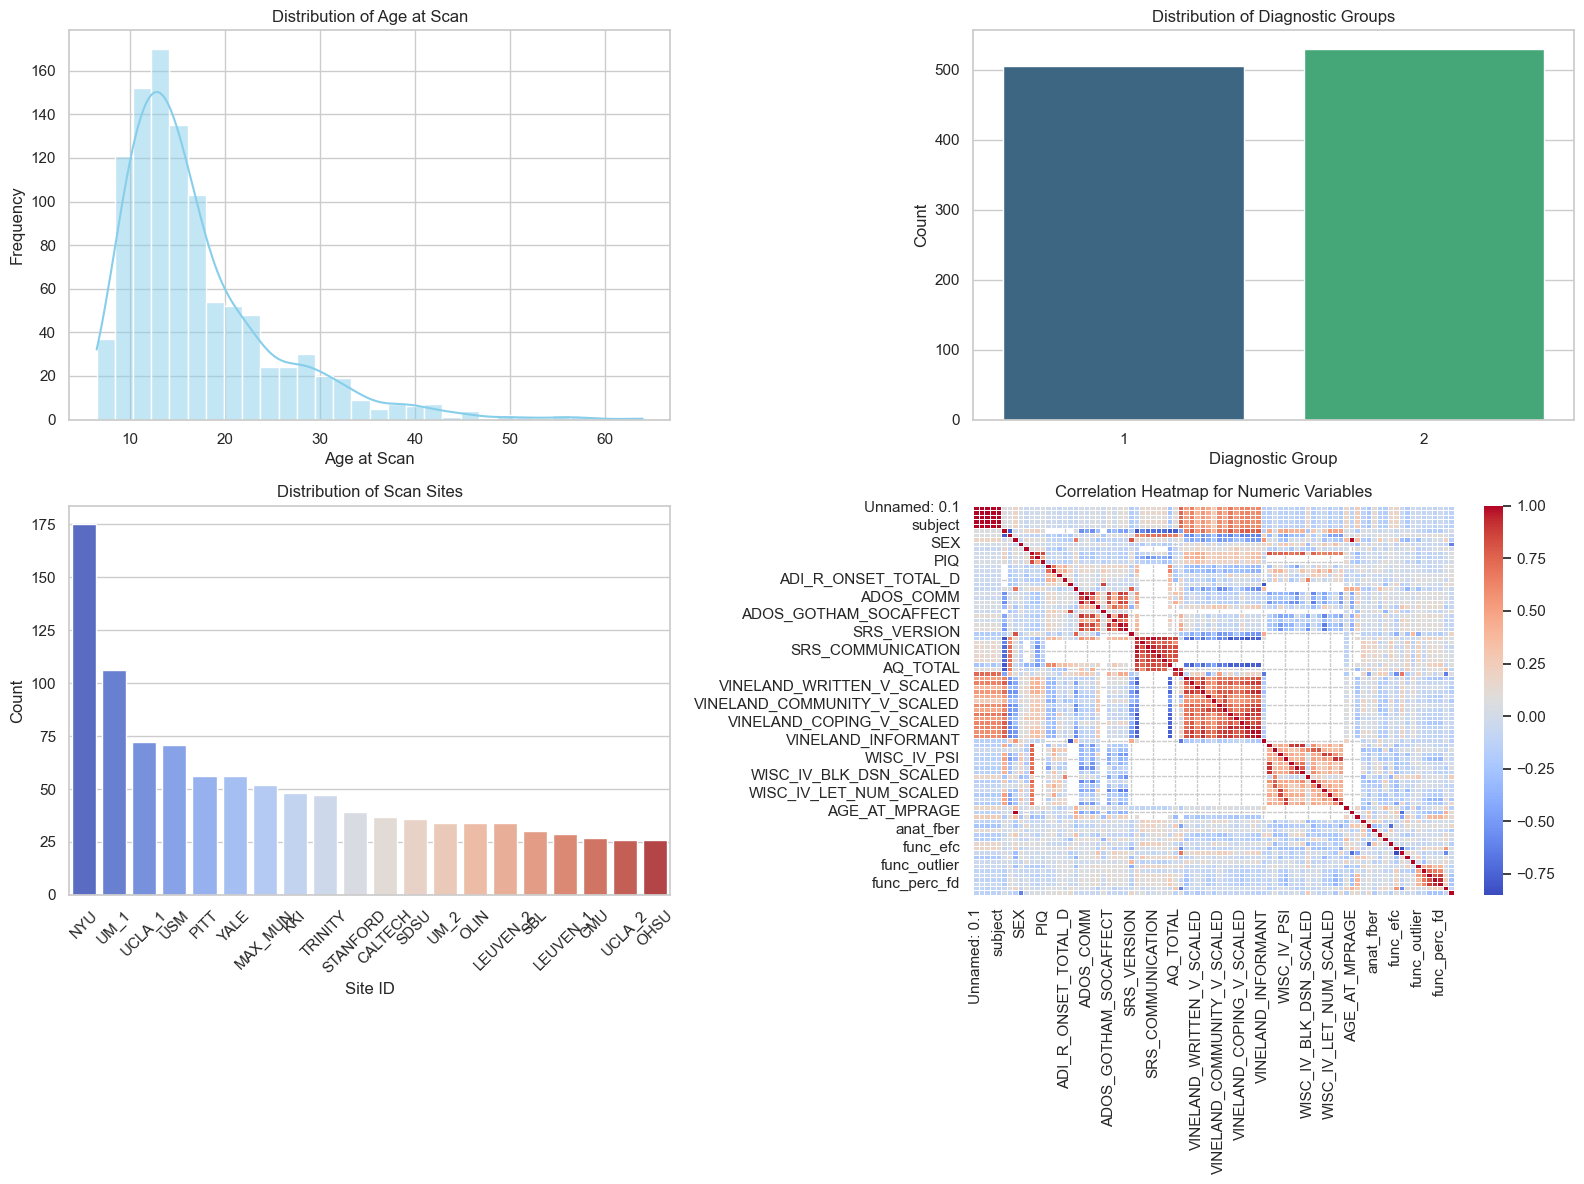

In [18]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data['AGE_AT_SCAN'].dropna(), bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age at Scan')
axes[0, 0].set_xlabel('Age at Scan')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(x='DX_GROUP', data=data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Diagnostic Groups')
axes[0, 1].set_xlabel('Diagnostic Group')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='SITE_ID', data=data, palette='coolwarm', order=data['SITE_ID'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Scan Sites')
axes[1, 0].set_xlabel('Site ID')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap for Numeric Variables')

plt.tight_layout()
plt.show()

C:\Users\merye\AppData\Local\Temp\ipykernel_21456\4262269506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SITE_ID', y='AGE_AT_SCAN', data=data, palette='pastel', ax=axes[0, 0])


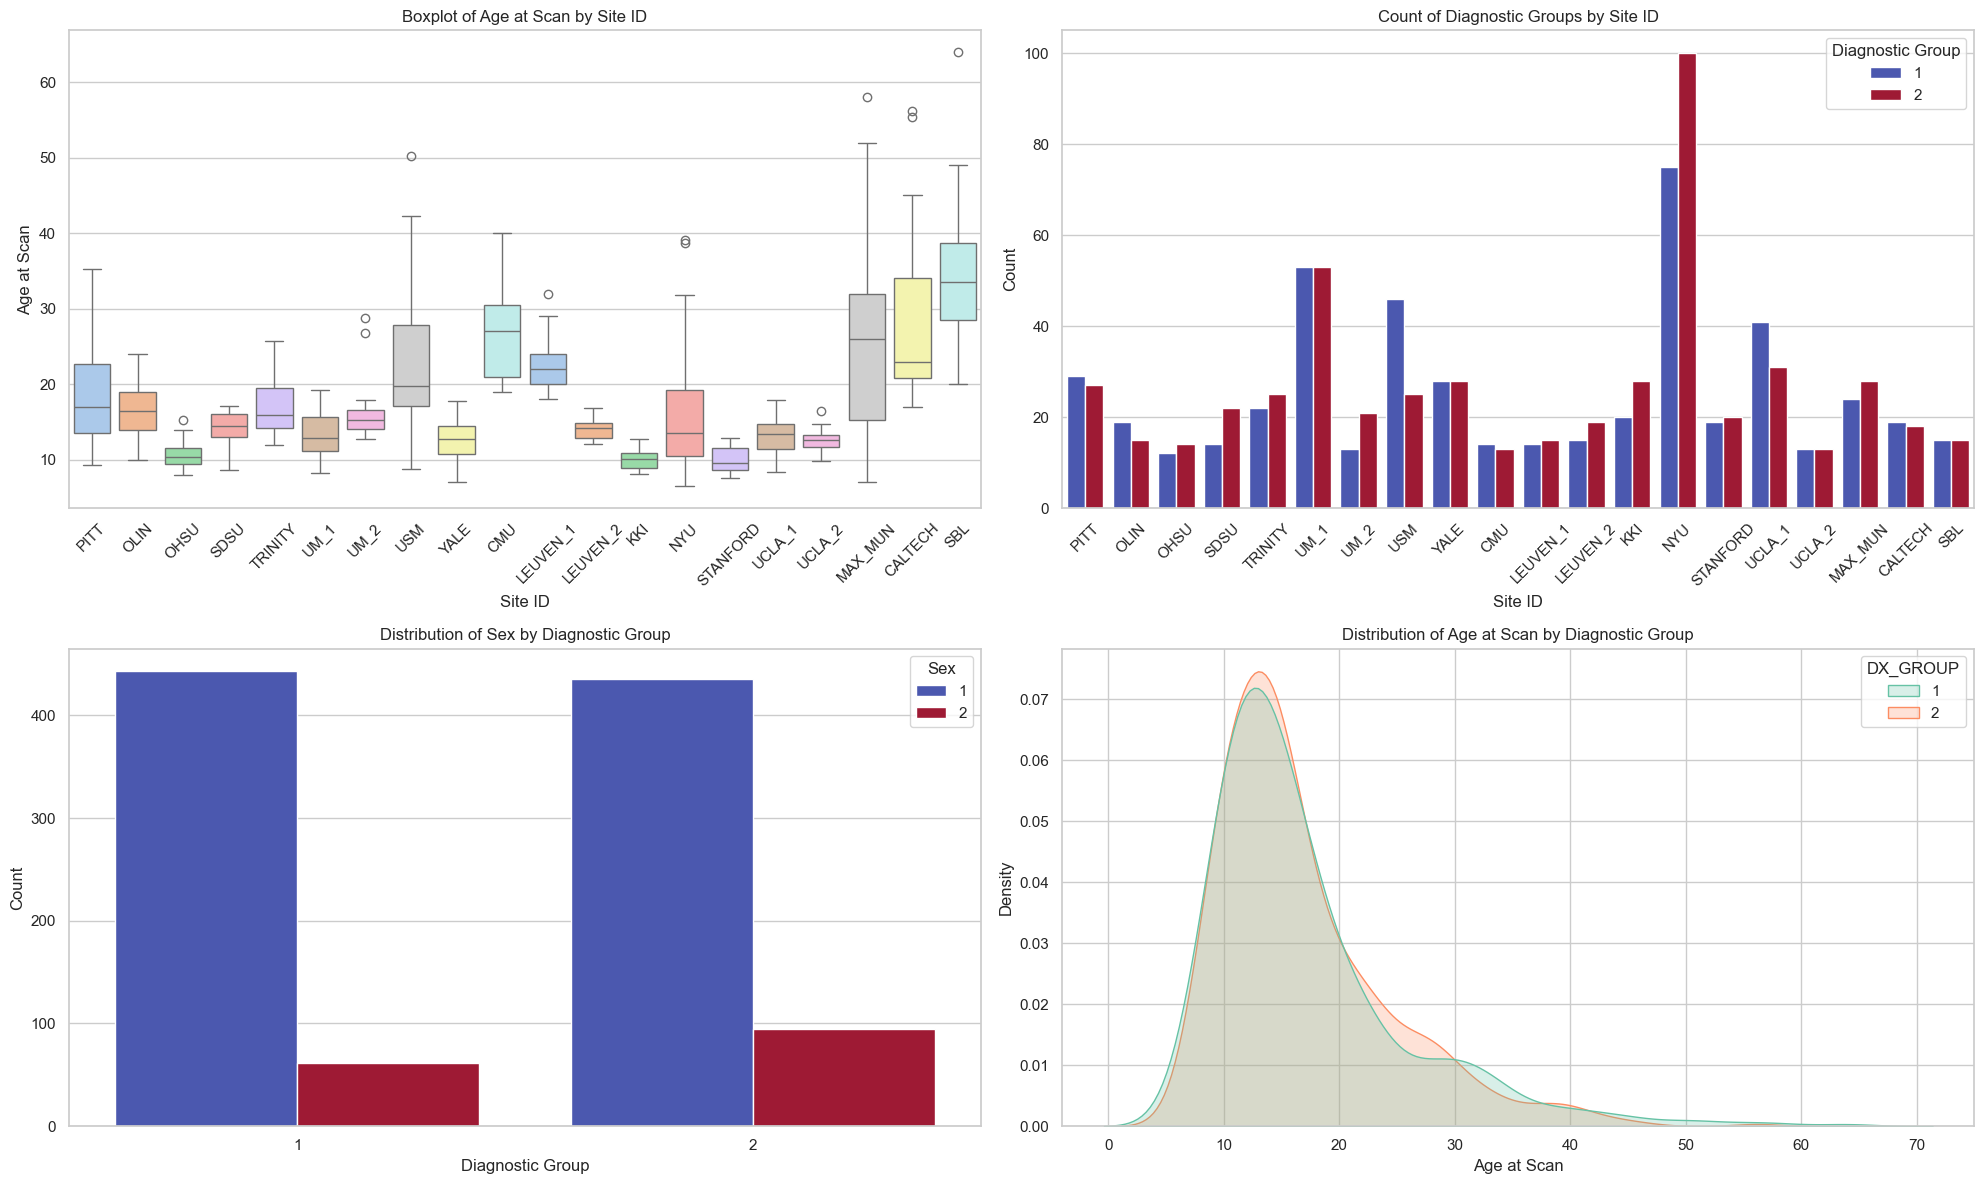

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.boxplot(x='SITE_ID', y='AGE_AT_SCAN', data=data, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Age at Scan by Site ID')
axes[0, 0].set_xlabel('Site ID')
axes[0, 0].set_ylabel('Age at Scan')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='SITE_ID', hue='DX_GROUP', data=data, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Count of Diagnostic Groups by Site ID')
axes[0, 1].set_xlabel('Site ID')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Diagnostic Group')


sns.countplot(x='DX_GROUP', hue='SEX', data=data, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex by Diagnostic Group')
axes[1, 0].set_xlabel('Diagnostic Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Sex')

sns.kdeplot(data=data, x='AGE_AT_SCAN', hue='DX_GROUP', fill=True, common_norm=False, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age at Scan by Diagnostic Group')
axes[1, 1].set_xlabel('Age at Scan')
axes[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [20]:
def getsparsity(data):
    missing_values = data.isnull().sum()
    total_missing = missing_values.sum()
    total_cells = num_rows * num_cols
    sparsity = (total_missing / total_cells) * 100
    return sparsity

print(f"Sparsity of the dataset (% of NaN values) {getsparsity(data):.2f} %")

Sparsity of the dataset (% of NaN values) 49.49 %


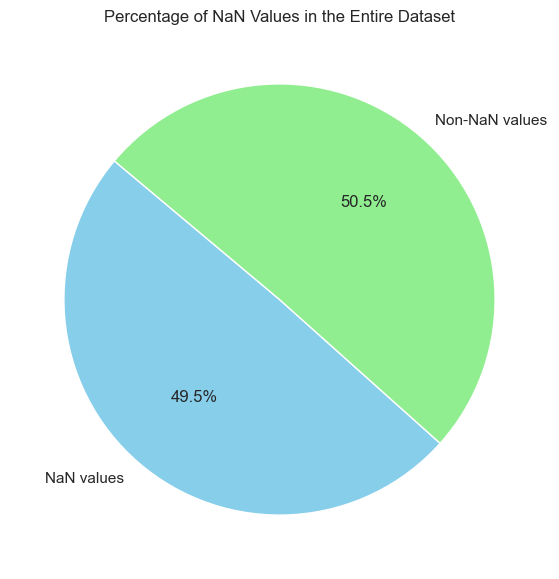

In [21]:
def nanpie(data, x='the Entire Dataset'):
    nan_percentage = getsparsity(data)
    non_nan_percentage = 100 - nan_percentage
    labels = ['NaN values', 'Non-NaN values']
    percentages = [nan_percentage, non_nan_percentage]

    plt.figure(figsize=(10, 7))
    plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
    plt.title(f'Percentage of NaN Values in {x}')
    plt.show()

nanpie(data)

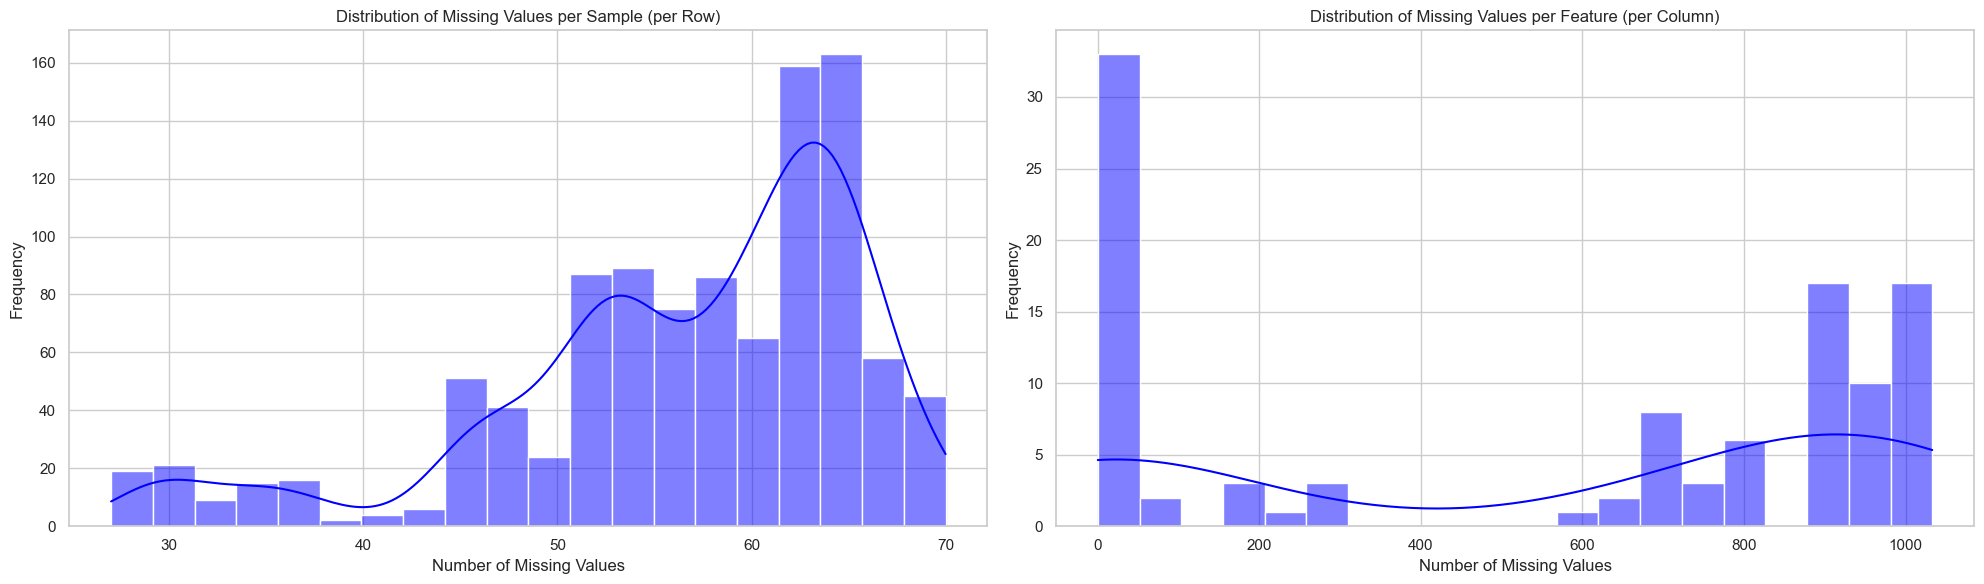

Average missing values
	per Sample: 56.36231884057971 or 53.17199890620727 % 
	per Feature 550.3301886792453 or 49.490124881227096 %


In [22]:
missing_matrix = data.isnull().astype(int)
missing_per_sample = missing_matrix.sum(axis=1)
missing_per_feature = missing_matrix.sum(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(missing_per_sample, bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Missing Values per Sample (per Row)')
axes[0].set_xlabel('Number of Missing Values')
axes[0].set_ylabel('Frequency')

sns.histplot(missing_per_feature, bins=20, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Missing Values per Feature (per Column)')
axes[1].set_xlabel('Number of Missing Values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print('Average missing values\n\tper Sample:',missing_per_sample.mean(),'or', missing_per_sample.mean()/num_cols*100,'%','\n\tper Feature',missing_per_feature.mean(), 'or', missing_per_feature.mean()/num_rows*100, '%')

In [23]:
desc_stats = data.describe()
desc_stats

Unnamed: 0.1   Unnamed: 0        SUB_ID            X       subject  \
count   1035.000000  1035.000000   1035.000000  1035.000000   1035.000000   
mean     555.828019   556.828019  50754.406763   556.828019  50754.406763   
std      323.761565   323.761565    451.418932   323.761565    451.418932   
min        1.000000     2.000000  50003.000000     2.000000  50003.000000   
25%      268.500000   269.500000  50345.500000   269.500000  50345.500000   
50%      559.000000   560.000000  50728.000000   560.000000  50728.000000   
75%      834.500000   835.500000  51154.500000   835.500000  51154.500000   
max     1111.000000  1112.000000  51607.000000  1112.000000  51607.000000   

          DX_GROUP   DSM_IV_TR  AGE_AT_SCAN          SEX  HANDEDNESS_SCORES  \
count  1035.000000  966.000000  1035.000000  1035.000000         318.000000   
mean      1.512077    0.648033    16.953804     1.151691          59.926792   
std       0.500096    0.837175     8.001663     0.358894          46.142411   
min       1.000000    0.000000     6.470000     1.000000        -100.000000   
25%       1.000000    0.000000    11.580000     1.000000          48.000000   
50%       2.000000    0.000000    14.530000     1.000000          74.165000   
75%       2.000000    1.000000    20.000000     1.000000          91.000000   
max       2.000000    4.000000    64.000000     2.000000         100.000000   

       ...    func_fber    func_fwhm   func_dvars  func_outlier  func_quality  \
count  ...  1034.000000  1034.000000  1034.000000   1034.000000   1034.000000   
mean   ...   100.975729     2.123650     1.105324      0.005560      0.012559   
std    ...    43.379897     0.345228     0.118955      0.006428      0.010975   
min    ...    33.836513     1.581108     0.709671      0.000182      0.001693   
25%    ...    69.221654     1.870867     1.026797      0.001156      0.006199   
50%    ...    88.998005     2.013723     1.083526      0.003607      0.009899   
75%    ...   126.883146     2.335508     1.177703      0.007081      0.014955   
max    ...   326.544102     3.753481     1.571101      0.080158      0.098614   

       func_mean_fd  func_num_fd  func_perc_fd     func_gsr   SUB_IN_SMP  
count   1034.000000  1034.000000   1034.000000  1034.000000  1035.000000  
mean       0.129345    27.001934     12.889570     0.028328     0.685024  
std        0.151617    42.404702     18.142959     0.021167     0.464731  
min        0.016117     0.000000      0.000000    -0.015812     0.000000  
25%        0.051222     2.000000      0.995025     0.013071     0.000000  
50%        0.083377     9.500000      4.973750     0.030633     1.000000  
75%        0.141884    33.000000     16.595052     0.042811     1.000000  
max        1.434912   288.000000     91.735537     0.104225     1.000000  

[8 rows x 87 columns]

In [24]:
variance = data.var(numeric_only=True)
std_dev = data.std(numeric_only=True)

print("Variance:\n", variance)
print("\nStandard Deviation:\n", std_dev)


Variance:
 Unnamed: 0.1    104821.550665
Unnamed: 0      104821.550665
SUB_ID          203779.051985
X               104821.550665
subject         203779.051985
                    ...      
func_mean_fd         0.022988
func_num_fd       1798.158757
func_perc_fd       329.166963
func_gsr             0.000448
SUB_IN_SMP           0.215975
Length: 87, dtype: float64

Standard Deviation:
 Unnamed: 0.1    323.761565
Unnamed: 0      323.761565
SUB_ID          451.418932
X               323.761565
subject         451.418932
                   ...    
func_mean_fd      0.151617
func_num_fd      42.404702
func_perc_fd     18.142959
func_gsr          0.021167
SUB_IN_SMP        0.464731
Length: 87, dtype: float64


C:\Users\merye\AppData\Local\Temp\ipykernel_21456\1130497842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  variance_plot = sns.barplot(x=variance.index, y=variance.values, ax=axes[0], palette='viridis')
C:\Users\merye\AppData\Local\Temp\ipykernel_21456\1130497842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  std_dev_plot = sns.barplot(x=std_dev.index, y=std_dev.values, ax=axes[1], palette='coolwarm')


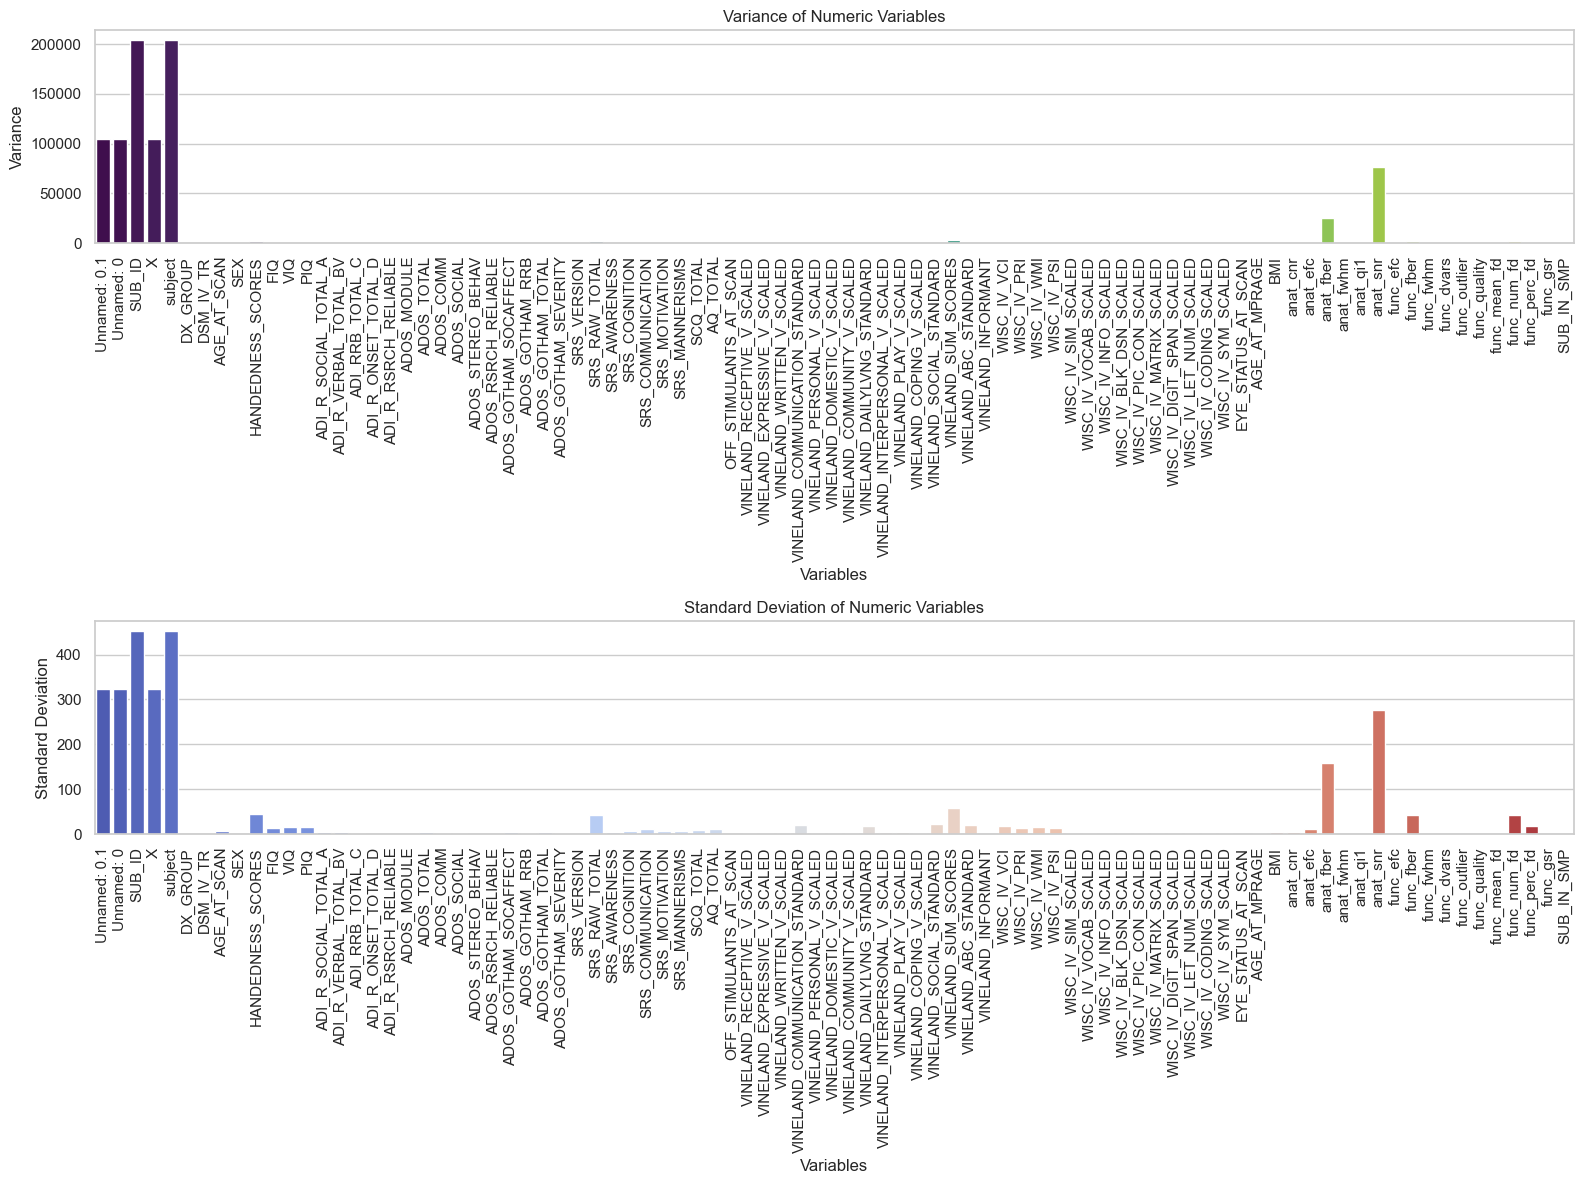

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

variance_plot = sns.barplot(x=variance.index, y=variance.values, ax=axes[0], palette='viridis')
axes[0].set_title('Variance of Numeric Variables')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Variance')
axes[0].tick_params(axis='x', rotation=90)

std_dev_plot = sns.barplot(x=std_dev.index, y=std_dev.values, ax=axes[1], palette='coolwarm')
axes[1].set_title('Standard Deviation of Numeric Variables')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Standard Deviation')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Data Quality

#### Checking for duplicates values

In [26]:
duplicate_rows = data.duplicated()

duplicate_row_count = duplicate_rows.sum()
duplicate_row_count

0

In [27]:
def find_duplicate_columns(df):
    duplicate_columns = {}
    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                if columns[i] in duplicate_columns:
                    duplicate_columns[columns[i]].append(columns[j])
                else:
                    duplicate_columns[columns[i]] = columns[j]
    return duplicate_columns


duplicate_columns = find_duplicate_columns(data)
duplicate_columns

{'Unnamed: 0': 'X', 'SUB_ID': 'subject'}

In [28]:
drop_columns = list(duplicate_columns.values())
drop_columns

['X', 'subject']

In [29]:
data.drop(columns=list(duplicate_columns.values()), inplace=True)

In [30]:
data

Unnamed: 0.1  Unnamed: 0  SUB_ID  SITE_ID           FILE_ID  DX_GROUP  \
1                1           2   50003     PITT      Pitt_0050003         1   
2                2           3   50004     PITT      Pitt_0050004         1   
3                3           4   50005     PITT      Pitt_0050005         1   
4                4           5   50006     PITT      Pitt_0050006         1   
5                5           6   50007     PITT      Pitt_0050007         1   
...            ...         ...     ...      ...               ...       ...   
1107          1107        1108   51583      SBL       SBL_0051583         1   
1108          1108        1109   51584      SBL       SBL_0051584         1   
1109          1109        1110   51585      SBL       SBL_0051585         1   
1110          1110        1111   51606  MAX_MUN  MaxMun_a_0051606         1   
1111          1111        1112   51607  MAX_MUN  MaxMun_a_0051607         1   

      DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  ...  qc_notes_rater_1  \
1           1.0        24.45    1                   R  ...               NaN   
2           1.0        19.09    1                   R  ...               NaN   
3           1.0        13.73    2                   R  ...               NaN   
4           1.0        13.37    1                   L  ...               NaN   
5           1.0        17.78    1                   R  ...               NaN   
...         ...          ...  ...                 ...  ...               ...   
1107        2.0        35.00    1                 NaN  ...               NaN   
1108        2.0        49.00    1                 NaN  ...               NaN   
1109        1.0        27.00    1                 NaN  ...               NaN   
1110        2.0        29.00    2                   R  ...               NaN   
1111        2.0        26.00    1                   R  ...               NaN   

      qc_anat_rater_2  qc_anat_notes_rater_2  qc_func_rater_2  \
1                  OK                    NaN               OK   
2                  OK                    NaN               OK   
3                  OK                    NaN            maybe   
4                  OK                    NaN            maybe   
5                  OK                    NaN            maybe   
...               ...                    ...              ...   
1107               OK                    NaN               OK   
1108               OK                    NaN            maybe   
1109               OK                    NaN            maybe   
1110               OK                    NaN            maybe   
1111               OK                    NaN            maybe   

            qc_func_notes_rater_2 qc_anat_rater_3 qc_anat_notes_rater_3  \
1                             NaN              OK                   NaN   
2                             NaN              OK                   NaN   
3          ic-parietal-cerebellum              OK                   NaN   
4              ic-parietal slight              OK                   NaN   
5      ic-cerebellum_temporal_lob              OK                   NaN   
...                           ...             ...                   ...   
1107  ic-cerebellum-temporal_lobe              OK                   NaN   
1108                vmpfc dropout              OK                   NaN   
1109  ic-cerebellum-temporal_lobe              OK                   NaN   
1110                ic-cerebellum              OK                   NaN   
1111                ic-cerebellum              OK                   NaN   

      qc_func_rater_3  qc_func_notes_rater_3  SUB_IN_SMP  
1                  OK                    NaN           1  
2                  OK                    NaN           1  
3                  OK                    NaN           0  
4                  OK                    NaN           1  
5                  OK                    NaN           1  
...               ...                    ...         ...  
1

#### Dropping extra identifier columns

In [31]:
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'SITE_ID', 'FILE_ID'], inplace=True)

In [32]:
data

SUB_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  \
1      50003         1        1.0        24.45    1                   R   
2      50004         1        1.0        19.09    1                   R   
3      50005         1        1.0        13.73    2                   R   
4      50006         1        1.0        13.37    1                   L   
5      50007         1        1.0        17.78    1                   R   
...      ...       ...        ...          ...  ...                 ...   
1107   51583         1        2.0        35.00    1                 NaN   
1108   51584         1        2.0        49.00    1                 NaN   
1109   51585         1        1.0        27.00    1                 NaN   
1110   51606         1        2.0        29.00    2                   R   
1111   51607         1        2.0        26.00    1                   R   

      HANDEDNESS_SCORES    FIQ    VIQ    PIQ  ... qc_notes_rater_1  \
1                   NaN  124.0  128.0  115.0  ...              NaN   
2                   NaN  113.0  108.0  117.0  ...              NaN   
3                   NaN  119.0  117.0  118.0  ...              NaN   
4                   NaN  109.0   99.0  119.0  ...              NaN   
5                   NaN  110.0  106.0  112.0  ...              NaN   
...                 ...    ...    ...    ...  ...              ...   
1107              100.0   95.0  105.0   84.0  ...              NaN   
1108              100.0    NaN  133.0  135.0  ...              NaN   
1109               90.0   96.0   99.0  106.0  ...              NaN   
1110                NaN  118.0    NaN    NaN  ...              NaN   
1111                NaN  110.0    NaN    NaN  ...              NaN   

     qc_anat_rater_2 qc_anat_notes_rater_2  qc_func_rater_2  \
1                 OK                   NaN               OK   
2                 OK                   NaN               OK   
3                 OK                   NaN            maybe   
4                 OK                   NaN            maybe   
5                 OK                   NaN            maybe   
...              ...                   ...              ...   
1107              OK                   NaN               OK   
1108              OK                   NaN            maybe   
1109              OK                   NaN            maybe   
1110              OK                   NaN            maybe   
1111              OK                   NaN            maybe   

            qc_func_notes_rater_2  qc_anat_rater_3  qc_anat_notes_rater_3  \
1                             NaN               OK                    NaN   
2                             NaN               OK                    NaN   
3          ic-parietal-cerebellum               OK                    NaN   
4              ic-parietal slight               OK                    NaN   
5      ic-cerebellum_temporal_lob               OK                    NaN   
...                           ...              ...                    ...   
1107  ic-cerebellum-temporal_lobe               OK                    NaN   
1108                vmpfc dropout               OK                    NaN   
1109  ic-cerebellum-temporal_lobe               OK                    NaN   
1110                ic-cerebellum               OK                    NaN   
1111                ic-cerebellum               OK                    NaN   

      qc_func_rater_3  qc_func_notes_rater_3  SUB_IN_SMP  
1                  OK                    NaN           1  
2                  OK                    NaN           1  
3                  OK                    NaN           0  
4                  OK                    NaN           1  
5                  OK                    NaN           1  
...               ...                    ...         ...  
1107               OK                    NaN           0  
1108               OK                    NaN           0  
1109               OK                    NaN       

#### Setting SUB_ID as the Index

In [33]:
data = data.set_index('SUB_ID')

In [34]:
data

DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  \
SUB_ID                                                              
50003          1        1.0        24.45    1                   R   
50004          1        1.0        19.09    1                   R   
50005          1        1.0        13.73    2                   R   
50006          1        1.0        13.37    1                   L   
50007          1        1.0        17.78    1                   R   
...          ...        ...          ...  ...                 ...   
51583          1        2.0        35.00    1                 NaN   
51584          1        2.0        49.00    1                 NaN   
51585          1        1.0        27.00    1                 NaN   
51606          1        2.0        29.00    2                   R   
51607          1        2.0        26.00    1                   R   

        HANDEDNESS_SCORES    FIQ    VIQ    PIQ FIQ_TEST_TYPE  ...  \
SUB_ID                                                        ...   
50003                 NaN  124.0  128.0  115.0          WASI  ...   
50004                 NaN  113.0  108.0  117.0          WASI  ...   
50005                 NaN  119.0  117.0  118.0          WASI  ...   
50006                 NaN  109.0   99.0  119.0          WASI  ...   
50007                 NaN  110.0  106.0  112.0          WASI  ...   
...                   ...    ...    ...    ...           ...  ...   
51583               100.0   95.0  105.0   84.0      WAIS_III  ...   
51584               100.0    NaN  133.0  135.0           NaN  ...   
51585                90.0   96.0   99.0  106.0      WAIS_III  ...   
51606                 NaN  118.0    NaN    NaN           WST  ...   
51607                 NaN  110.0    NaN    NaN           WST  ...   

       qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
SUB_ID                                                           
50003               NaN              OK                    NaN   
50004               NaN              OK                    NaN   
50005               NaN              OK                    NaN   
50006               NaN              OK                    NaN   
50007               NaN              OK                    NaN   
...                 ...             ...                    ...   
51583               NaN              OK                    NaN   
51584               NaN              OK                    NaN   
51585               NaN              OK                    NaN   
51606               NaN              OK                    NaN   
51607               NaN              OK                    NaN   

        qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
SUB_ID                                                                  
50003                OK                          NaN               OK   
50004                OK                          NaN               OK   
50005             maybe       ic-parietal-cerebellum               OK   
50006             maybe           ic-parietal slight               OK   
50007             maybe   ic-cerebellum_temporal_lob               OK   
...                 ...                          ...              ...   
51583                OK  ic-cerebellum-temporal_lobe               OK   
51584             maybe                vmpfc dropout               OK   
51585             maybe  ic-cerebellum-temporal_lobe               OK   
51606             maybe                ic-cerebellum               OK   
51607             maybe                ic-cerebellum               OK   

        qc_anat_notes_rater_3  qc_func_rater_3  qc_func_notes_rater_3  \
SUB_ID                                                                  
50003                     NaN               OK                    NaN   
50004                     NaN               OK                    NaN   
50005                     NaN               OK                    NaN   
50006                     NaN         

#### Checking for errors and values

In [35]:
unique_values = {column: data[column].unique() for column in data.columns}
unique_values

{'DX_GROUP': array([1, 2], dtype=int64),
 'DSM_IV_TR': array([ 1.,  0., nan,  2.,  3.,  4.]),
 'AGE_AT_SCAN': array([24.45  , 19.09  , 13.73  , 13.37  , 17.78  , 32.45  , 33.86  ,
        35.2   , 16.93  , 21.48  ,  9.33  , 14.2   , 21.82  , 22.7   ,
        27.81  , 20.83  , 16.99  , 12.64  , 22.64  , 31.72  , 16.28  ,
        12.24  , 12.74  , 11.4   , 25.12  , 12.92  , 19.8   , 12.15  ,
        14.77  , 17.36  , 13.28  , 19.16  , 13.95  , 30.66  , 24.6   ,
        27.92  , 33.17  , 13.78  , 17.13  , 15.7   , 20.65  , 15.35  ,
        11.81  , 15.82  , 14.37  , 12.83  , 33.24  , 12.03  ,  9.44  ,
        13.59  , 12.62  , 23.1   , 21.22  , 20.34  , 14.    , 16.    ,
        17.    , 10.    , 21.    , 20.    , 13.    , 15.    , 23.    ,
        19.    , 12.    , 18.    , 24.    , 11.    , 13.99  , 13.79  ,
        10.22  , 10.75  ,  8.    , 11.35  , 12.65  , 12.32  ,  9.42  ,
         9.73  ,  9.72  , 15.23  , 10.5   , 11.55  , 10.29  , 11.45  ,
         9.15  ,  8.94  ,  9.4   ,  8.8

In [36]:
unique_value_counts = lambda D, f=False: {column: D[column].value_counts(dropna=f) for column in D.columns}
unique_value_counts(data)

{'DX_GROUP': DX_GROUP
 2    530
 1    505
 Name: count, dtype: int64,
 'DSM_IV_TR': DSM_IV_TR
 0.0    515
 1.0    323
 2.0     87
 NaN     69
 3.0     35
 4.0      6
 Name: count, dtype: int64,
 'AGE_AT_SCAN': AGE_AT_SCAN
 22.0000    12
 11.0000    11
 21.0000    11
 27.0000    10
 14.2000    10
            ..
 21.4018     1
 16.3833     1
 14.1437     1
 16.7337     1
 49.0000     1
 Name: count, Length: 657, dtype: int64,
 'SEX': SEX
 1    878
 2    157
 Name: count, dtype: int64,
 'HANDEDNESS_CATEGORY': HANDEDNESS_CATEGORY
 R        660
 NaN      286
 L         68
 Ambi      14
 Mixed      6
 L->R       1
 Name: count, dtype: int64,
 'HANDEDNESS_SCORES': HANDEDNESS_SCORES
  NaN      717
  100.0     61
  80.0      13
  90.0      12
  91.0      12
          ... 
 -24.0       1
  56.0       1
 -33.0       1
  3.0        1
 -40.0       1
 Name: count, Length: 101, dtype: int64,
 'FIQ': FIQ
 NaN      69
 100.0    37
 113.0    29
 109.0    28
 108.0    25
          ..
 115.5     1
 81.5  

In [37]:
def createwordcloud(data, f=False):
    text = ''
    for column, value_counts in unique_value_counts(data, f).items():
        text += f'{column} '
        text += ' '.join([str(value) for value in value_counts.index])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Unique Values in Each Column')
    plt.show()

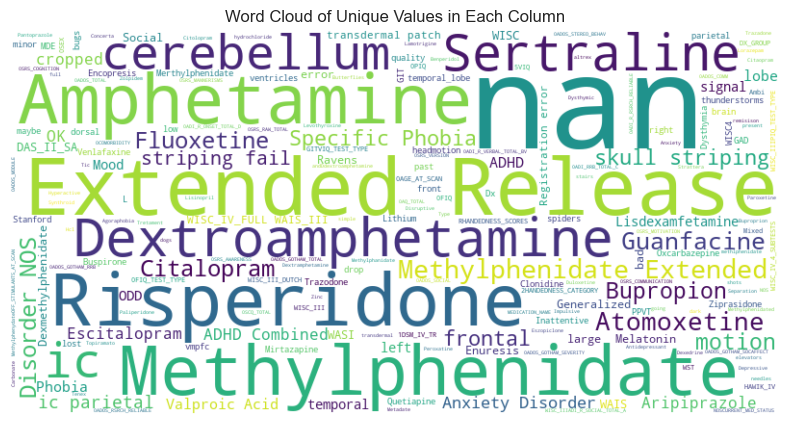

In [38]:
createwordcloud(data)

To remove the errors and fails, we will be specifically looking at the QC rating columns. For correct performance, we do not want scans with blurryness or with a bad quality.

In [39]:
data[['qc_rater_1', 'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3']]

qc_rater_1 qc_notes_rater_1 qc_anat_rater_2 qc_anat_notes_rater_2  \
SUB_ID                                                                     
50003          OK              NaN              OK                   NaN   
50004          OK              NaN              OK                   NaN   
50005          OK              NaN              OK                   NaN   
50006          OK              NaN              OK                   NaN   
50007          OK              NaN              OK                   NaN   
...           ...              ...             ...                   ...   
51583          OK              NaN              OK                   NaN   
51584          OK              NaN              OK                   NaN   
51585          OK              NaN              OK                   NaN   
51606          OK              NaN              OK                   NaN   
51607          OK              NaN              OK                   NaN   

       qc_func_rater_2        qc_func_notes_rater_2 qc_anat_rater_3  \
SUB_ID                                                                
50003               OK                          NaN              OK   
50004               OK                          NaN              OK   
50005            maybe       ic-parietal-cerebellum              OK   
50006            maybe           ic-parietal slight              OK   
50007            maybe   ic-cerebellum_temporal_lob              OK   
...                ...                          ...             ...   
51583               OK  ic-cerebellum-temporal_lobe              OK   
51584            maybe                vmpfc dropout              OK   
51585            maybe  ic-cerebellum-temporal_lobe              OK   
51606            maybe                ic-cerebellum              OK   
51607            maybe                ic-cerebellum              OK   

       qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  
SUB_ID                                                              
50003                    NaN              OK                   NaN  
50004                    NaN              OK                   NaN  
50005                    NaN              OK                   NaN  
50006                    NaN              OK                   NaN  
50007                    NaN              OK                   NaN  
...                      ...             ...                   ...  
51583                    NaN              OK                   NaN  
51584                    NaN              OK                   NaN  
51585                    NaN              OK                   NaN  
51606                    NaN              OK                   NaN  
51607                    NaN              OK                   NaN  

[1035 rows x 10 columns]

In [40]:
qc_to_inspect = ['qc_rater_1', 'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3']

In [41]:
def find_missing_value_indicators(df):
    indicators = {}
    flags = ['error', 'fail', '?']
    for column in df.columns:
        unique_values = df[column].unique()
        potential_indicators = []
        for value in unique_values:
            if (isinstance(value, str) and any(keyword in value.lower() for keyword in flags)):
                potential_indicators.append(value) 
        if potential_indicators:
            indicators[column] = potential_indicators
    return indicators

potential_missing_value_indicators = find_missing_value_indicators(data[qc_to_inspect])
len(potential_missing_value_indicators), potential_missing_value_indicators

(8,
 {'qc_rater_1': ['fail'],
  'qc_notes_rater_1': ['frontal lobe hole. Sinus?',
   'skullstrip error?',
   'registration error (dparsf)',
   'front left cropped. Registration error',
   'dorsal cropped. Registration error'],
  'qc_anat_rater_2': ['fail'],
  'qc_anat_notes_rater_2': ['skull-striping fail',
   'skull-striping fail; Motion',
   'skull-striping fail;',
   'skull-striping fail; large ventricles',
   'skull-striping fail; motion',
   'skull-striping fail; motion artefacts',
   'skull-striping fail; Motion bad',
   'skull-striping fail; ic-cerebellum'],
  'qc_func_rater_2': ['fail'],
  'qc_anat_rater_3': ['fail'],
  'qc_func_rater_3': ['fail'],
  'qc_func_notes_rater_3': ['ERROR #17', 'ERROR #100']})

In [42]:
flags = set(chain(*potential_missing_value_indicators.values())) 

In [43]:
len(flags), flags

(16,
 {'ERROR #100',
  'ERROR #17',
  'dorsal cropped. Registration error',
  'fail',
  'front left cropped. Registration error',
  'frontal lobe hole. Sinus?',
  'registration error (dparsf)',
  'skull-striping fail',
  'skull-striping fail;',
  'skull-striping fail; Motion',
  'skull-striping fail; Motion bad',
  'skull-striping fail; ic-cerebellum',
  'skull-striping fail; large ventricles',
  'skull-striping fail; motion',
  'skull-striping fail; motion artefacts',
  'skullstrip error?'})

In [44]:
def remove_rows_with_elements_from_set(df, elements_set):
    indices_to_remove = set()
    for index, row in df.iterrows():
        for element in row:
            if element in elements_set:
                indices_to_remove.add(index)
                break  
    return df.drop(indices_to_remove)

In [45]:
data = remove_rows_with_elements_from_set(data, flags)

In [46]:
data

DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  \
SUB_ID                                                              
50003          1        1.0        24.45    1                   R   
50004          1        1.0        19.09    1                   R   
50005          1        1.0        13.73    2                   R   
50006          1        1.0        13.37    1                   L   
50007          1        1.0        17.78    1                   R   
...          ...        ...          ...  ...                 ...   
51583          1        2.0        35.00    1                 NaN   
51584          1        2.0        49.00    1                 NaN   
51585          1        1.0        27.00    1                 NaN   
51606          1        2.0        29.00    2                   R   
51607          1        2.0        26.00    1                   R   

        HANDEDNESS_SCORES    FIQ    VIQ    PIQ FIQ_TEST_TYPE  ...  \
SUB_ID                                                        ...   
50003                 NaN  124.0  128.0  115.0          WASI  ...   
50004                 NaN  113.0  108.0  117.0          WASI  ...   
50005                 NaN  119.0  117.0  118.0          WASI  ...   
50006                 NaN  109.0   99.0  119.0          WASI  ...   
50007                 NaN  110.0  106.0  112.0          WASI  ...   
...                   ...    ...    ...    ...           ...  ...   
51583               100.0   95.0  105.0   84.0      WAIS_III  ...   
51584               100.0    NaN  133.0  135.0           NaN  ...   
51585                90.0   96.0   99.0  106.0      WAIS_III  ...   
51606                 NaN  118.0    NaN    NaN           WST  ...   
51607                 NaN  110.0    NaN    NaN           WST  ...   

       qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
SUB_ID                                                           
50003               NaN              OK                    NaN   
50004               NaN              OK                    NaN   
50005               NaN              OK                    NaN   
50006               NaN              OK                    NaN   
50007               NaN              OK                    NaN   
...                 ...             ...                    ...   
51583               NaN              OK                    NaN   
51584               NaN              OK                    NaN   
51585               NaN              OK                    NaN   
51606               NaN              OK                    NaN   
51607               NaN              OK                    NaN   

        qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
SUB_ID                                                                  
50003                OK                          NaN               OK   
50004                OK                          NaN               OK   
50005             maybe       ic-parietal-cerebellum               OK   
50006             maybe           ic-parietal slight               OK   
50007             maybe   ic-cerebellum_temporal_lob               OK   
...                 ...                          ...              ...   
51583                OK  ic-cerebellum-temporal_lobe               OK   
51584             maybe                vmpfc dropout               OK   
51585             maybe  ic-cerebellum-temporal_lobe               OK   
51606             maybe                ic-cerebellum               OK   
51607             maybe                ic-cerebellum               OK   

        qc_anat_notes_rater_3  qc_func_rater_3  qc_func_notes_rater_3  \
SUB_ID                                                                  
50003                     NaN               OK                    NaN   
50004                     NaN               OK                    NaN   
50005                     NaN               OK                    NaN   
50006                     NaN         

In [47]:
unique_value_counts(data)

{'DX_GROUP': DX_GROUP
 2    391
 1    359
 Name: count, dtype: int64,
 'DSM_IV_TR': DSM_IV_TR
 0.0    393
 1.0    233
 2.0     69
 NaN     27
 3.0     27
 4.0      1
 Name: count, dtype: int64,
 'AGE_AT_SCAN': AGE_AT_SCAN
 22.0000    9
 14.2000    9
 19.0000    8
 18.0000    8
 20.0000    6
           ..
 19.6277    1
 25.4511    1
 25.7972    1
 23.5948    1
 49.0000    1
 Name: count, Length: 499, dtype: int64,
 'SEX': SEX
 1    621
 2    129
 Name: count, dtype: int64,
 'HANDEDNESS_CATEGORY': HANDEDNESS_CATEGORY
 R        439
 NaN      254
 L         51
 Mixed      5
 Ambi       1
 Name: count, dtype: int64,
 'HANDEDNESS_SCORES': HANDEDNESS_SCORES
  NaN      475
  100.0     50
  80.0      13
  91.0      11
  90.0      11
          ... 
 -33.0       1
  0.0        1
 -68.0       1
  88.0       1
 -40.0       1
 Name: count, Length: 93, dtype: int64,
 'FIQ': FIQ
 NaN      57
 100.0    26
 112.0    21
 109.0    21
 108.0    21
          ..
 109.5     1
 127.5     1
 123.5     1
 95.5  

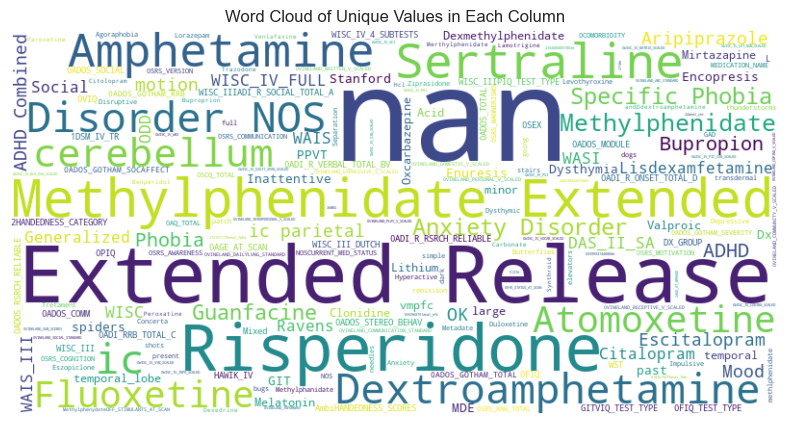

In [48]:
createwordcloud(data)

#### Dealing with Missing Values

In [51]:
def missingvalplot(data):
    nan_counts = data.isna().sum()
    nan_counts = nan_counts[nan_counts > 0]
    nan_counts_sorted = nan_counts.sort_values()


    quartiles = nan_counts_sorted.quantile([0.25, 0.5, 0.75])
    colors = []
    for count in nan_counts_sorted:
        if count <= quartiles[0.25]:
            colors.append('red')
        elif count <= quartiles[0.5]:
            colors.append('green')
        elif count <= quartiles[0.75]:
            colors.append('blue')
        else:
            colors.append('skyblue')

    plt.figure(figsize=(12, 8))
    nan_counts_sorted.plot(kind='bar', color=colors)
    plt.axhline(y=quartiles[0.25], color='r', linestyle='--', label=f'25th percentile: {quartiles[0.25]}')
    plt.axhline(y=quartiles[0.5], color='g', linestyle='--', label=f'Median: {quartiles[0.5]}')
    plt.axhline(y=quartiles[0.75], color='b', linestyle='--', label=f'75th percentile: {quartiles[0.75]}')

    plt.title('Number of NaN Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of NaN Values')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

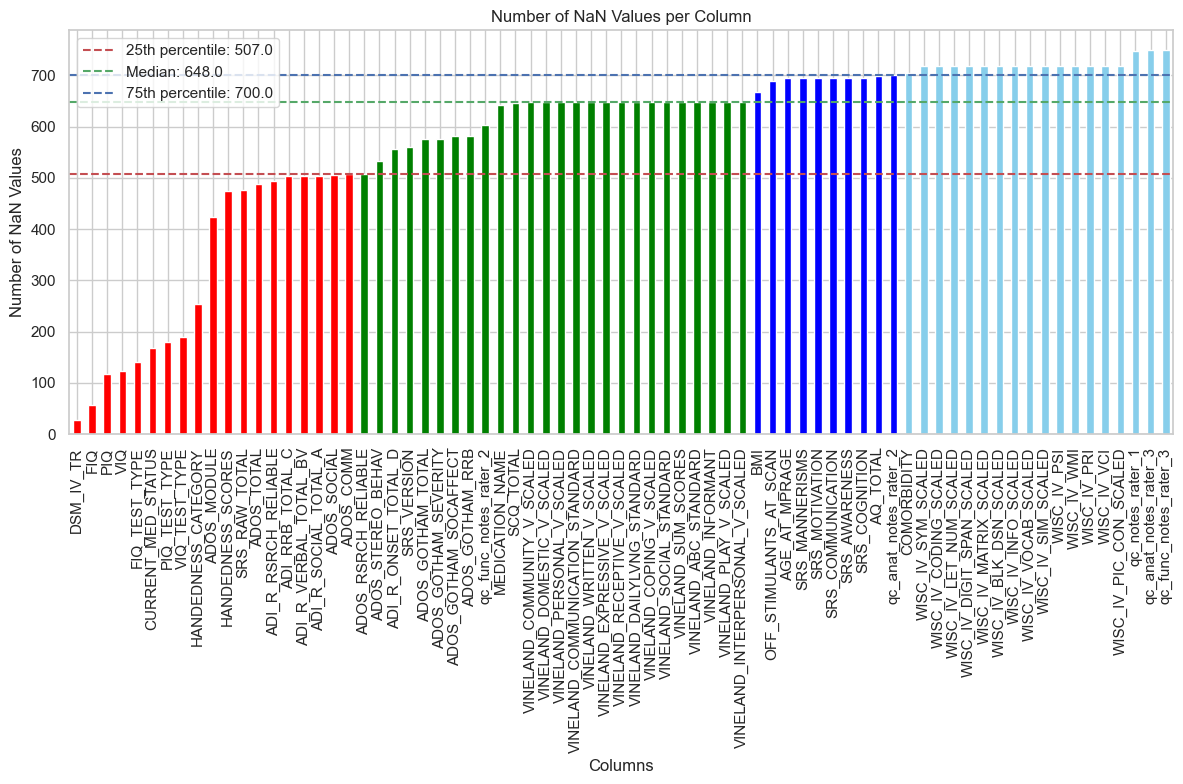

In [52]:
missingvalplot(data)

First we want to drop the columns that do not bring much information or the relevant information we want, such as the QC columns.

In [53]:
diag = ['DSM_IV_TR'] #this column gives the dx_group directly and would bias all models
anatomical_qc = ['anat_cnr', 'anat_efc','anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr']
functional_qc = ['func_efc', 'func_fber','func_fwhm', 'func_dvars', 'func_outlier', 'func_quality', 'func_mean_fd', 'func_num_fd', 'func_perc_fd', 'func_gsr']
raters_qc = ['qc_rater_1', 'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3', 'SUB_IN_SMP']

In [54]:
qc = diag + anatomical_qc + functional_qc + raters_qc

In [55]:
data = data.drop(columns=qc)

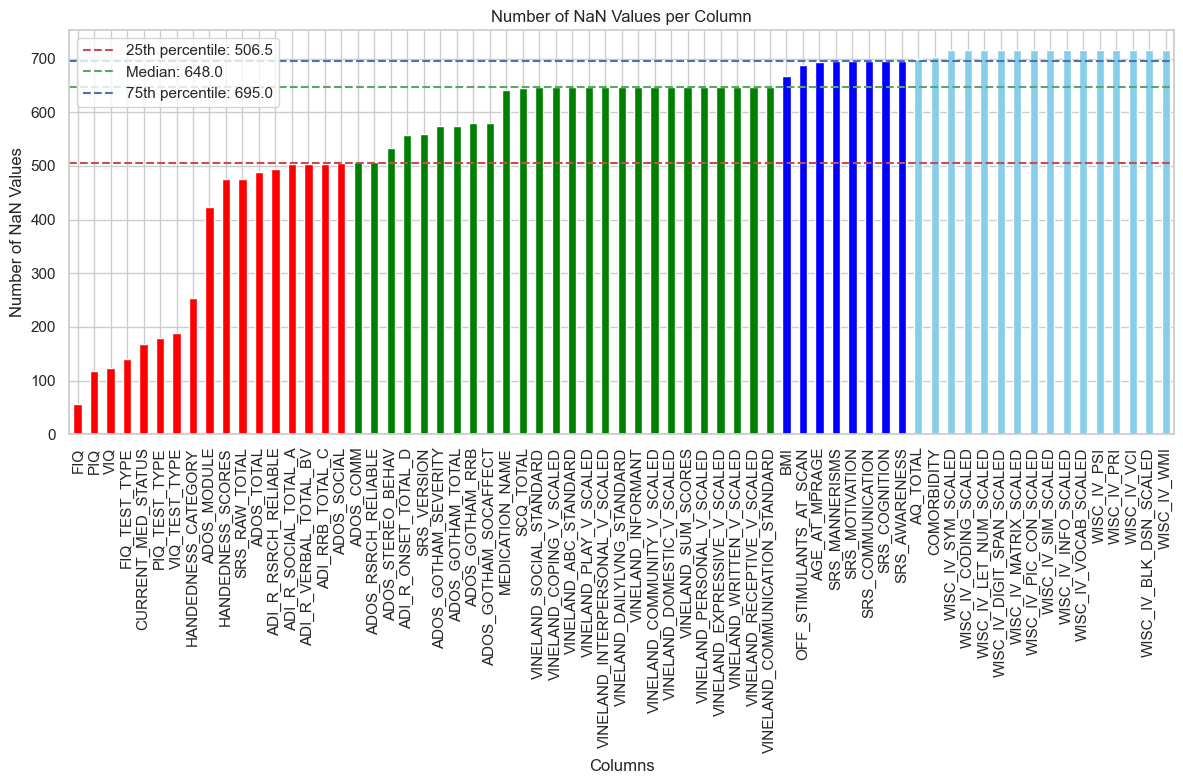

In [56]:
missingvalplot(data)

In [57]:
print(f'Sparsity of the data (%of NaN values): {getsparsity(data):.2f}%')
    

Sparsity of the data (%of NaN values): 32.71%


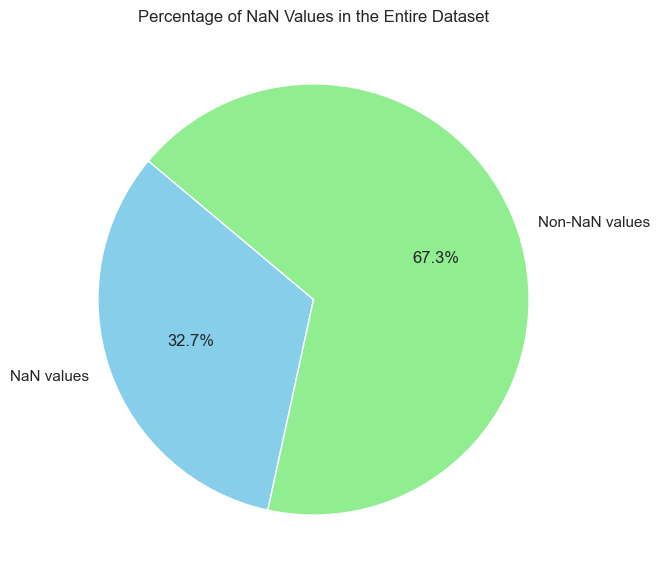

In [58]:
nanpie(data)

Let's experiment with different thresholds of missing values: 

In [59]:
threshold = lambda x : x * len(data) / 100 

thresh=N requires that a column has at least N non-NaNs to survive. We take different percentages of the length of the entire table to see which columns with at least % of threshold remain.

Threshold of non-missing values: 150.0 or 20 %
Number of features:30
Ratio of features to total examples: 4.00%
Ratio of features to non-missing examples:20.00%


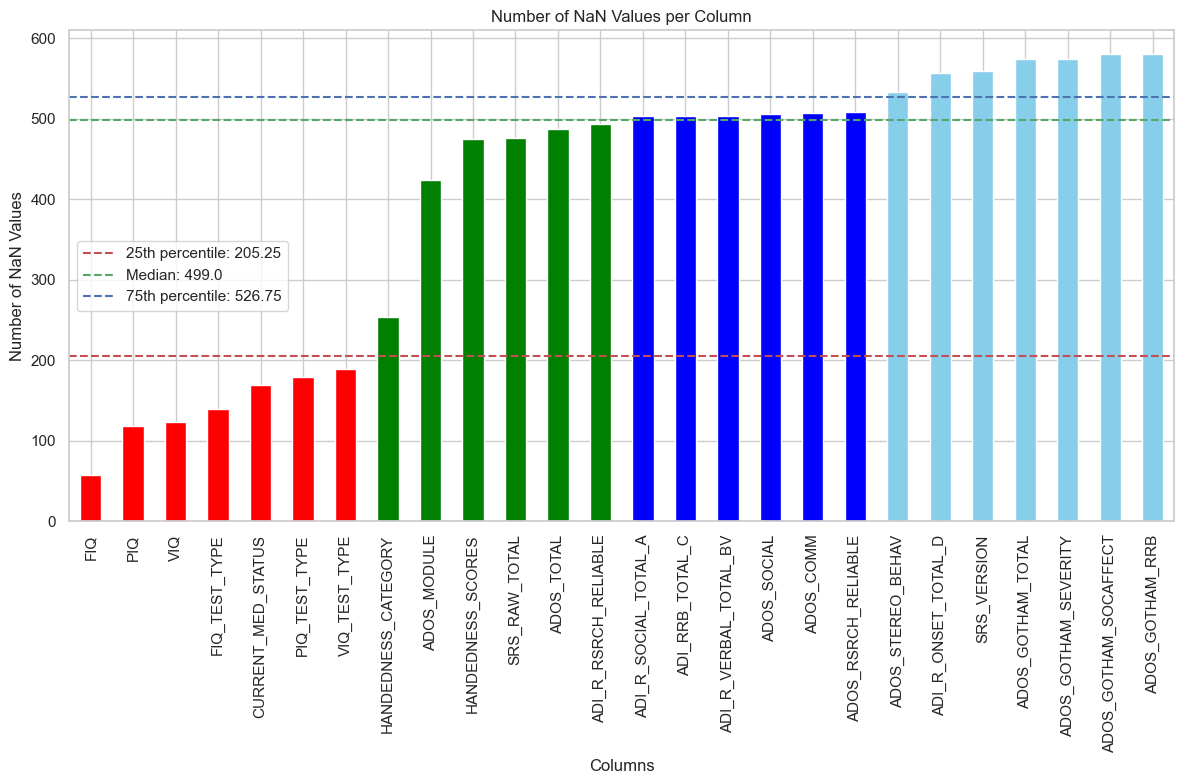

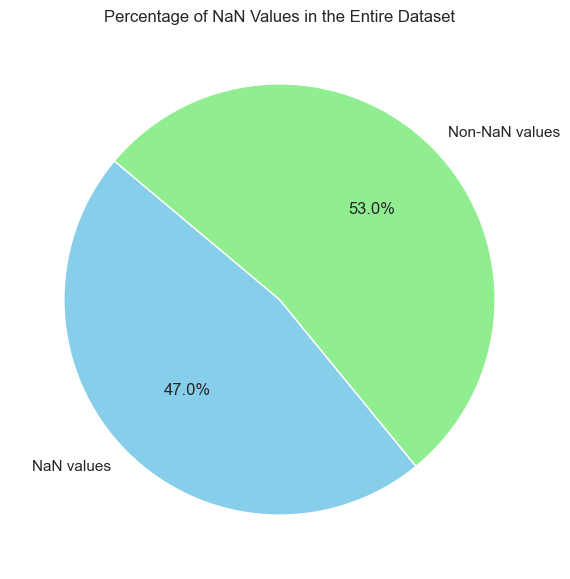

Threshold of non-missing values: 187.5 or 25 %
Number of features:26
Ratio of features to total examples: 3.47%
Ratio of features to non-missing examples:13.87%


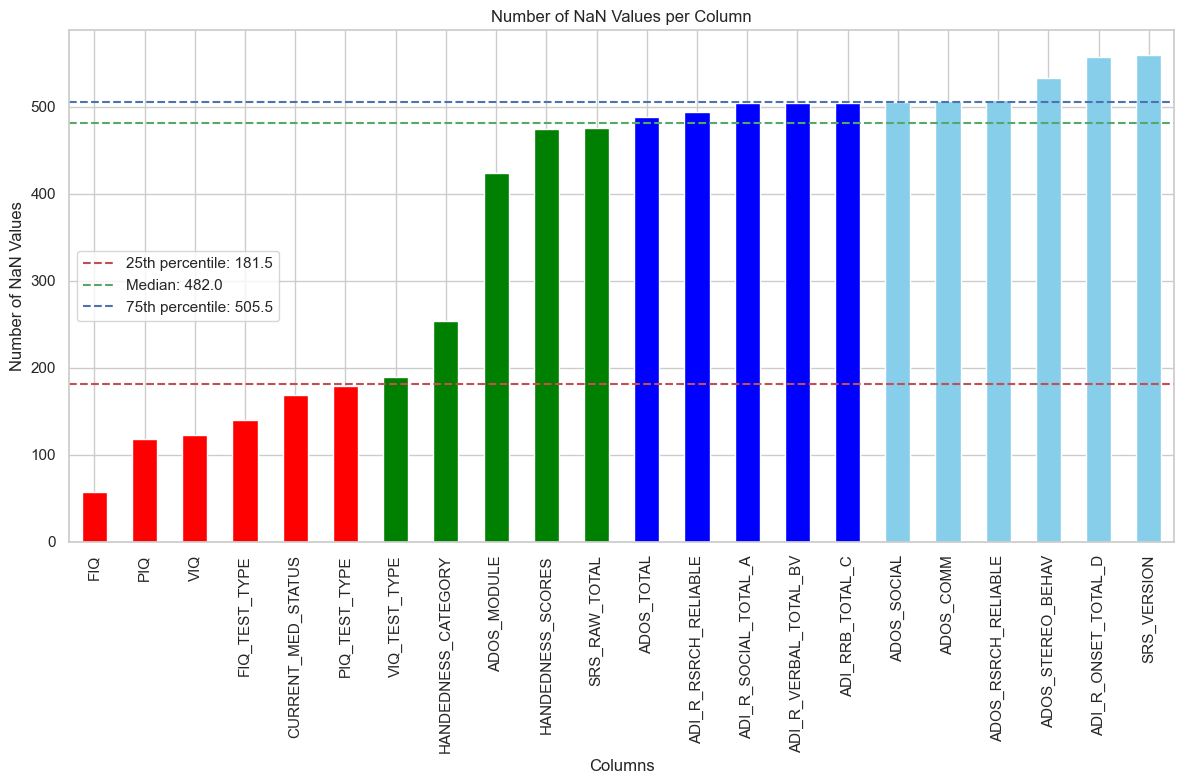

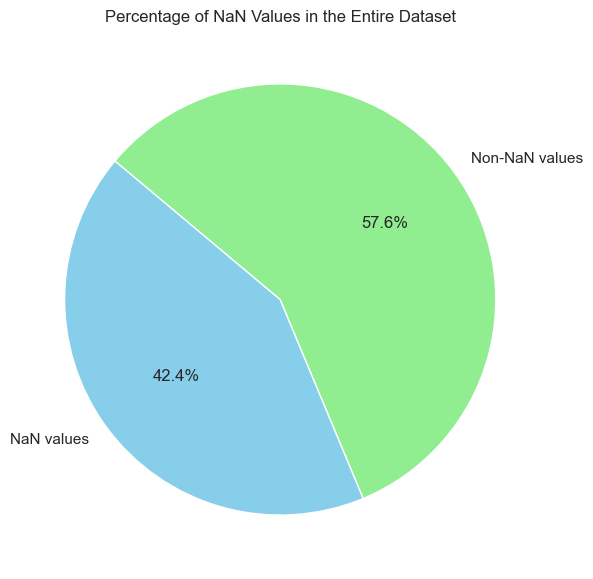

Threshold of non-missing values: 225.0 or 30 %
Number of features:23
Ratio of features to total examples: 3.07%
Ratio of features to non-missing examples:10.22%


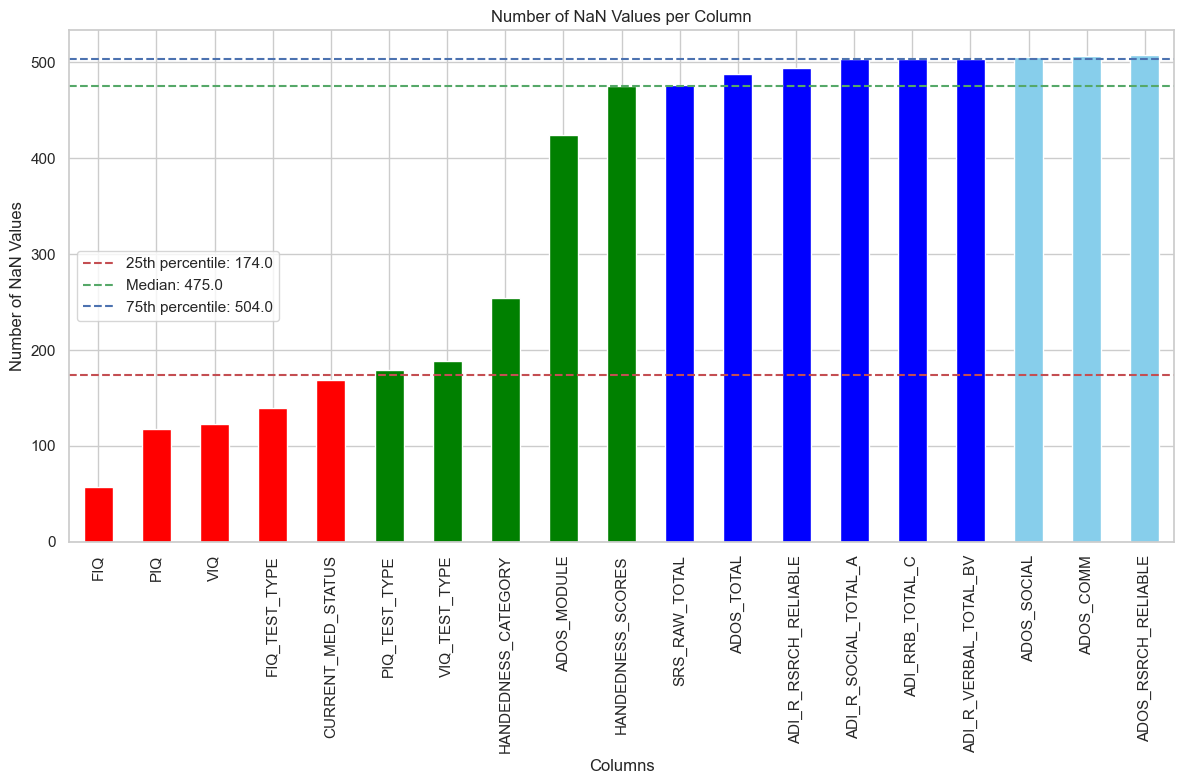

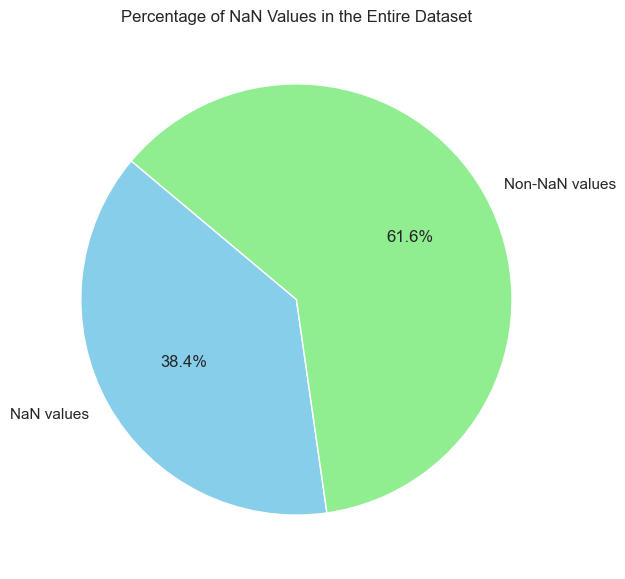

Threshold of non-missing values: 262.5 or 35 %
Number of features:15
Ratio of features to total examples: 2.00%
Ratio of features to non-missing examples:5.71%


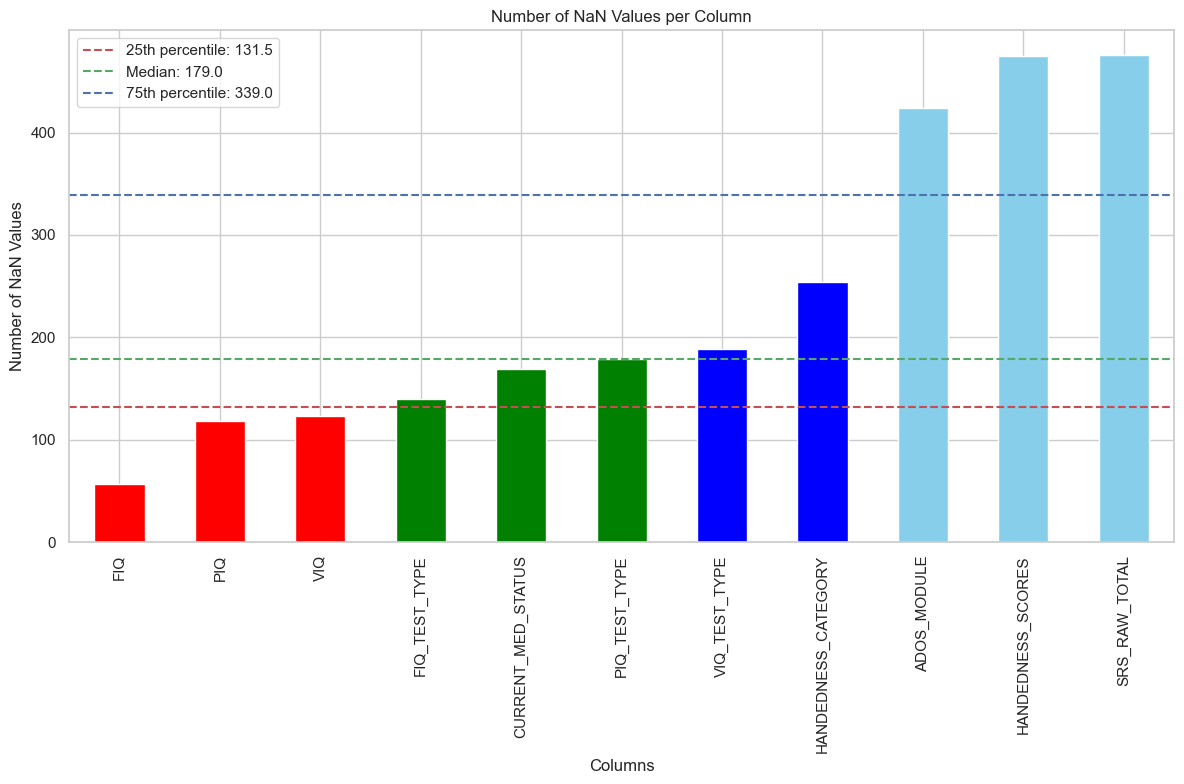

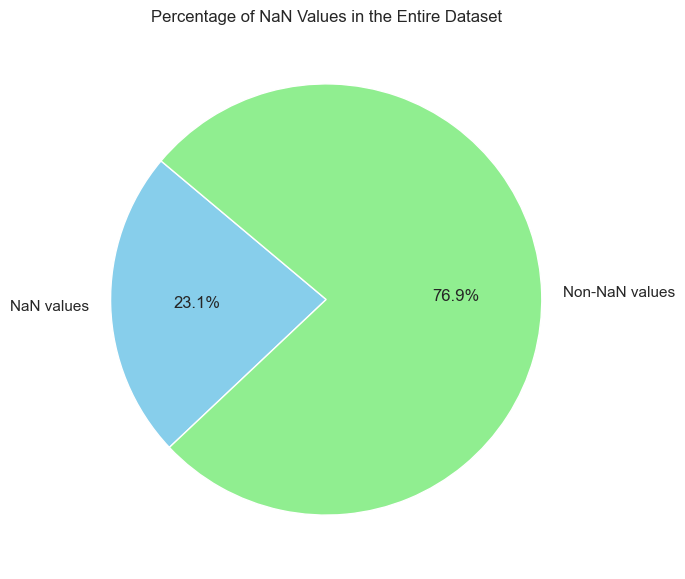

Threshold of non-missing values: 300.0 or 40 %
Number of features:13
Ratio of features to total examples: 1.73%
Ratio of features to non-missing examples:4.33%


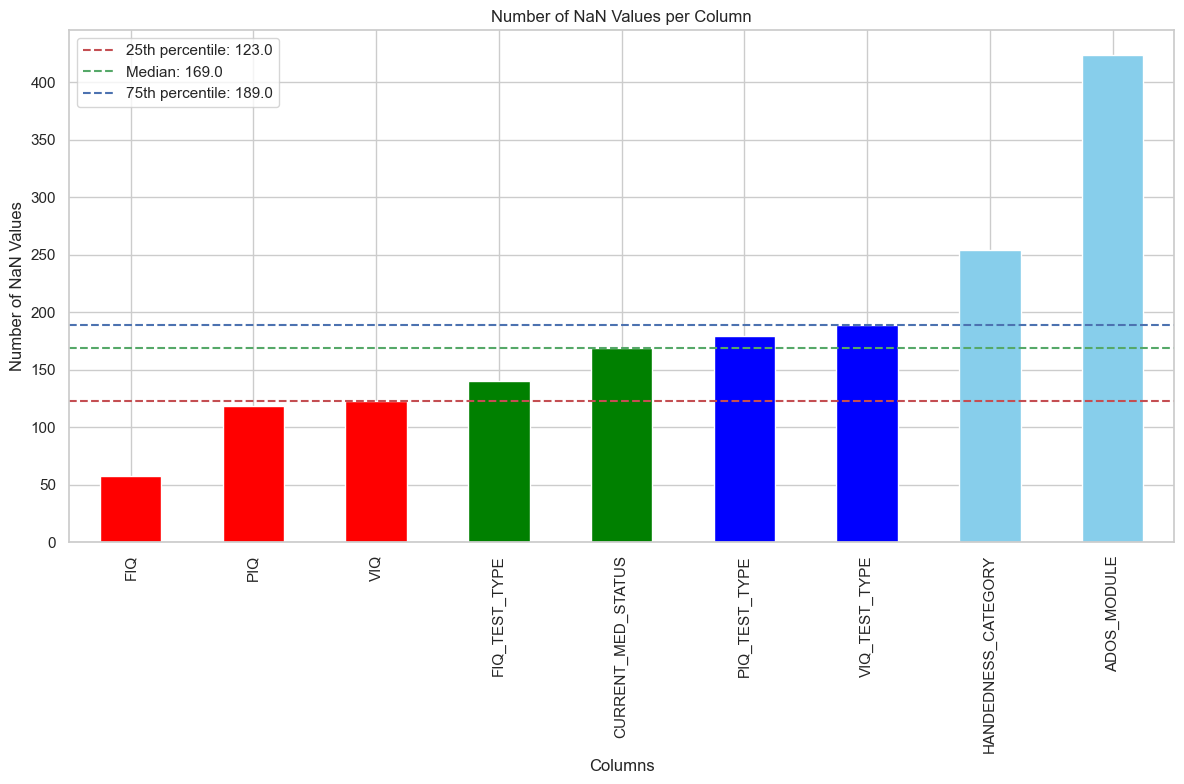

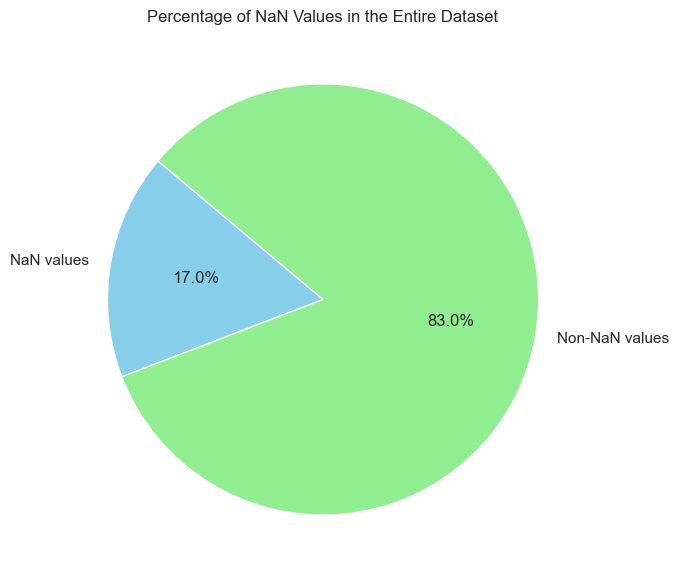

Threshold of non-missing values: 337.5 or 45 %
Number of features:12
Ratio of features to total examples: 1.60%
Ratio of features to non-missing examples:3.56%


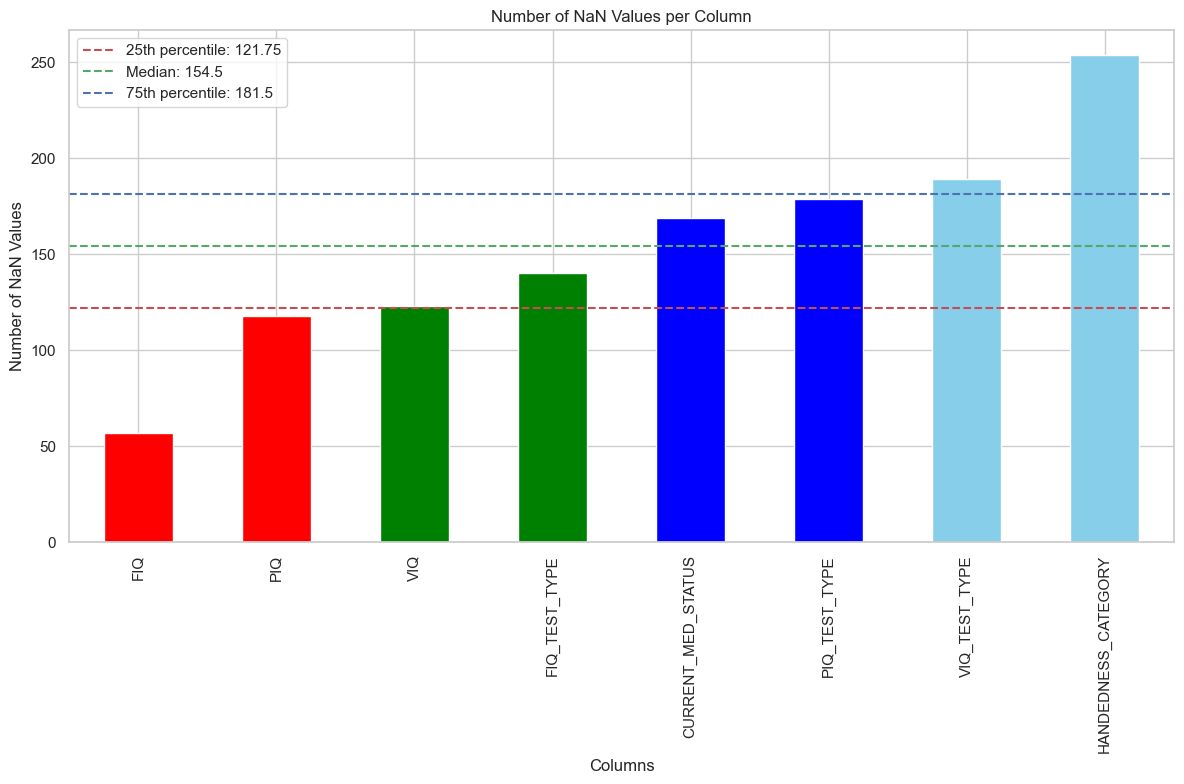

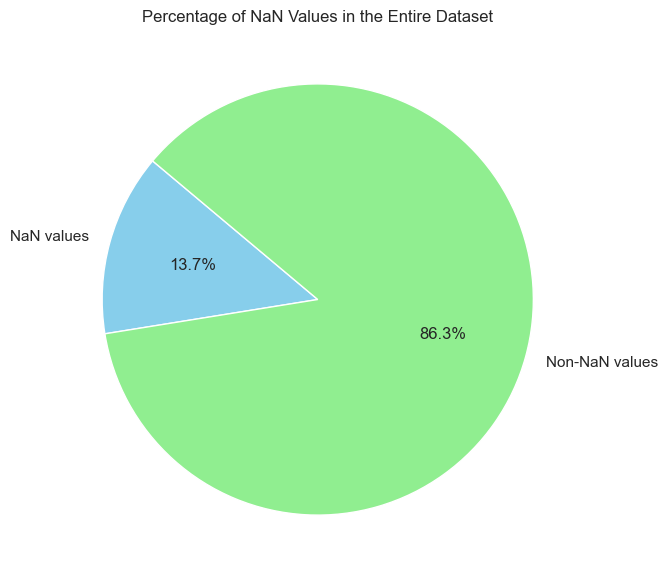

Threshold of non-missing values: 375.0 or 50 %
Number of features:12
Ratio of features to total examples: 1.60%
Ratio of features to non-missing examples:3.20%


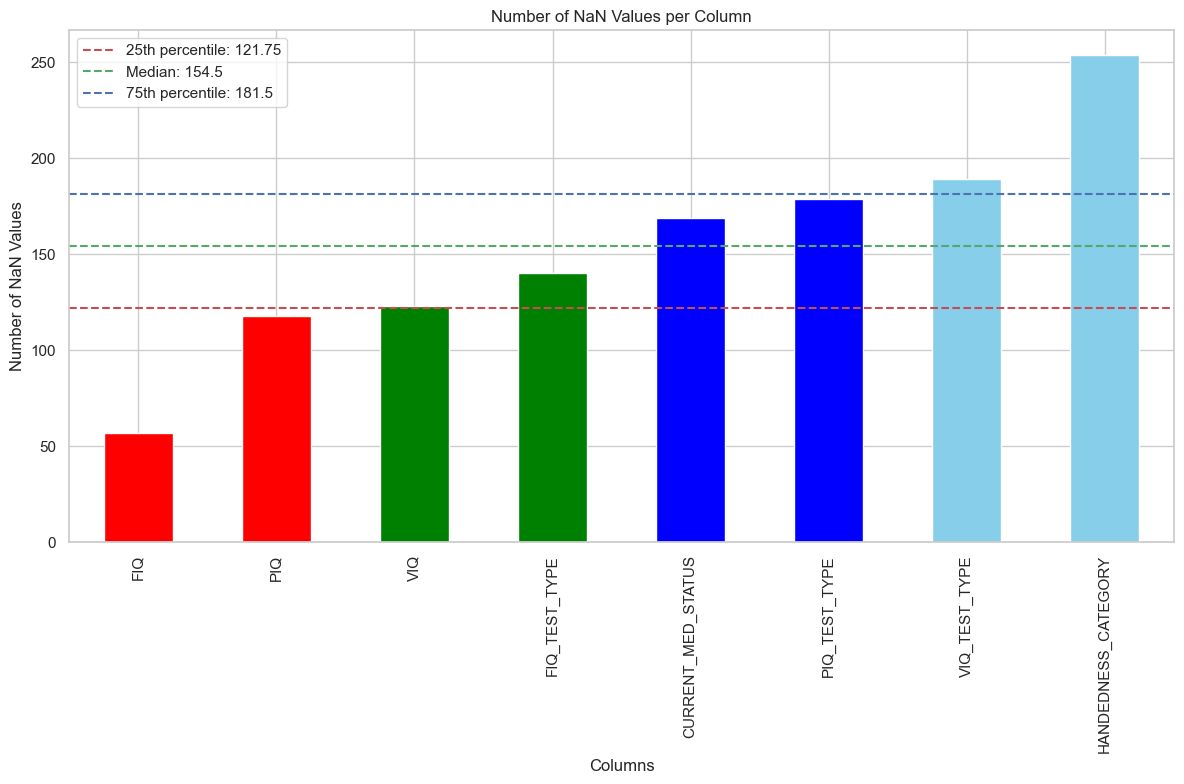

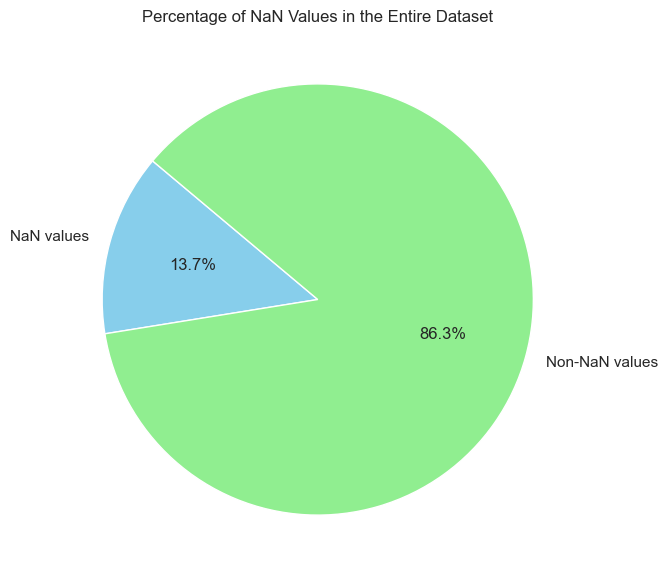

Threshold of non-missing values: 412.5 or 55 %
Number of features:12
Ratio of features to total examples: 1.60%
Ratio of features to non-missing examples:2.91%


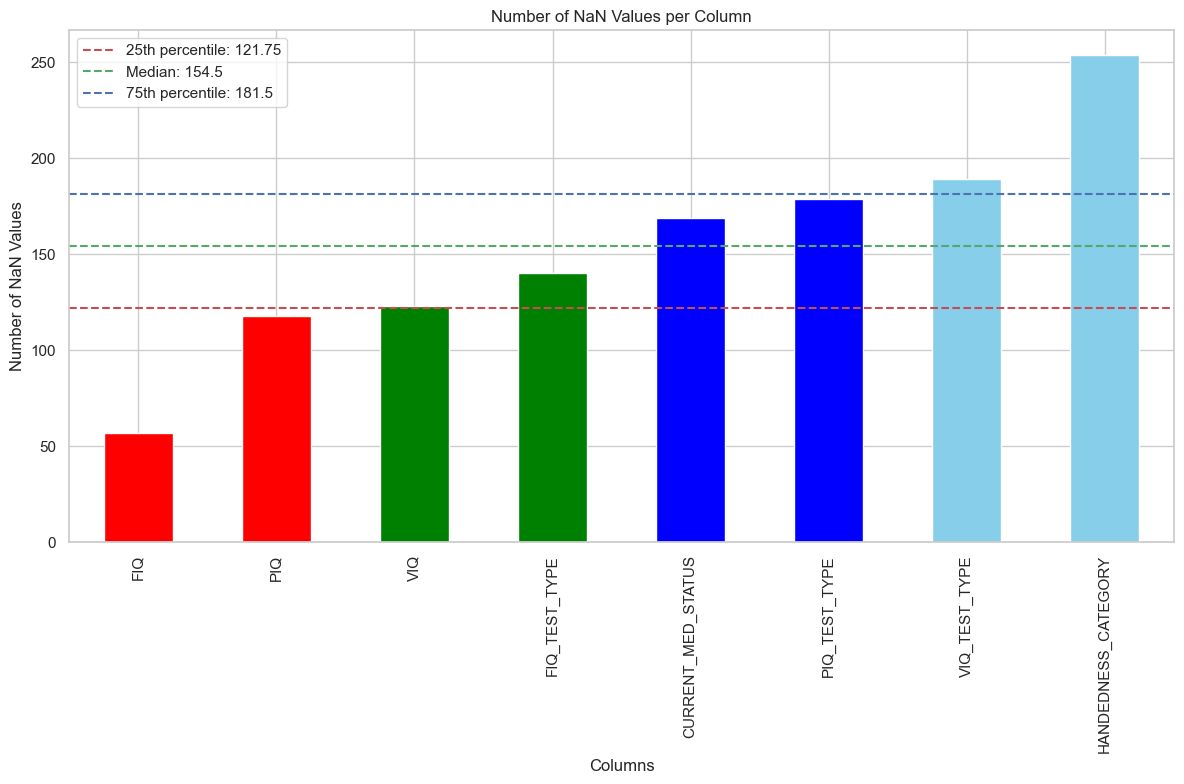

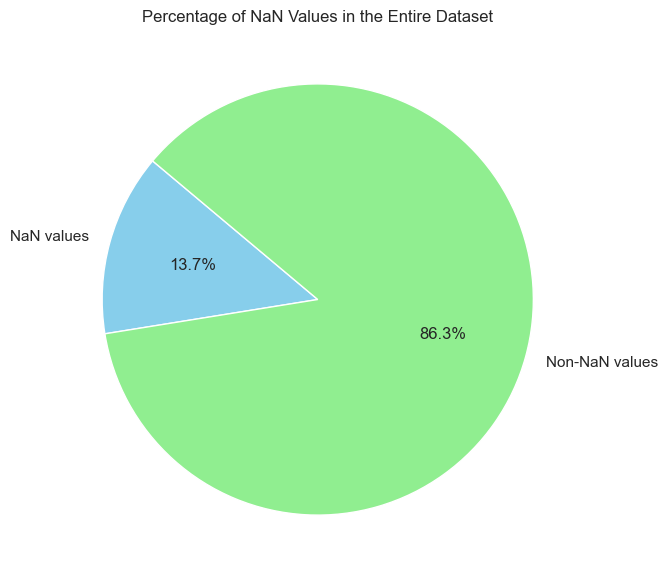

Threshold of non-missing values: 450.0 or 60 %
Number of features:12
Ratio of features to total examples: 1.60%
Ratio of features to non-missing examples:2.67%


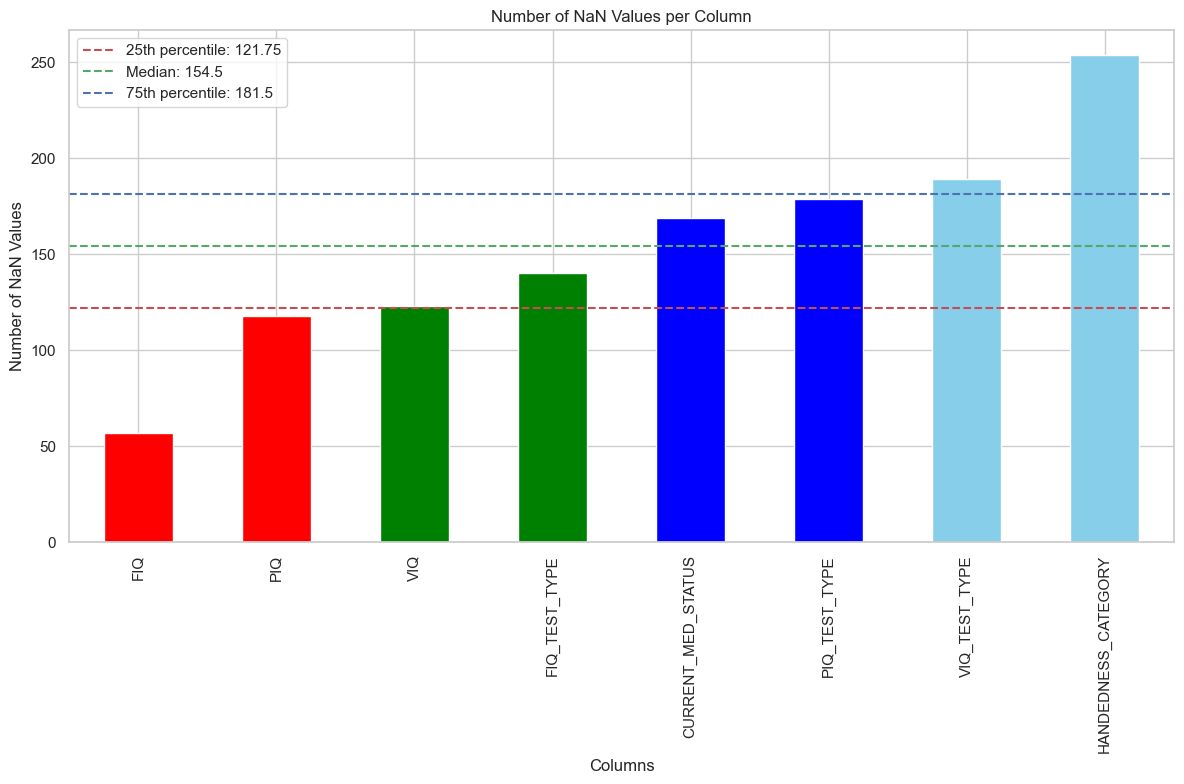

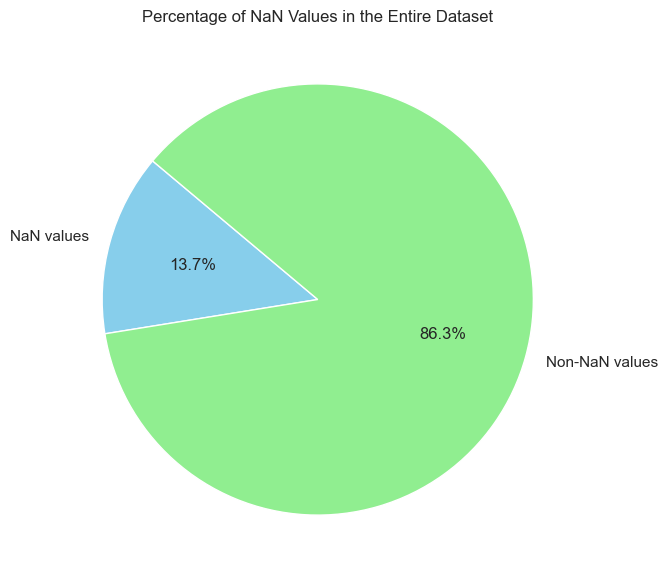

Threshold of non-missing values: 487.5 or 65 %
Number of features:12
Ratio of features to total examples: 1.60%
Ratio of features to non-missing examples:2.46%


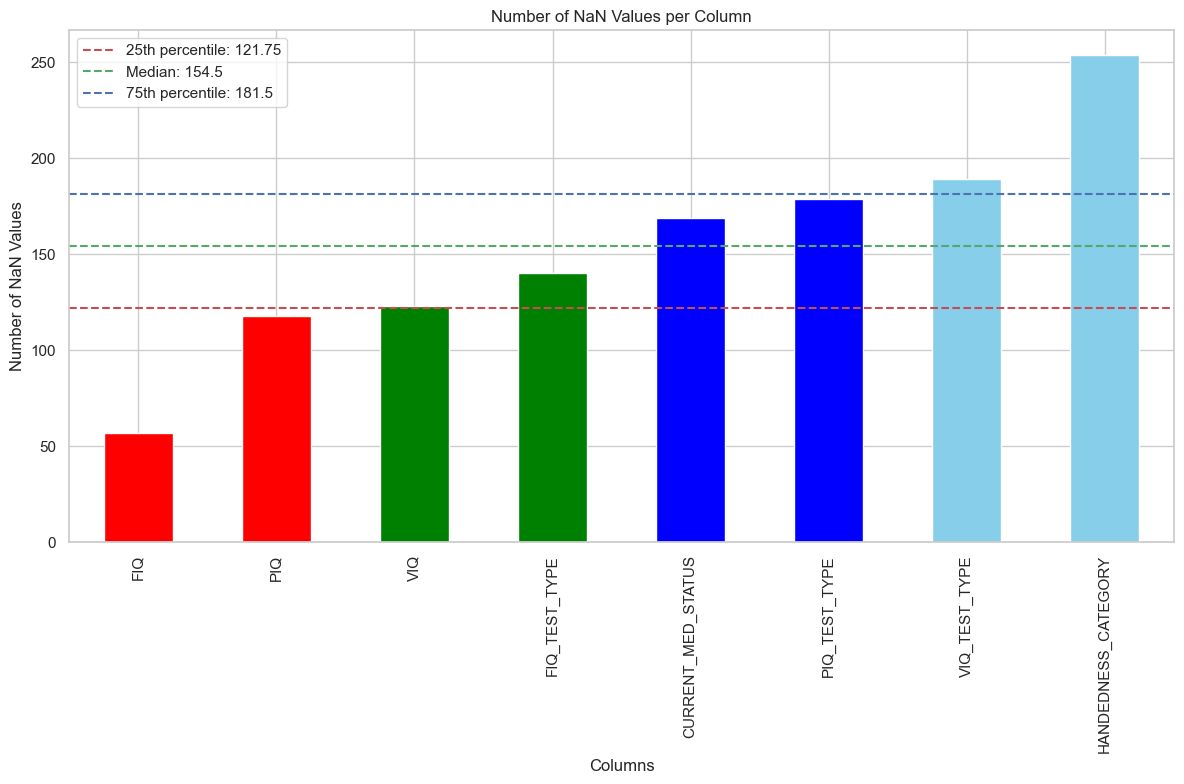

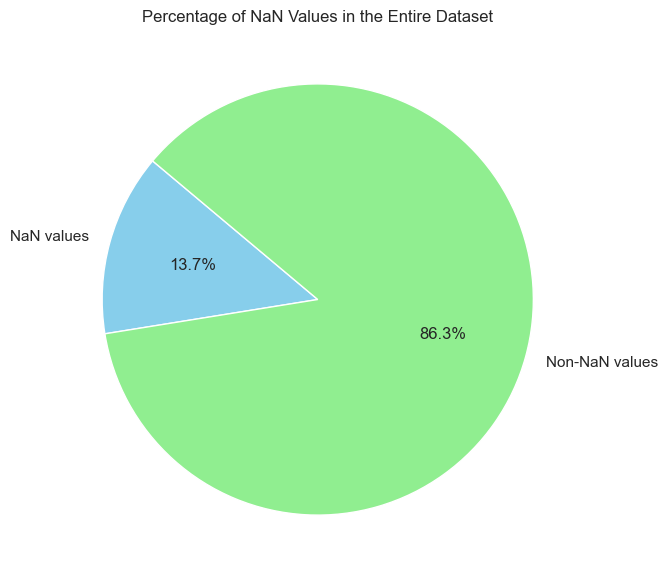

Threshold of non-missing values: 525.0 or 70 %
Number of features:11
Ratio of features to total examples: 1.47%
Ratio of features to non-missing examples:2.10%


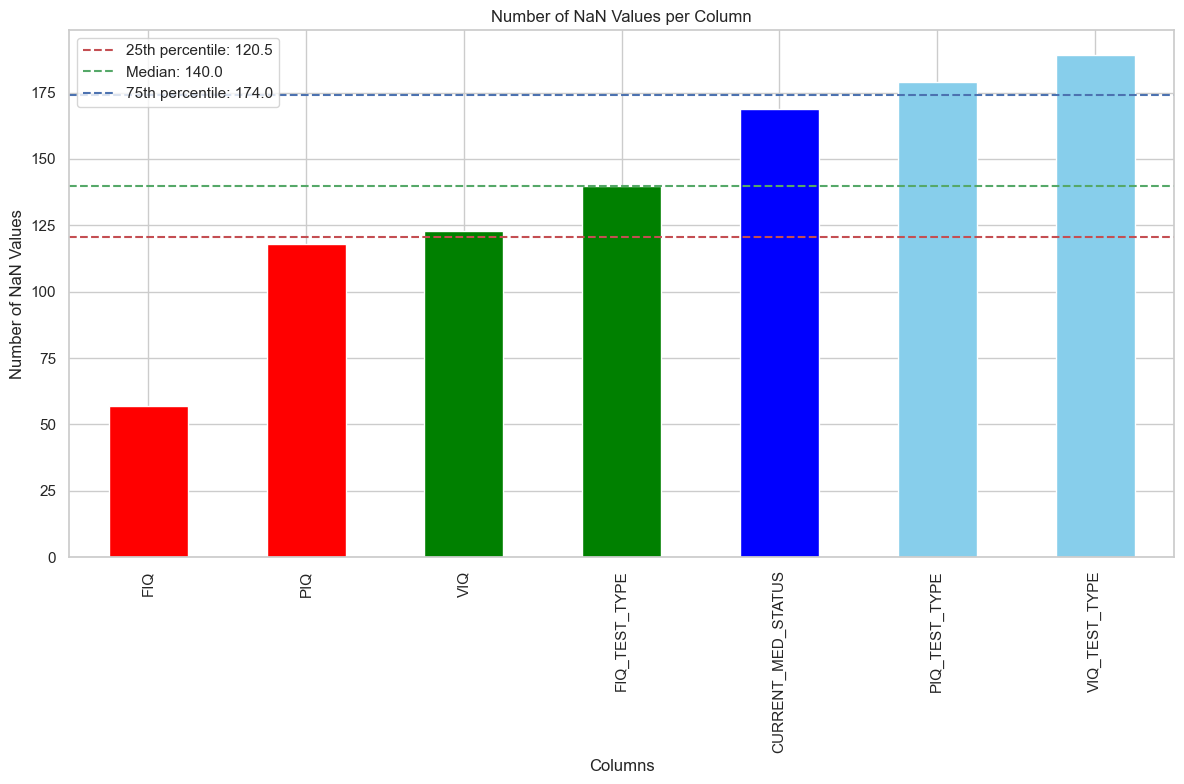

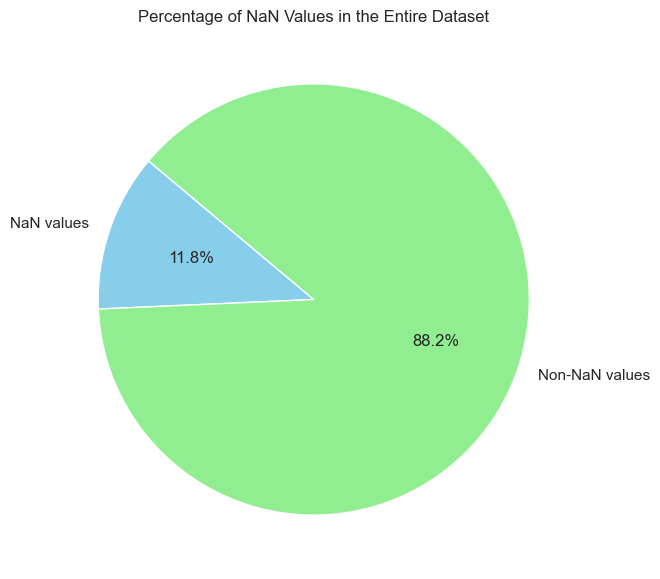

Threshold of non-missing values: 562.5 or 75 %
Number of features:10
Ratio of features to total examples: 1.33%
Ratio of features to non-missing examples:1.78%


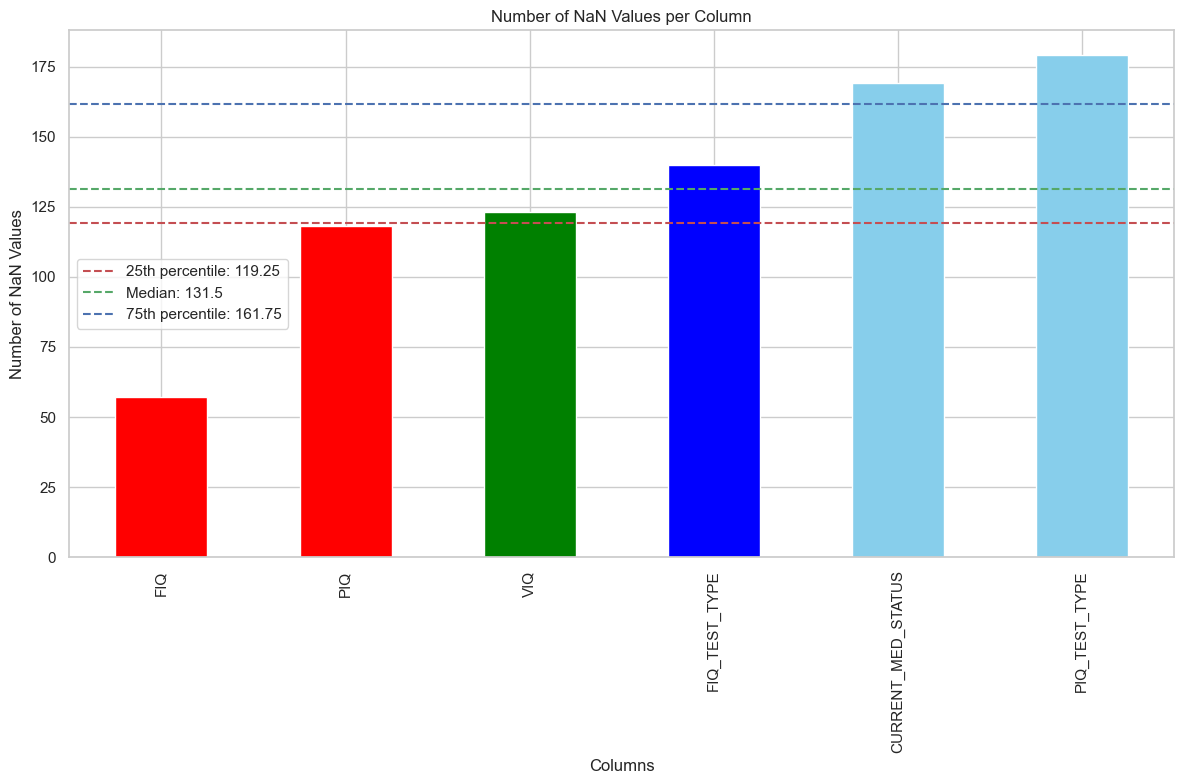

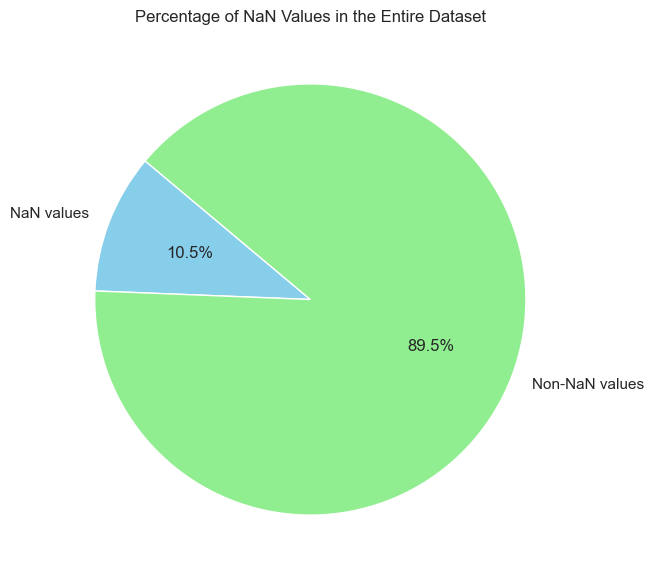

Threshold of non-missing values: 600.0 or 80 %
Number of features:8
Ratio of features to total examples: 1.07%
Ratio of features to non-missing examples:1.33%


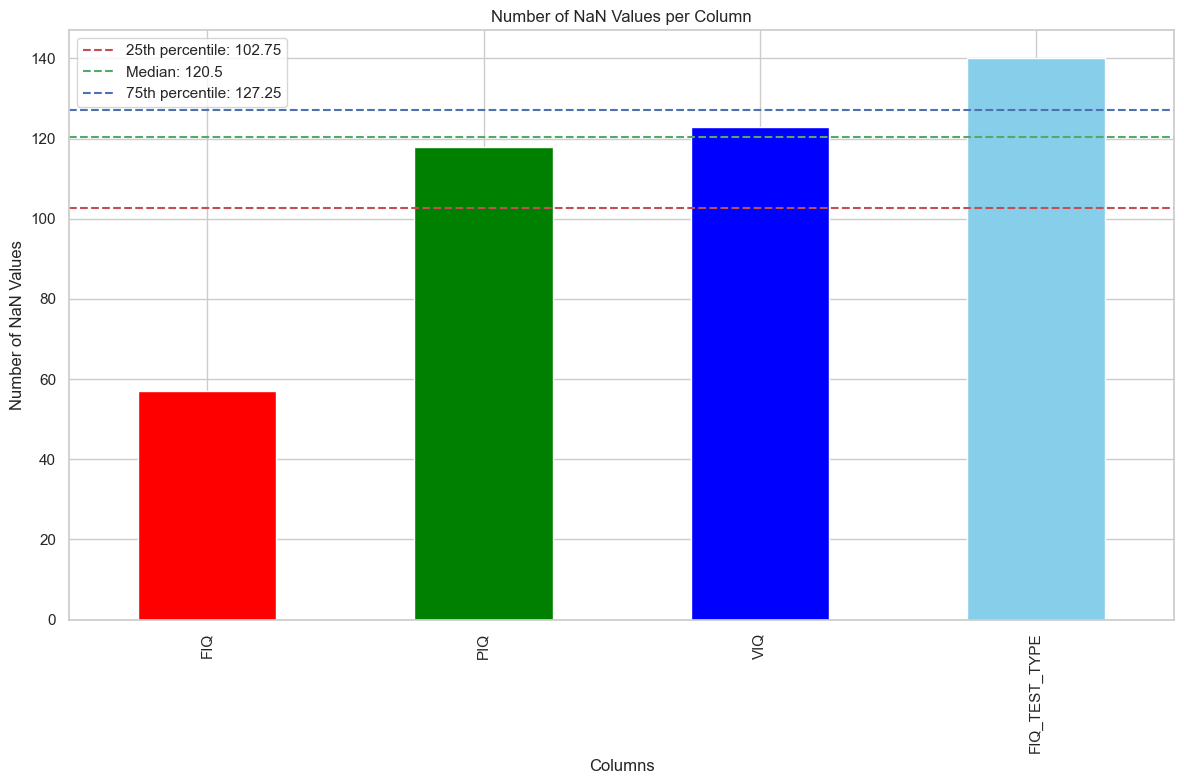

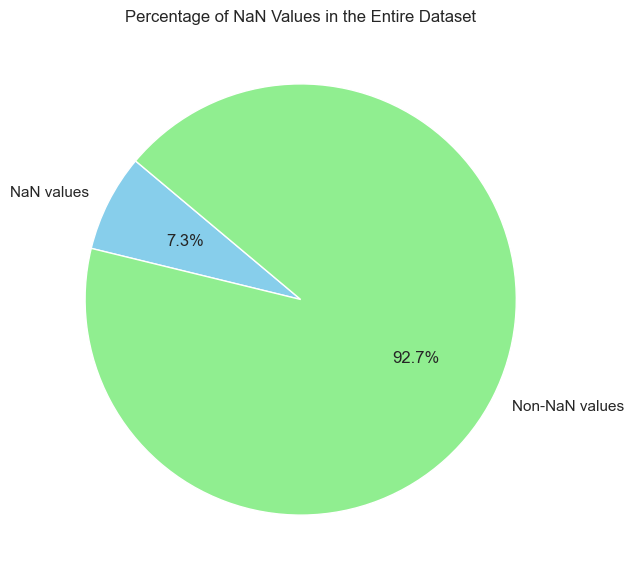

In [60]:
for i in range(20, 85, 5):
    tr = threshold(i)
    d = data.dropna(thresh=tr, axis=1)
    num_rows, num_cols = d.shape
    print(f'Threshold of non-missing values: {tr} or {i} %')
    print(f'Number of features:{num_cols}\nRatio of features to total examples: {num_cols/len(data)*100:.2f}%\nRatio of features to non-missing examples:{num_cols/threshold(i)*100:.2f}%')
    missingvalplot(d)
    nanpie(d)
    

Curse of dimensionality: As the number of features grows, the amount of data (at training time), we need to generalize accurately (at test time) grows exponentially. 
-> Tgus, we need to do regularized risk minimization.

 The VC (Vapnik-Chervonenkis) dimension is a concept from statistical learning theory used to measure the capacity or expressive power of a hypothesis class in machine learning. 
Thus:  A set of points is shattered if for all assignments of labels to those points, there exists a hypothesis h ∈ H that makes no error. Said differently, S is shattered by H if H realizes all possible dichotomies of S (i.e. 2**m).

In this case, we have an optimization problem, we want to maximize ratio of features to total examples, while minimizing the ratio of features to non-missing examples. We also want at least 2*(m-1) examples for m features.

In [175]:
from scipy.optimize import minimize

In [176]:
total_rows = len(data)

def threshold(percentage, total_rows):
    return total_rows * percentage / 100

def objective(percentage):
    percentage = percentage[0]  
    thresh = threshold(percentage, total_rows)
    num_cols = data.dropna(thresh=int(thresh), axis=1).shape[1]
    ratio_features_total = num_cols / total_rows
    ratio_features_non_missing = num_cols / thresh

    return - (ratio_features_total - ratio_features_non_missing)

def constraint(percentage):
    percentage = percentage[0]  
    thresh = threshold(percentage, total_rows)
    num_cols = data.dropna(thresh=int(thresh), axis=1).shape[1]
    return total_rows - 2 * (num_cols-1)

bounds = [(20, 80)]

constraints = [{'type': 'ineq', 'fun': constraint}]

initial_guess = [50]

result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_percentage = result.x[0]
optimal_thresh = threshold(optimal_percentage, total_rows)
num_rows, num_cols = data.dropna(thresh=int(optimal_thresh), axis=1).shape

print(f'Optimal Threshold of non-missing values: {optimal_thresh} or {optimal_percentage:.2f}%')
print(f'Number of features: {num_cols}')
print(f'Ratio of features to total examples: {num_cols / total_rows:.2f}')
print(f'Ratio of features to non-missing examples: {num_cols / optimal_thresh:.2f}')

Optimal Threshold of non-missing values: 375.0 or 50.00%
Number of features: 12
Ratio of features to total examples: 0.02
Ratio of features to non-missing examples: 0.03


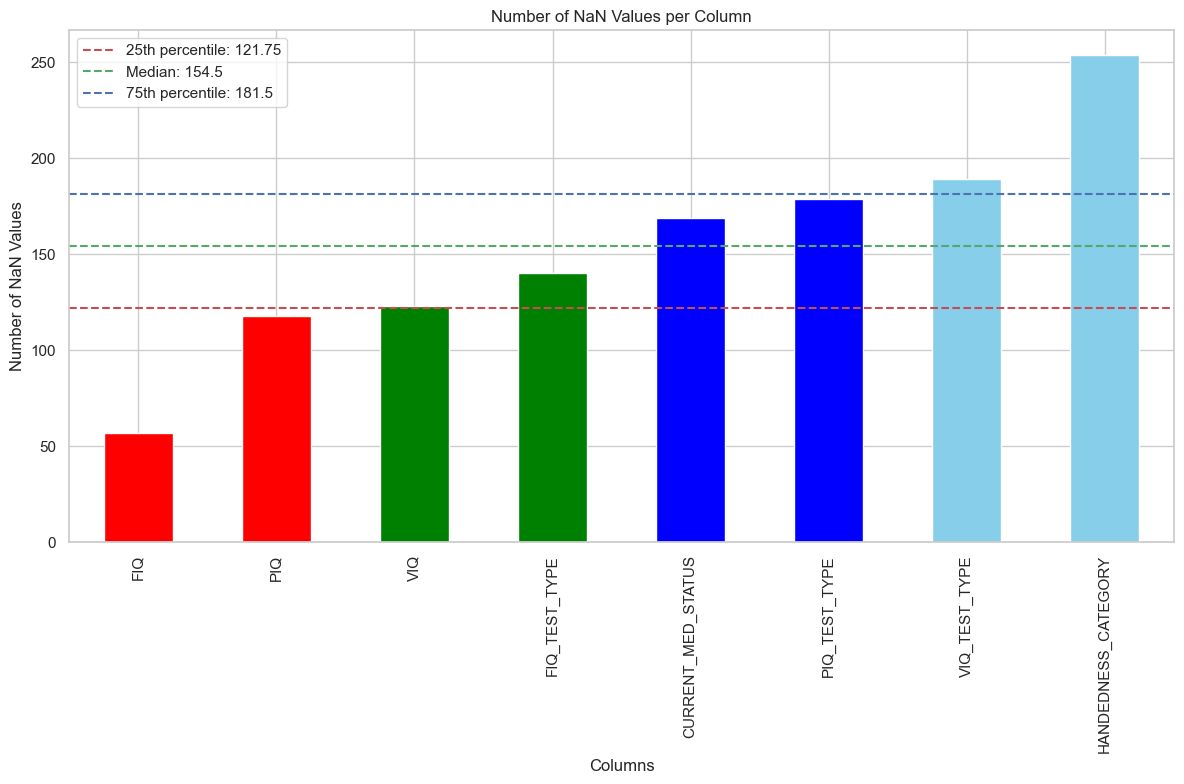

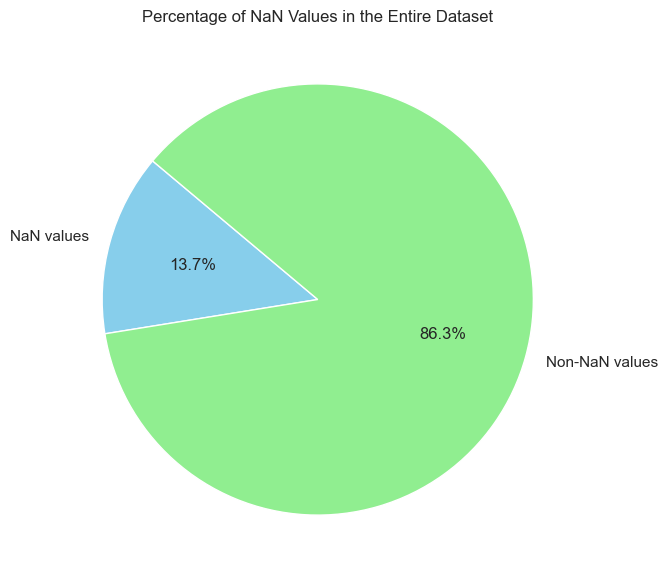

In [177]:
missingvalplot(data.dropna(thresh=optimal_thresh, axis=1))
nanpie(data.dropna(thresh=optimal_thresh, axis=1))

The optimal threshold chosen is 50%

In [178]:
data = data.dropna(thresh=optimal_thresh, axis=1)

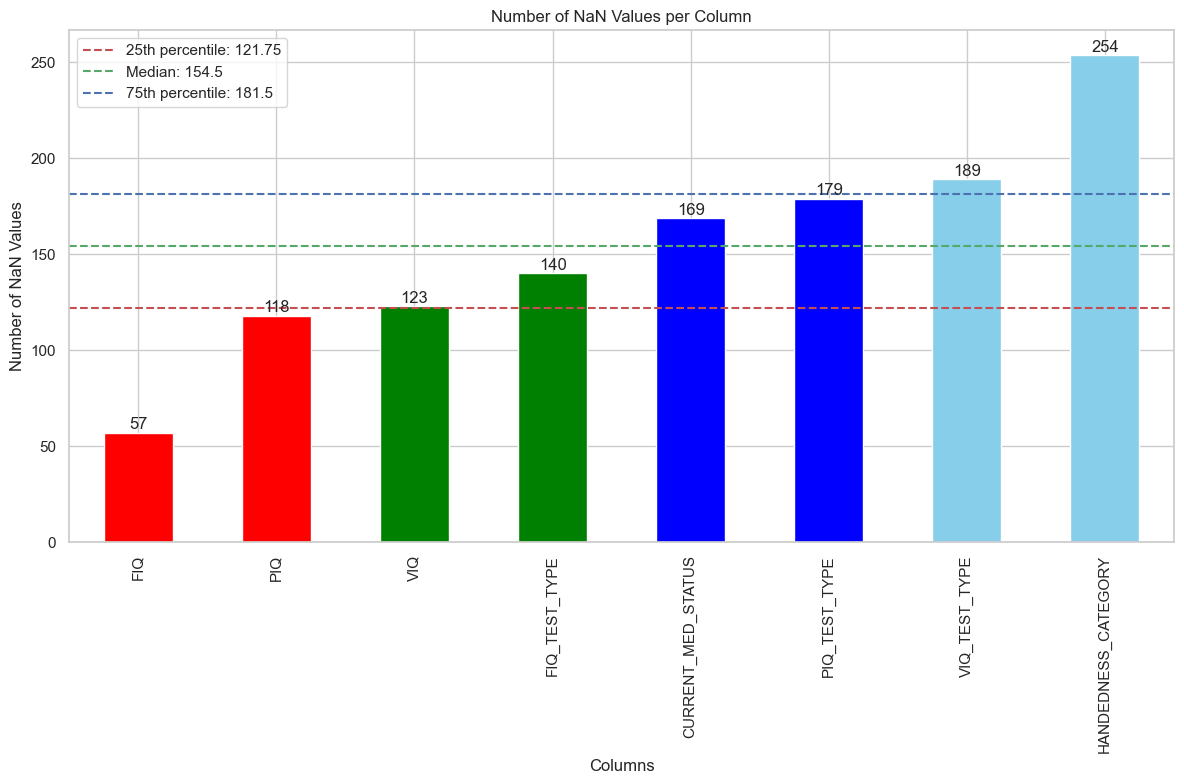

In [179]:
nan_counts = data.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_counts_sorted = nan_counts.sort_values()
quartiles = nan_counts_sorted.quantile([0.25, 0.5, 0.75])

colors = []
for count in nan_counts_sorted:
    if count <= quartiles[0.25]:
        colors.append('red')
    elif count <= quartiles[0.5]:
        colors.append('green')
    elif count <= quartiles[0.75]:
        colors.append('blue')
    else:
        colors.append('skyblue')


plt.figure(figsize=(12, 8))
nan_counts_sorted.plot(kind='bar', color=colors)

for i, v in enumerate(nan_counts_sorted):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.axhline(y=quartiles[0.25], color='r', linestyle='--', label=f'25th percentile: {quartiles[0.25]}')
plt.axhline(y=quartiles[0.5], color='g', linestyle='--', label=f'Median: {quartiles[0.5]}')
plt.axhline(y=quartiles[0.75], color='b', linestyle='--', label=f'75th percentile: {quartiles[0.75]}')

plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [180]:
data.shape

(750, 12)

In [181]:
nan_counts = data.isna().sum()
nan_counts.sum()

1229

In [182]:
nan_counts_sorted.keys()

Index(['FIQ', 'PIQ', 'VIQ', 'FIQ_TEST_TYPE', 'CURRENT_MED_STATUS',
       'PIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'HANDEDNESS_CATEGORY'],
      dtype='object')

In [183]:
unique_values_specified_columns = {}
for k in nan_counts_sorted.keys():
    unique_values_specified_columns[k] = data[k].unique()

unique_values_specified_columns

{'FIQ': array([124. , 113. , 119. , 109. , 110. , 123. ,  81. , 111. , 128. ,
         86. ,  96. ,  99. , 100. ,  97. , 127. , 131. ,  87. ,  98. ,
        105. , 106. , 107. , 103. , 115. , 130. , 118. , 122. , 126. ,
        125. , 129. , 132. , 102. , 135. ,  80. ,   nan, 114. , 108. ,
         71. ,  82. ,  69.6, 107.6,  77.2, 105.7, 104. , 112. , 120. ,
        118.7, 115.2, 139. , 141. , 121. , 117. ,  93. ,  88. ,  89. ,
         90. ,  72. ,  94. , 116. , 133. , 101. ,  98.5, 112.5, 111.5,
         85. , 146.5, 107.5,  87.5,  99.5, 130.5,  96.5, 108.5,  89.5,
        125.5,  78.5,  91. , 118.5, 147.5, 124.5,  77. , 103.5, 100.5,
        106.5, 121.5, 115.5, 109.5, 113.5, 127.5,  92.5, 104.5,  93.5,
        123.5,  95.5, 114.5, 120.5, 129.5,  90.5, 110.5, 133.5, 138. ,
        134. ,  92. ,  65. ,  78. ,  95. ,  83. ,  76. ,  84. , 137. ,
         41. ,  61. , 146. ,  69. ,  79. , 142. , 148. , 136. ,  75. ]),
 'PIQ': array([115., 117., 118., 119., 112., 114.,  93., 120., 128.,

##### Handedness Category

In [184]:
data['HANDEDNESS_CATEGORY'].unique()

array(['R', 'L', nan, 'Mixed', 'Ambi'], dtype=object)

In [185]:
data['HANDEDNESS_CATEGORY'].value_counts(dropna=False)

HANDEDNESS_CATEGORY
R        439
NaN      254
L         51
Mixed      5
Ambi       1
Name: count, dtype: int64

How do we deal with the unknowns or express to our model that we do not have the known values? In medical data, we cannot impute values. Thus to express this:
* We will define two columns HANDEDNESS_L and HANDEDNESS_R 
* For cases of L: HANDEDNESS_L will be assigned a value of 1 while for HANDEDNESS_R a value of 0 will be assigned
* For cases of R: HANDEDNESS_R will be assigned a value of 1 while for HANDEDNESS_L a value of 0 will be assigned
* To express that an individual is Ambidextrous or Mixed: both HANDEDNESS_L and HANDEDNESS_R will have a value of 1
* To express that the handedness is unknown, both HANDEDNESS_R and HANDEDNESS_L will have a value of 0

In [186]:
def custom_one_hot_encode(data, column):
    data['HANDEDNESS_L'] = 0
    data['HANDEDNESS_R'] = 0

    data.loc[data[column] == 'R', 'HANDEDNESS_R'] = 1
    data.loc[data[column] == 'L', 'HANDEDNESS_L'] = 1
    data.loc[data[column].isin(['Ambi', 'Mixed']), ['HANDEDNESS_L', 'HANDEDNESS_R']] = 1
    
    return data

In [187]:
data = custom_one_hot_encode(data, 'HANDEDNESS_CATEGORY')

In [188]:
data

DX_GROUP  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY    FIQ    VIQ    PIQ  \
SUB_ID                                                                        
50003          1        24.45    1                   R  124.0  128.0  115.0   
50004          1        19.09    1                   R  113.0  108.0  117.0   
50005          1        13.73    2                   R  119.0  117.0  118.0   
50006          1        13.37    1                   L  109.0   99.0  119.0   
50007          1        17.78    1                   R  110.0  106.0  112.0   
...          ...          ...  ...                 ...    ...    ...    ...   
51583          1        35.00    1                 NaN   95.0  105.0   84.0   
51584          1        49.00    1                 NaN    NaN  133.0  135.0   
51585          1        27.00    1                 NaN   96.0   99.0  106.0   
51606          1        29.00    2                   R  118.0    NaN    NaN   
51607          1        26.00    1                   R  110.0    NaN    NaN   

       FIQ_TEST_TYPE VIQ_TEST_TYPE PIQ_TEST_TYPE CURRENT_MED_STATUS  \
SUB_ID                                                                
50003           WASI          WASI          WASI                  1   
50004           WASI          WASI          WASI                  0   
50005           WASI          WASI          WASI                  1   
50006           WASI          WASI          WASI                  0   
50007           WASI          WASI          WASI                  0   
...              ...           ...           ...                ...   
51583       WAIS_III      WAIS_III      WAIS_III                  0   
51584            NaN           GIT           GIT                  0   
51585       WAIS_III      WAIS_III      WAIS_III                  0   
51606            WST           NaN           NaN                  0   
51607            WST           NaN           NaN                  0   

        EYE_STATUS_AT_SCAN  HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                                                  
50003                    2             0             1  
50004                    2             0             1  
50005                    2             0             1  
50006                    2             1             0  
50007                    2             0             1  
...                    ...           ...           ...  
51583                    2             0             0  
51584                    2             0             0  
51585                    2             0             0  
51606                    2             0             1  
51607                    2             0             1  

[750 rows x 14 columns]

We check if the rules have been properly assigned:

In [189]:
data[['HANDEDNESS_CATEGORY', 'HANDEDNESS_L', 'HANDEDNESS_R']].drop_duplicates()

HANDEDNESS_CATEGORY  HANDEDNESS_L  HANDEDNESS_R
SUB_ID                                                
50003                    R             0             1
50006                    L             1             0
50030                  NaN             0             0
50792                Mixed             1             1
51464                 Ambi             1             1

We can drop handedness_category altogether

In [190]:
data = data.drop(columns=['HANDEDNESS_CATEGORY'])

In [191]:
data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ FIQ_TEST_TYPE  \
SUB_ID                                                                  
50003          1        24.45    1  124.0  128.0  115.0          WASI   
50004          1        19.09    1  113.0  108.0  117.0          WASI   
50005          1        13.73    2  119.0  117.0  118.0          WASI   
50006          1        13.37    1  109.0   99.0  119.0          WASI   
50007          1        17.78    1  110.0  106.0  112.0          WASI   
...          ...          ...  ...    ...    ...    ...           ...   
51583          1        35.00    1   95.0  105.0   84.0      WAIS_III   
51584          1        49.00    1    NaN  133.0  135.0           NaN   
51585          1        27.00    1   96.0   99.0  106.0      WAIS_III   
51606          1        29.00    2  118.0    NaN    NaN           WST   
51607          1        26.00    1  110.0    NaN    NaN           WST   

       VIQ_TEST_TYPE PIQ_TEST_TYPE CURRENT_MED_STATUS  EYE_STATUS_AT_SCAN  \
SUB_ID                                                                      
50003           WASI          WASI                  1                   2   
50004           WASI          WASI                  0                   2   
50005           WASI          WASI                  1                   2   
50006           WASI          WASI                  0                   2   
50007           WASI          WASI                  0                   2   
...              ...           ...                ...                 ...   
51583       WAIS_III      WAIS_III                  0                   2   
51584            GIT           GIT                  0                   2   
51585       WAIS_III      WAIS_III                  0                   2   
51606            NaN           NaN                  0                   2   
51607            NaN           NaN                  0                   2   

        HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                              
50003              0             1  
50004              0             1  
50005              0             1  
50006              1             0  
50007              0             1  
...              ...           ...  
51583              0             0  
51584              0             0  
51585              0             0  
51606              0             1  
51607              0             1  

[750 rows x 13 columns]

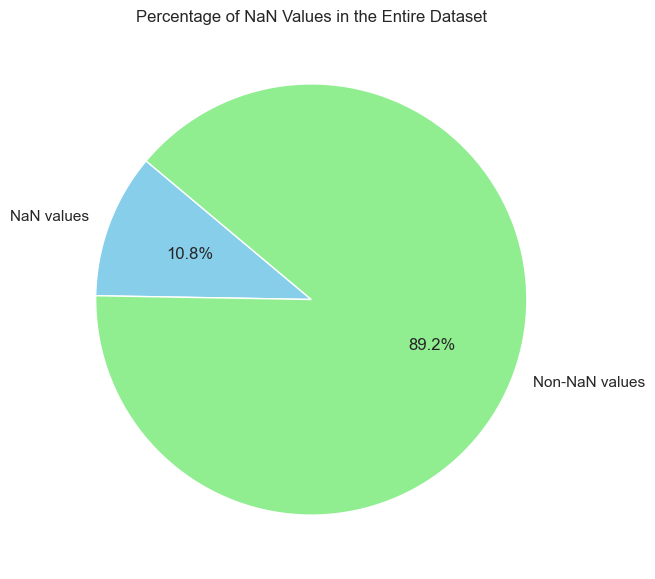

In [192]:
nanpie(data)

##### Deleting the NaNs
In the case of the remaining values, we simply cannot impute them. Thus, we have to delete the rows for which there are NaN values. Those NaN values compose 10% of the total entries of the dataset.

Current Med Status

This is the column for whether or not a subject is taking medication: the coding specification is as such as 0 = not taking medication; and 1 = taking medication.

In [193]:
data['CURRENT_MED_STATUS'].unique()

array(['1', '0', nan, '`'], dtype=object)

In [194]:
data.loc[:, 'CURRENT_MED_STATUS'] = data['CURRENT_MED_STATUS'].replace(['`'], np.NaN)

In [195]:
data['CURRENT_MED_STATUS'].unique()

array(['1', '0', nan], dtype=object)

In [196]:
data['CURRENT_MED_STATUS'].value_counts(dropna=False)

CURRENT_MED_STATUS
0      493
NaN    170
1       87
Name: count, dtype: int64

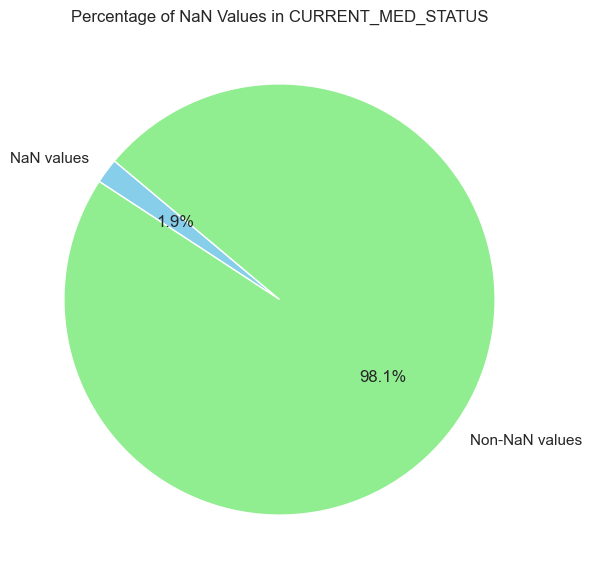

In [197]:
nanpie(data['CURRENT_MED_STATUS'], x='CURRENT_MED_STATUS')

Before we drop those 110 values, let's check how many of them are NaN values in common with the other features: FIQ,	VIQ,	PIQ,	FIQ_TEST_TYPE,	VIQ_TEST_TYPE,	PIQ_TEST_TYPE

FIQ is the Full-Scale Intelligence Quotient (FIQ), it's a test of an individual's complete cognitive capacity.

In [198]:
data['FIQ'].value_counts(dropna=False).head(10)

FIQ
NaN      57
100.0    26
112.0    21
109.0    21
108.0    21
113.0    20
110.0    19
104.0    18
102.0    18
98.0     17
Name: count, dtype: int64

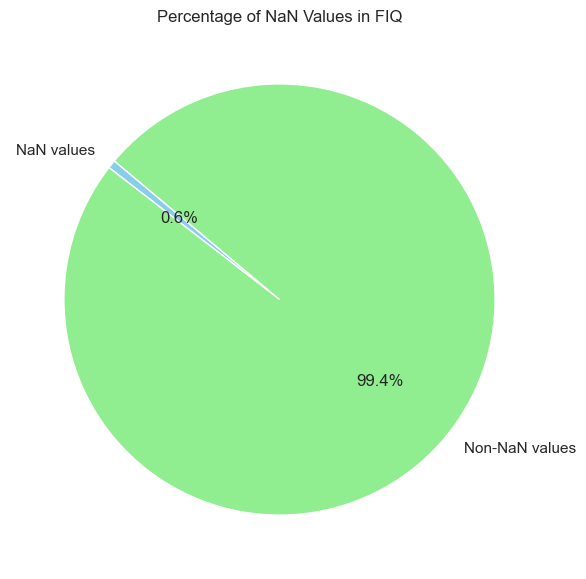

In [199]:
nanpie(data['FIQ'], x='FIQ')

VIQ is the  verbal intelligence quotient (VIQ) and represents the ability to access and apply acquired word knowledge, involving verbal concept formation, reasoning and expression.

In [200]:
data['VIQ'].value_counts(dropna=False).head(10)

VIQ
NaN      123
98.0      25
109.0     24
108.0     21
99.0      20
106.0     20
119.0     20
121.0     19
115.0     18
113.0     17
Name: count, dtype: int64

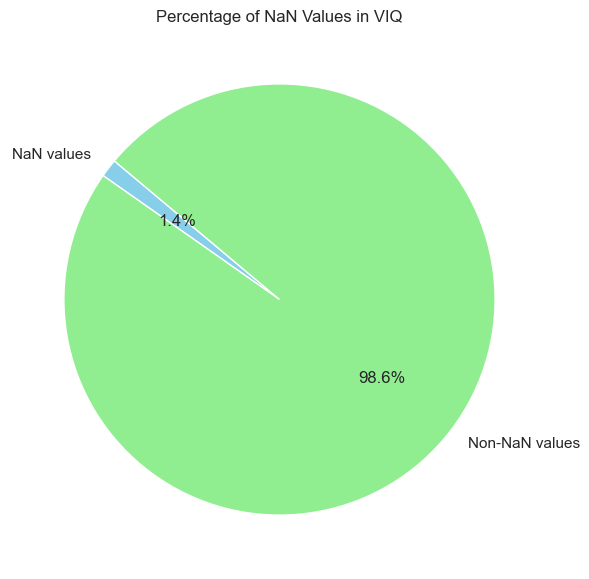

In [201]:
nanpie(data['VIQ'],x='VIQ')

The PIQ is the Performance Intelligence Quotient (PIQ) is a score resulting from a test that assesses your child's mental capacity in dealing with nonverbal skills

In [202]:
data['PIQ'].value_counts(dropna=False).head(10)

PIQ
NaN      118
103.0     31
106.0     29
119.0     27
109.0     25
99.0      21
115.0     20
120.0     19
110.0     19
117.0     18
Name: count, dtype: int64

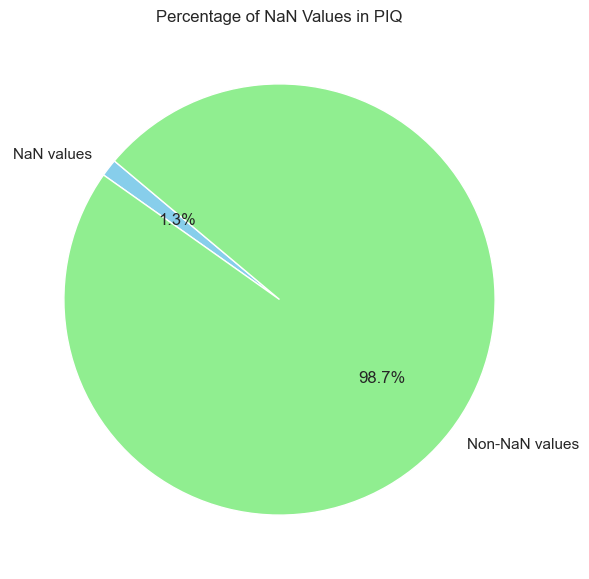

In [203]:
nanpie(data['PIQ'],x='PIQ')

FIQ_TEST_TYPE,	VIQ_TEST_TYPE,	PIQ_TEST_TYPE are columns to indicate the specific test used to assess each metric

In [204]:
data['PIQ_TEST_TYPE'].value_counts(dropna=False).head(10)

PIQ_TEST_TYPE
WASI            338
NaN             179
Ravens           95
DAS_II_SA        44
WAIS_III         35
WISC_IV_FULL     26
RAVENS           13
WISC              8
GIT               6
ravens            2
Name: count, dtype: int64

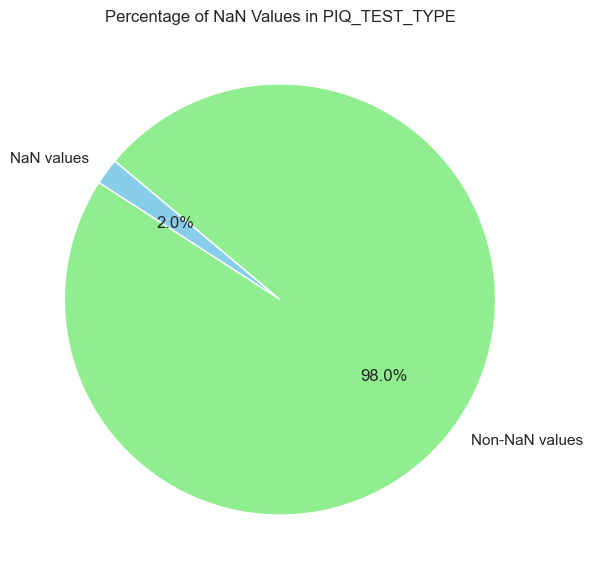

In [205]:
nanpie(data['PIQ_TEST_TYPE'], x='PIQ_TEST_TYPE')

In [206]:
data['VIQ_TEST_TYPE'].value_counts(dropna=False).head(10)

VIQ_TEST_TYPE
WASI            338
NaN             189
PPVT             99
DAS_II_SA        43
WAIS_III         35
WISC_IV_FULL     26
WISC              8
GIT               6
ppvt              2
WAIS              2
Name: count, dtype: int64

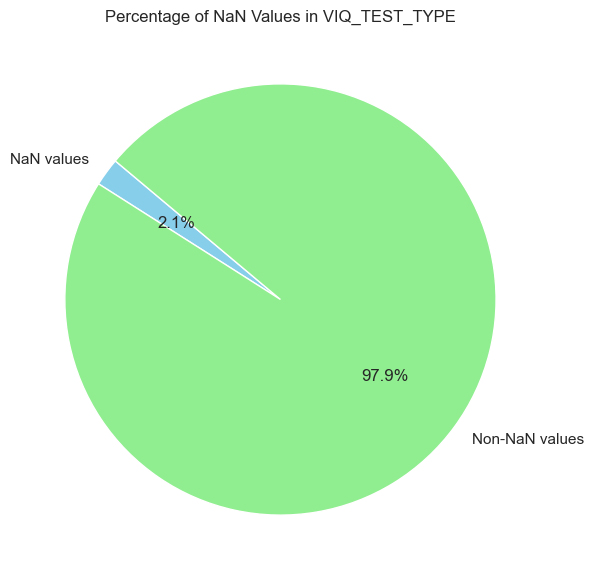

In [207]:
nanpie(data['VIQ_TEST_TYPE'], x='VIQ_TEST_TYPE')

In [208]:
data['FIQ_TEST_TYPE'].value_counts(dropna=False).head(10)

FIQ_TEST_TYPE
WASI                  372
NaN                   140
WISC_IV_FULL           59
WAIS_III               49
DAS_II_SA              32
WISC_III_DUTCH         27
WISC_IV_4_SUBTESTS     24
WST                    23
WISC_III                8
WISC                    8
Name: count, dtype: int64

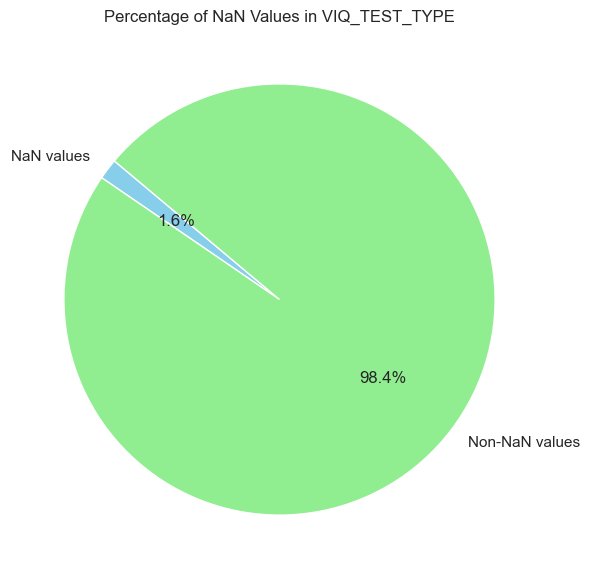

In [209]:
nanpie(data['FIQ_TEST_TYPE'], x='VIQ_TEST_TYPE')

Let us check how many NaN values are shared between: CURRENT_MED_STATUS, FIQ,	VIQ,	PIQ,	FIQ_TEST_TYPE,	VIQ_TEST_TYPE,	PIQ_TEST_TYPE

In [210]:
columns_with_issues = ['CURRENT_MED_STATUS', 'FIQ', 'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE']

rows_with_issues = data[columns_with_issues].apply(lambda x: x.isna()).all(axis=1)
rows_with_issues_count = rows_with_issues.sum()

rows_with_issues_count


0

In [211]:
from itertools import combinations

In [212]:
all_combinations = []
for r in range(1, len(columns_with_issues) + 1):
    combinations_r = list(combinations(columns_with_issues, r))
    all_combinations.extend(combinations_r)

print(len(all_combinations))
for combo in all_combinations:
    print(combo)

127
('CURRENT_MED_STATUS',)
('FIQ',)
('VIQ',)
('PIQ',)
('FIQ_TEST_TYPE',)
('VIQ_TEST_TYPE',)
('PIQ_TEST_TYPE',)
('CURRENT_MED_STATUS', 'FIQ')
('CURRENT_MED_STATUS', 'VIQ')
('CURRENT_MED_STATUS', 'PIQ')
('CURRENT_MED_STATUS', 'FIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'VIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'PIQ_TEST_TYPE')
('FIQ', 'VIQ')
('FIQ', 'PIQ')
('FIQ', 'FIQ_TEST_TYPE')
('FIQ', 'VIQ_TEST_TYPE')
('FIQ', 'PIQ_TEST_TYPE')
('VIQ', 'PIQ')
('VIQ', 'FIQ_TEST_TYPE')
('VIQ', 'VIQ_TEST_TYPE')
('VIQ', 'PIQ_TEST_TYPE')
('PIQ', 'FIQ_TEST_TYPE')
('PIQ', 'VIQ_TEST_TYPE')
('PIQ', 'PIQ_TEST_TYPE')
('FIQ_TEST_TYPE', 'VIQ_TEST_TYPE')
('FIQ_TEST_TYPE', 'PIQ_TEST_TYPE')
('VIQ_TEST_TYPE', 'PIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'FIQ', 'VIQ')
('CURRENT_MED_STATUS', 'FIQ', 'PIQ')
('CURRENT_MED_STATUS', 'FIQ', 'FIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'FIQ', 'VIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'FIQ', 'PIQ_TEST_TYPE')
('CURRENT_MED_STATUS', 'VIQ', 'PIQ')
('CURRENT_MED_STATUS', 'VIQ', 'FIQ_TEST_TYPE')
('CU

In [213]:
def getnanmaxcombos(data):
    combo_data = []

    for combo in all_combinations:
        rows_with_issues = data[list(combo)].apply(lambda x: x.isna()).all(axis=1)
        rows_with_issues_count = rows_with_issues.sum()
        combo_data.append({'Combination': combo, 'Missing Count': rows_with_issues_count})

    df_combos = pd.DataFrame(combo_data)
    df_combos = df_combos.sort_values(by='Missing Count', ascending=False)

    return df_combos

getnanmaxcombos(data)

Combination  Missing Count
5                                     (VIQ_TEST_TYPE,)            189
6                                     (PIQ_TEST_TYPE,)            179
27                      (VIQ_TEST_TYPE, PIQ_TEST_TYPE)            179
0                                (CURRENT_MED_STATUS,)            170
4                                     (FIQ_TEST_TYPE,)            140
..                                                 ...            ...
104  (CURRENT_MED_STATUS, FIQ, PIQ, FIQ_TEST_TYPE, ...              0
105  (CURRENT_MED_STATUS, FIQ, PIQ, FIQ_TEST_TYPE, ...              0
80   (CURRENT_MED_STATUS, PIQ, FIQ_TEST_TYPE, PIQ_T...              0
107  (CURRENT_MED_STATUS, FIQ, FIQ_TEST_TYPE, VIQ_T...              0
126  (CURRENT_MED_STATUS, FIQ, VIQ, PIQ, FIQ_TEST_T...              0

[127 rows x 2 columns]

Should we keep the test types? Do they give any meaningful information and is there any correlation?

Correlation between FIQ and FIQ_TEST_TYPE

In [214]:
def corrheatmap(selected_corr_columns):
    selected_corr_data = data[selected_corr_columns].dropna()

    encoded_data = pd.get_dummies(selected_corr_data)

    corr_matrix = encoded_data.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for Selected Variables :{selected_corr_columns}')
    plt.show()

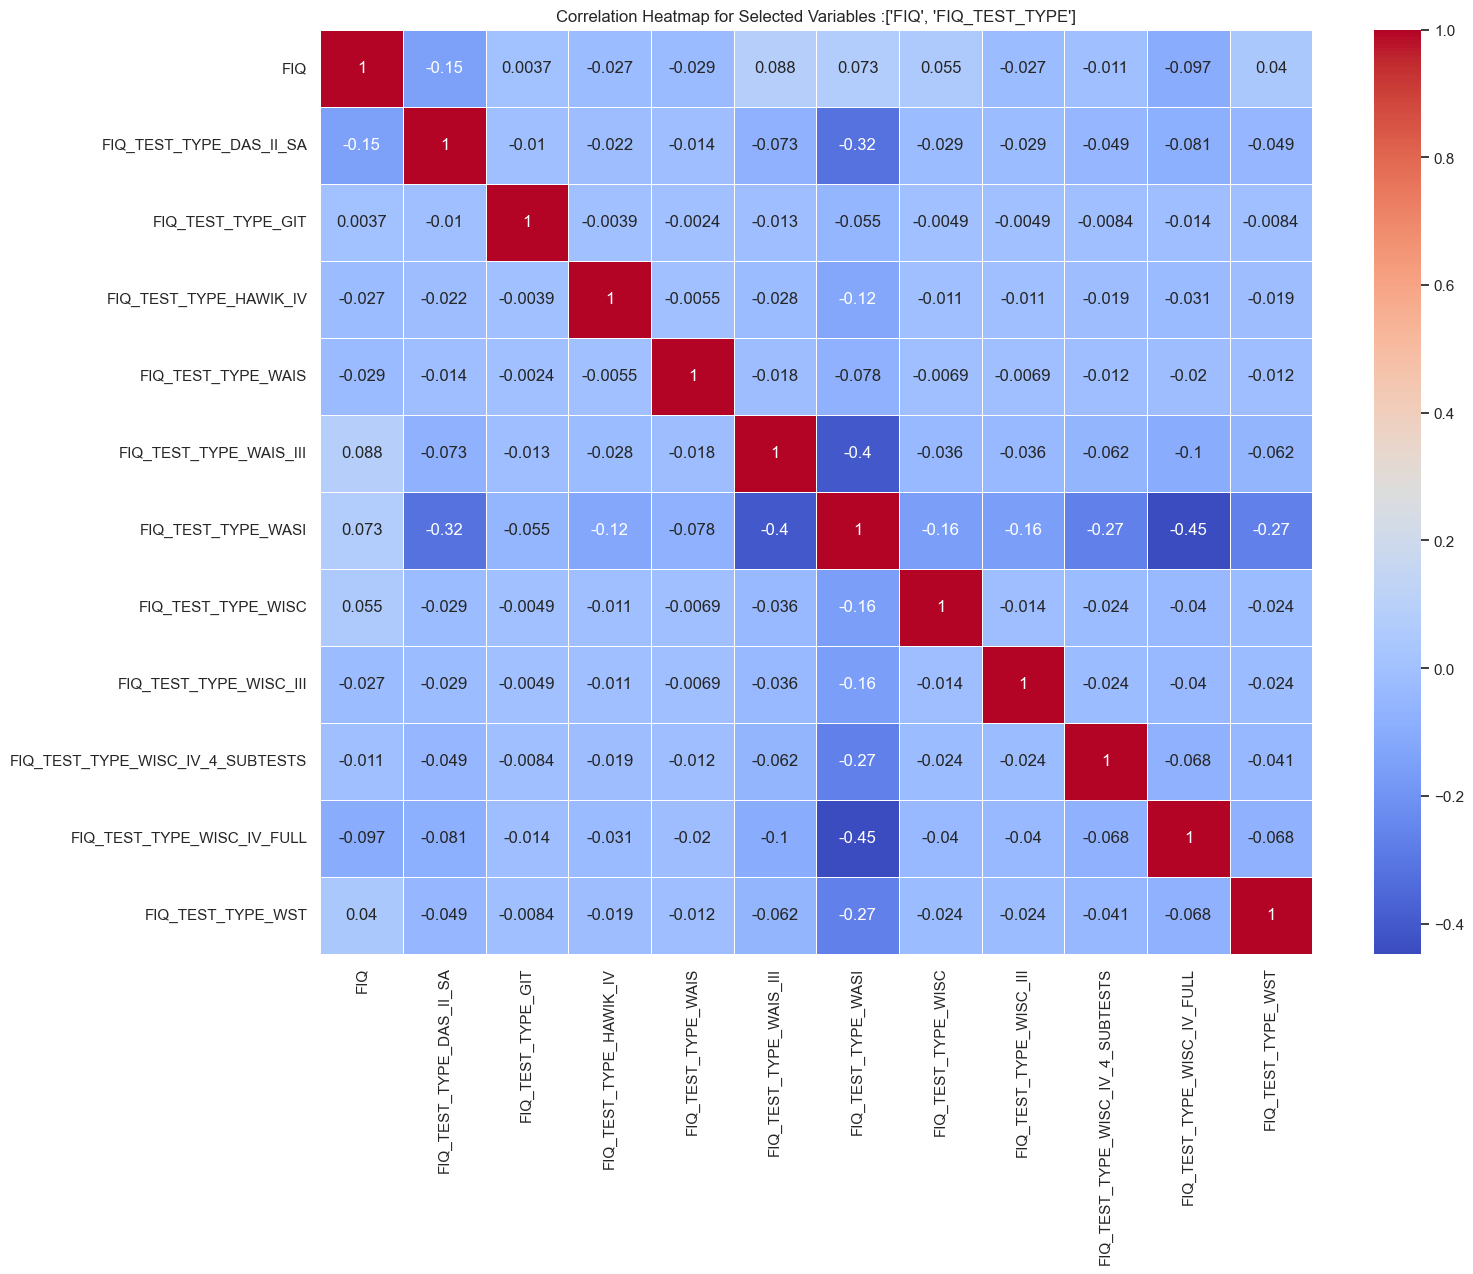

In [215]:
corrheatmap([ 'FIQ', 'FIQ_TEST_TYPE'])


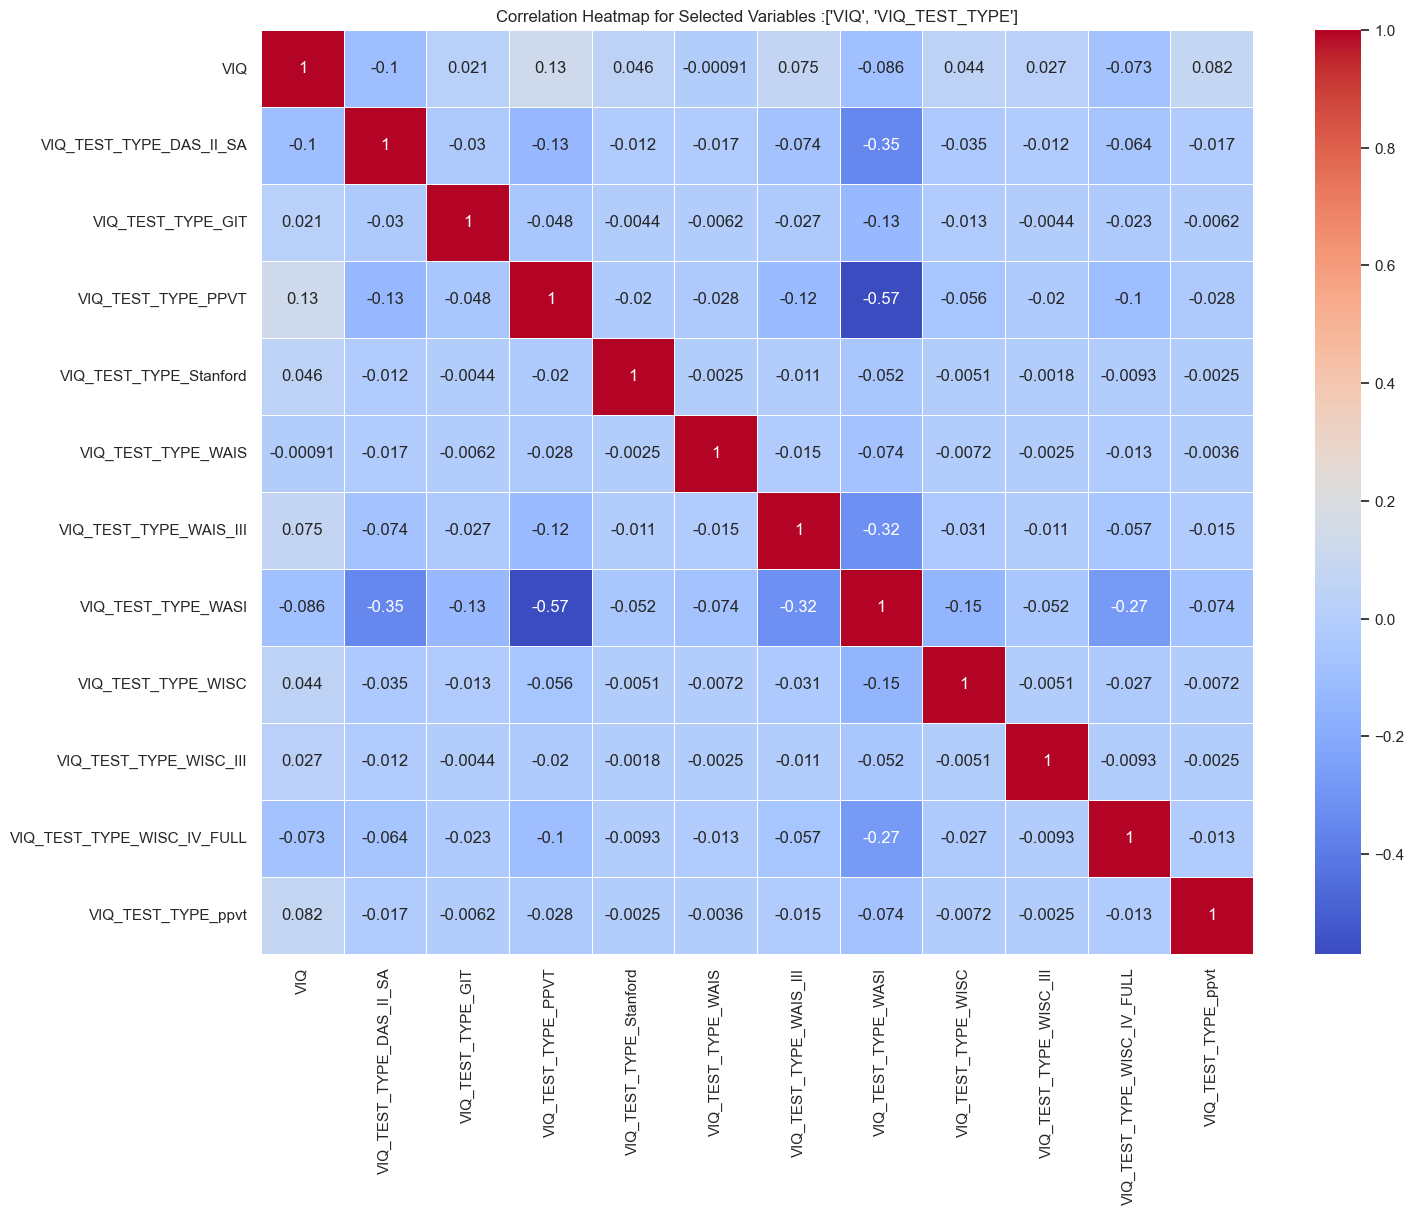

In [216]:
corrheatmap([ 'VIQ', 'VIQ_TEST_TYPE'])

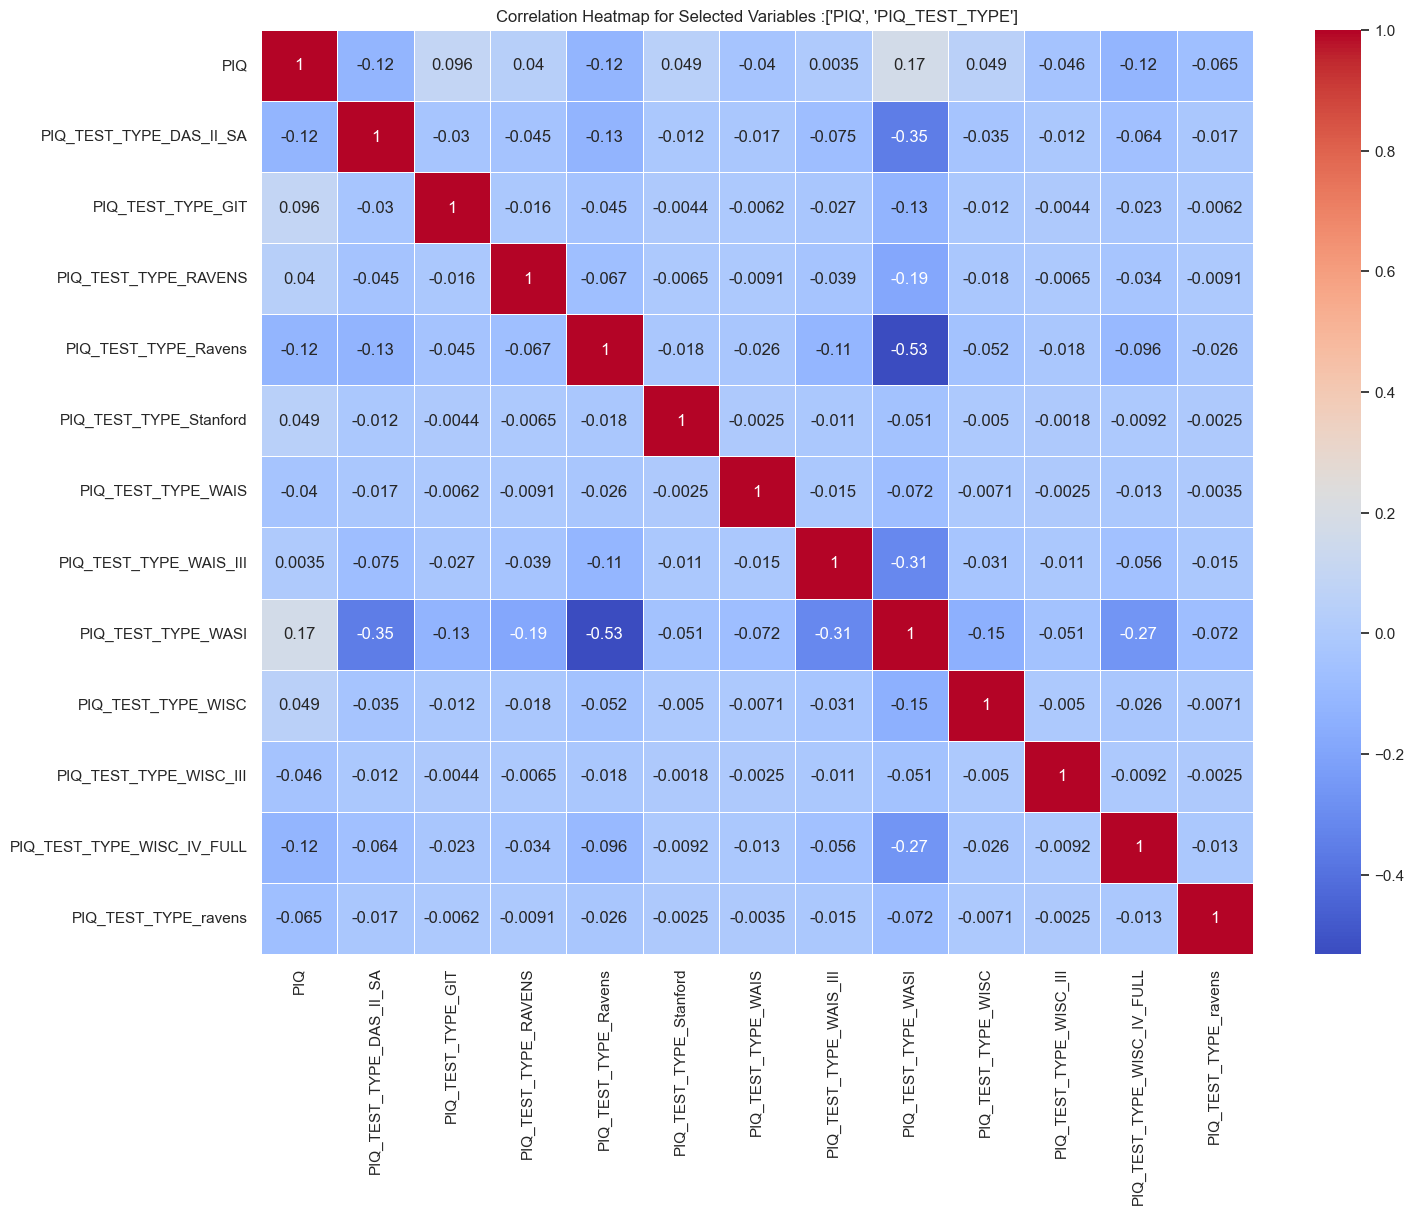

In [217]:
corrheatmap([ 'PIQ', 'PIQ_TEST_TYPE'])

The test types show weak or negligible correlations with FIQ.

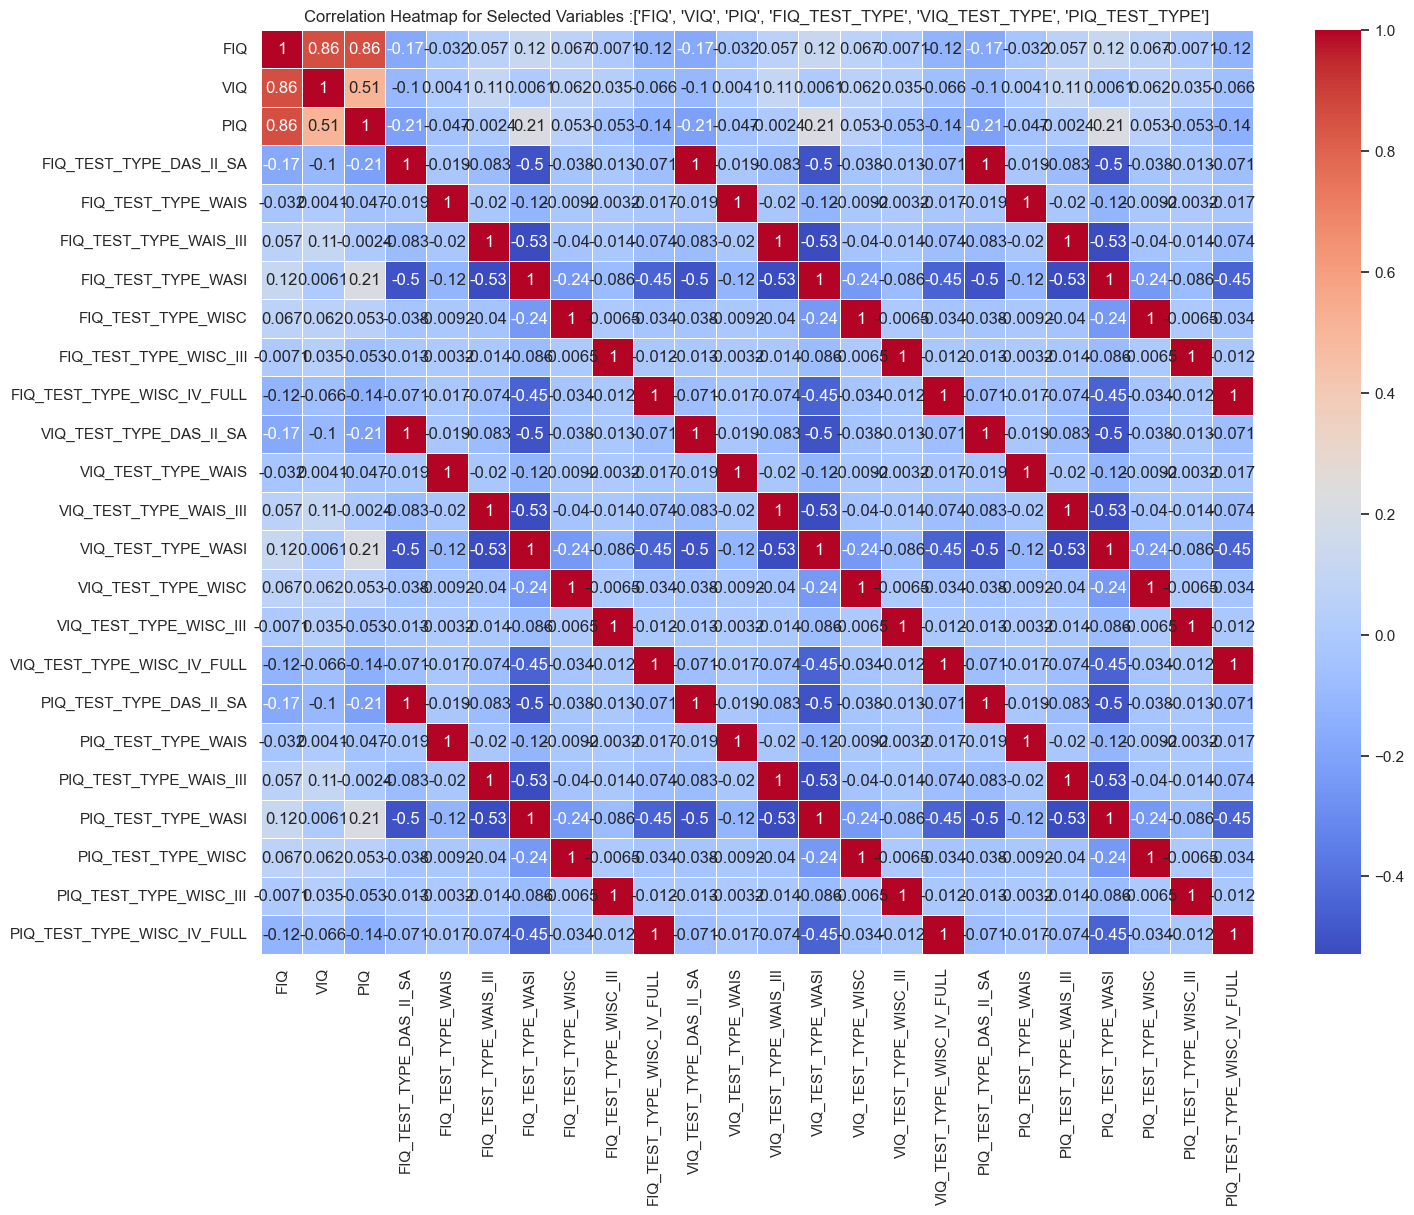

In [218]:
corrheatmap([ 'FIQ', 'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE'])

Since the test types for VIQ, FIQ and PIQ do not bring much information except for the test type and they compose an important part of the dataset, we can drop them.

In [219]:
data.drop(['FIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'VIQ_TEST_TYPE'], axis=1, inplace=True)

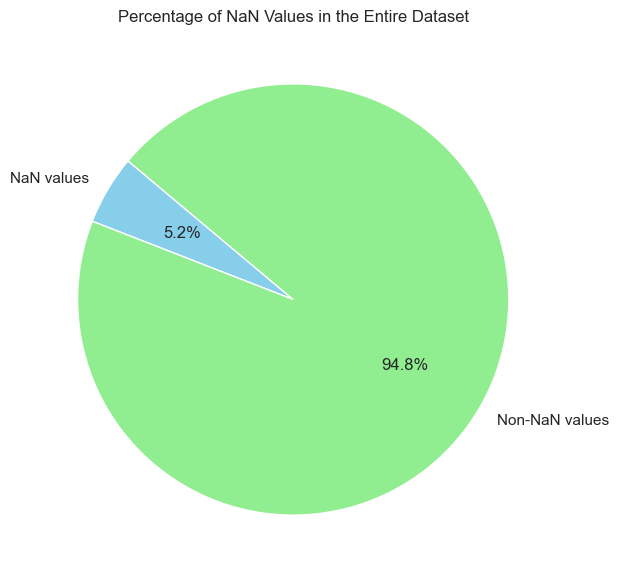

In [220]:
nanpie(data)

In [221]:
data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ CURRENT_MED_STATUS  \
SUB_ID                                                                       
50003          1        24.45    1  124.0  128.0  115.0                  1   
50004          1        19.09    1  113.0  108.0  117.0                  0   
50005          1        13.73    2  119.0  117.0  118.0                  1   
50006          1        13.37    1  109.0   99.0  119.0                  0   
50007          1        17.78    1  110.0  106.0  112.0                  0   
...          ...          ...  ...    ...    ...    ...                ...   
51583          1        35.00    1   95.0  105.0   84.0                  0   
51584          1        49.00    1    NaN  133.0  135.0                  0   
51585          1        27.00    1   96.0   99.0  106.0                  0   
51606          1        29.00    2  118.0    NaN    NaN                  0   
51607          1        26.00    1  110.0    NaN    NaN                  0   

        EYE_STATUS_AT_SCAN  HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                                                  
50003                    2             0             1  
50004                    2             0             1  
50005                    2             0             1  
50006                    2             1             0  
50007                    2             0             1  
...                    ...           ...           ...  
51583                    2             0             0  
51584                    2             0             0  
51585                    2             0             0  
51606                    2             0             1  
51607                    2             0             1  

[750 rows x 10 columns]

What about 'CURRENT_MED_STATUS'?

In [222]:
selected_columns = data[['DX_GROUP', 'CURRENT_MED_STATUS']]
selected_columns.head()

DX_GROUP CURRENT_MED_STATUS
SUB_ID                             
50003          1                  1
50004          1                  0
50005          1                  1
50006          1                  0
50007          1                  0

In [223]:
selected_columns['CURRENT_MED_STATUS'] = pd.to_numeric(selected_columns['CURRENT_MED_STATUS'], errors='coerce')
count_ones_per_group = selected_columns[selected_columns['CURRENT_MED_STATUS'] == 1].groupby('DX_GROUP').size()

count_ones_per_group

C:\Users\merye\AppData\Local\Temp\ipykernel_1836\3583743244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['CURRENT_MED_STATUS'] = pd.to_numeric(selected_columns['CURRENT_MED_STATUS'], errors='coerce')


DX_GROUP
1    85
2     2
dtype: int64

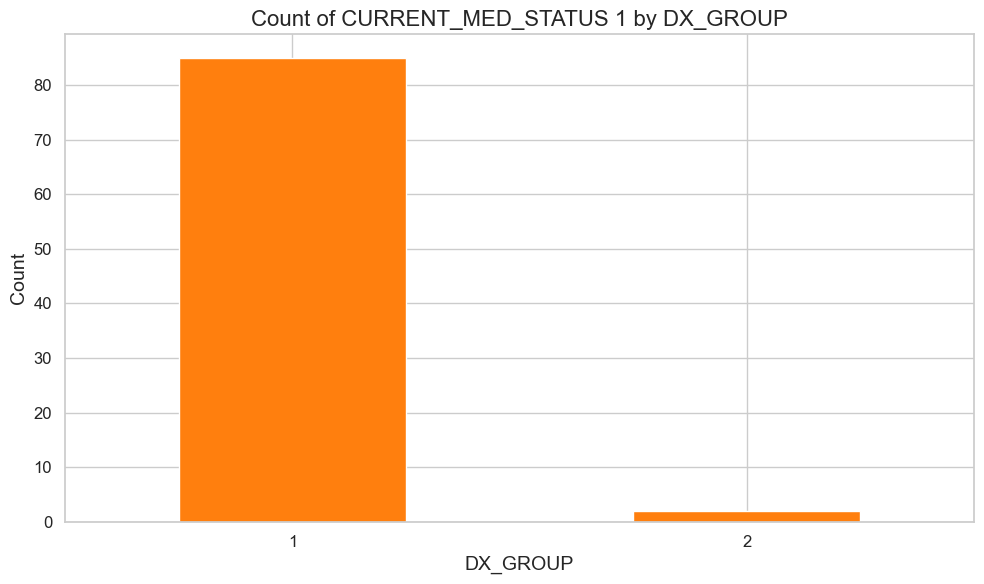

In [224]:
plt.figure(figsize=(10, 6))
count_ones_per_group.plot(kind='bar', color='#ff7f0e')
plt.title('Count of CURRENT_MED_STATUS 1 by DX_GROUP', fontsize=16)
plt.xlabel('DX_GROUP', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Let's inspect the column related to med_status

In [225]:
phenotypic_data['MEDICATION_NAME']

0              NaN
1       Fluoxetine
2              NaN
3       Fluoxetine
4              NaN
           ...    
1107           NaN
1108           NaN
1109           NaN
1110           NaN
1111           NaN
Name: MEDICATION_NAME, Length: 1112, dtype: object

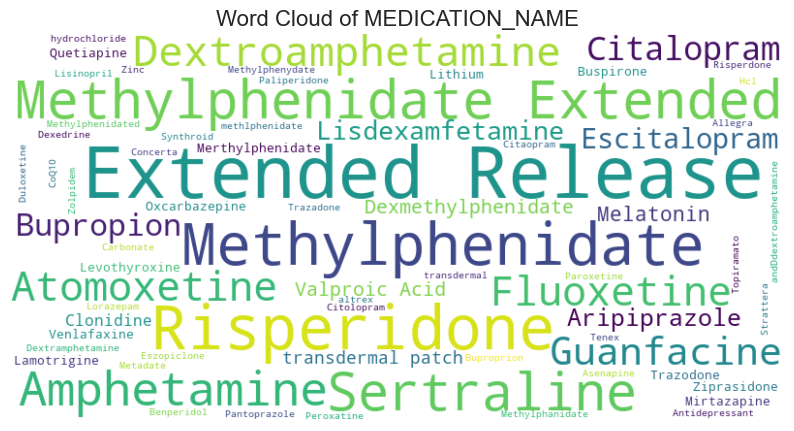

In [226]:
medication_names = phenotypic_data['MEDICATION_NAME'].dropna()

text = ' '.join(medication_names)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of MEDICATION_NAME', fontsize=16)
plt.show()

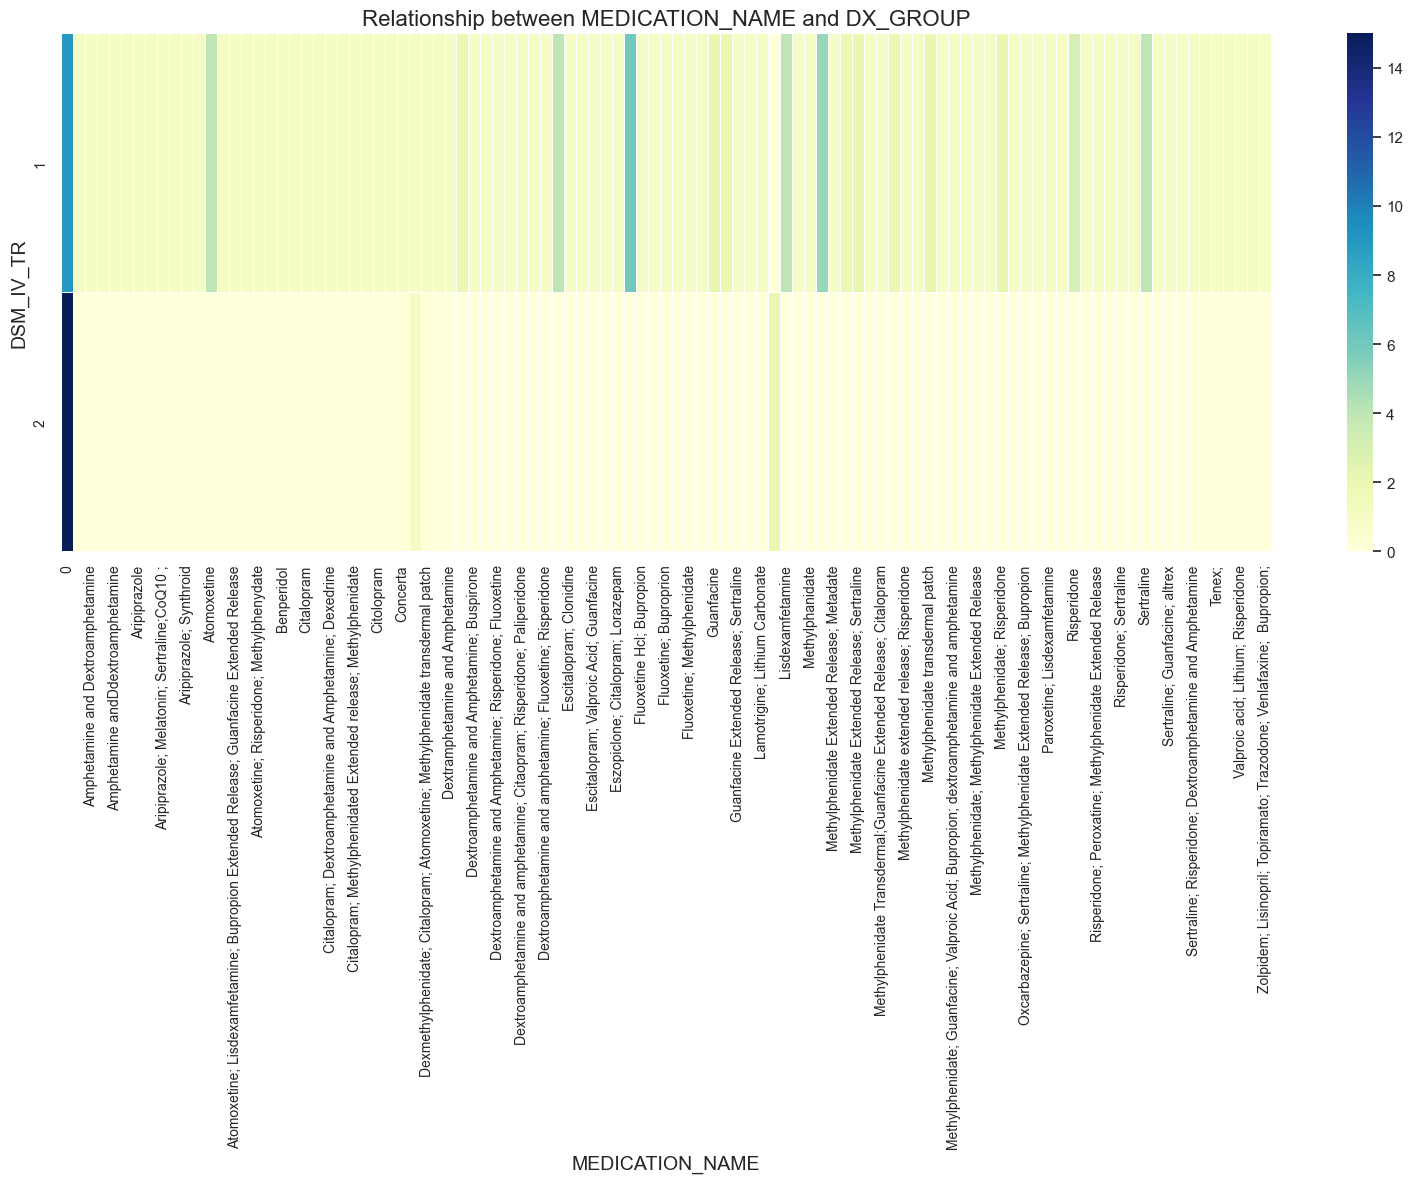

In [227]:
contingency_table = pd.crosstab(phenotypic_data['DX_GROUP'], phenotypic_data['MEDICATION_NAME'])
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 12))
sns.heatmap(contingency_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Relationship between MEDICATION_NAME and DX_GROUP', fontsize=16)
plt.xlabel('MEDICATION_NAME', fontsize=14)
plt.ylabel('DSM_IV_TR', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

By looking up some of the medications: the majority of them are anti-psychotics or psychotic stimulant which are more than likely to need already a diagnosis to be taken by someone with ASD.

('Current_MED_STATUS') could skew the model, but in this case we are also getting information for comobordity.

The people who take medication are overwhelmingly ASD, and if we look at the related column with the notes about the types of medication:

In [228]:
data = data.drop(['CURRENT_MED_STATUS'], axis=1)

In [229]:
data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ  EYE_STATUS_AT_SCAN  \
SUB_ID                                                                        
50003          1        24.45    1  124.0  128.0  115.0                   2   
50004          1        19.09    1  113.0  108.0  117.0                   2   
50005          1        13.73    2  119.0  117.0  118.0                   2   
50006          1        13.37    1  109.0   99.0  119.0                   2   
50007          1        17.78    1  110.0  106.0  112.0                   2   
...          ...          ...  ...    ...    ...    ...                 ...   
51583          1        35.00    1   95.0  105.0   84.0                   2   
51584          1        49.00    1    NaN  133.0  135.0                   2   
51585          1        27.00    1   96.0   99.0  106.0                   2   
51606          1        29.00    2  118.0    NaN    NaN                   2   
51607          1        26.00    1  110.0    NaN    NaN                   2   

        HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                              
50003              0             1  
50004              0             1  
50005              0             1  
50006              1             0  
50007              0             1  
...              ...           ...  
51583              0             0  
51584              0             0  
51585              0             0  
51606              0             1  
51607              0             1  

[750 rows x 9 columns]

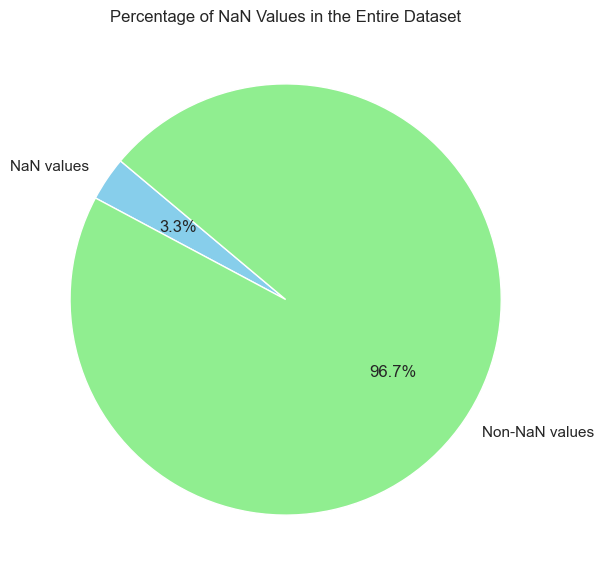

In [230]:
nanpie(data)

In [231]:
nan_counts = data.isna().sum()
nan_counts

DX_GROUP                0
AGE_AT_SCAN             0
SEX                     0
FIQ                    57
VIQ                   123
PIQ                   118
EYE_STATUS_AT_SCAN      0
HANDEDNESS_L            0
HANDEDNESS_R            0
dtype: int64

In [232]:
data = data.dropna(subset=['VIQ'])

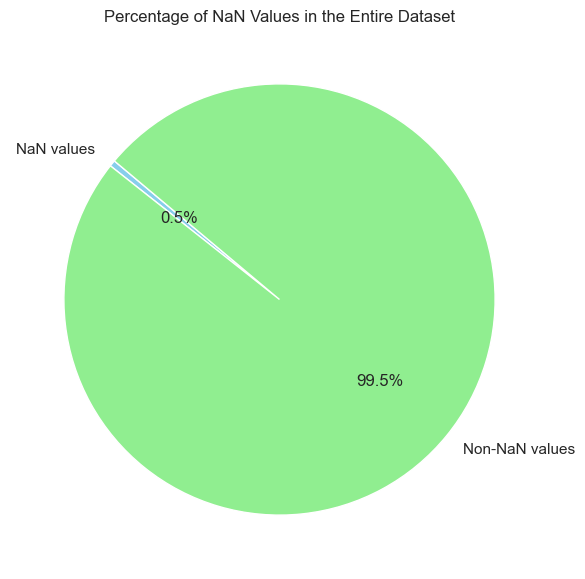

In [233]:
nanpie(data)

In [234]:
nan_counts = data.isna().sum()
nan_counts

DX_GROUP               0
AGE_AT_SCAN            0
SEX                    0
FIQ                   37
VIQ                    0
PIQ                    5
EYE_STATUS_AT_SCAN     0
HANDEDNESS_L           0
HANDEDNESS_R           0
dtype: int64

In [235]:
data = data.dropna(subset=['FIQ'])

Sparsity of the dataset: 0.011111111111111112 %


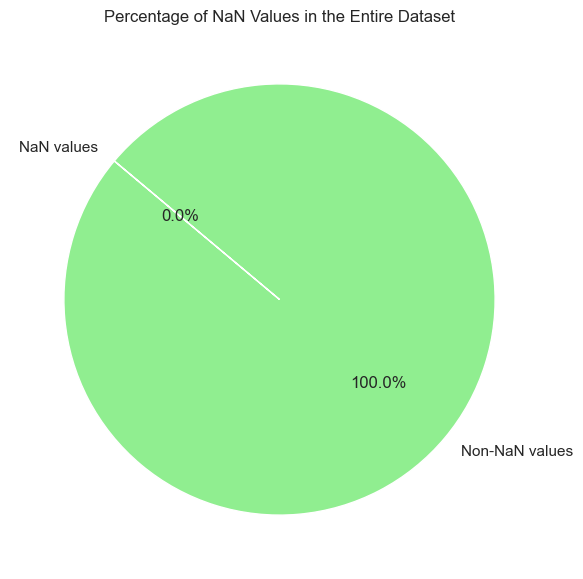

In [236]:
print('Sparsity of the dataset:', getsparsity(data), '%')
nanpie(data)

In [237]:
data = data.dropna(subset=['PIQ'])

Sparsity of the dataset: 0.0 %


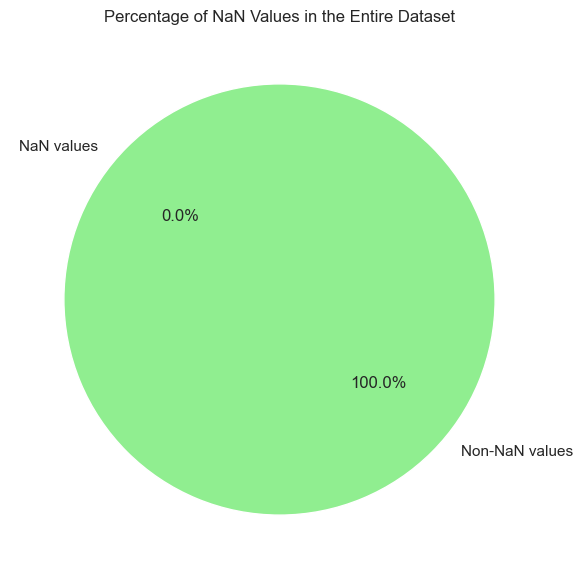

In [238]:
print('Sparsity of the dataset:', getsparsity(data), '%')
nanpie(data)

In [239]:
data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ  EYE_STATUS_AT_SCAN  \
SUB_ID                                                                        
50003          1        24.45    1  124.0  128.0  115.0                   2   
50004          1        19.09    1  113.0  108.0  117.0                   2   
50005          1        13.73    2  119.0  117.0  118.0                   2   
50006          1        13.37    1  109.0   99.0  119.0                   2   
50007          1        17.78    1  110.0  106.0  112.0                   2   
...          ...          ...  ...    ...    ...    ...                 ...   
51491          2        56.20    1  120.0  109.0  128.0                   2   
51493          2        29.20    2  102.0  101.0  103.0                   2   
51578          1        33.00    1  125.0  129.0  113.0                   2   
51583          1        35.00    1   95.0  105.0   84.0                   2   
51585          1        27.00    1   96.0   99.0  106.0                   2   

        HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                              
50003              0             1  
50004              0             1  
50005              0             1  
50006              1             0  
50007              0             1  
...              ...           ...  
51491              0             1  
51493              0             1  
51578              0             0  
51583              0             0  
51585              0             0  

[589 rows x 9 columns]

In [240]:
data.columns

Index(['DX_GROUP', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'VIQ', 'PIQ',
       'EYE_STATUS_AT_SCAN', 'HANDEDNESS_L', 'HANDEDNESS_R'],
      dtype='object')

In [241]:
nan_counts = data.isna().sum()
nan_counts.sum()

0

#### Class Balance

In [242]:
summary_stats = data.describe()
print(summary_stats)

         DX_GROUP  AGE_AT_SCAN         SEX         FIQ         VIQ        PIQ  \
count  589.000000   589.000000  589.000000  589.000000  589.000000  589.00000   
mean     1.512733    16.786968    1.176570  108.415959  108.597623  106.78438   
std      0.500263     6.593239    0.381629   14.812323   15.866987   15.44937   
min      1.000000     6.470000    1.000000   41.000000   42.000000   37.00000   
25%      1.000000    12.620000    1.000000   99.000000   98.000000   96.00000   
50%      2.000000    15.200000    1.000000  108.000000  109.000000  107.00000   
75%      2.000000    19.228000    1.000000  118.500000  119.000000  118.00000   
max      2.000000    56.200000    2.000000  148.000000  180.000000  155.00000   

       EYE_STATUS_AT_SCAN  HANDEDNESS_L  HANDEDNESS_R  
count          589.000000    589.000000    589.000000  
mean             1.222411      0.062818      0.544992  
std              0.416219      0.242842      0.498395  
min              1.000000      0.000000      0

In [243]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [244]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 589
Number of columns: 9


Sparsity of the dataset: 0.0 %


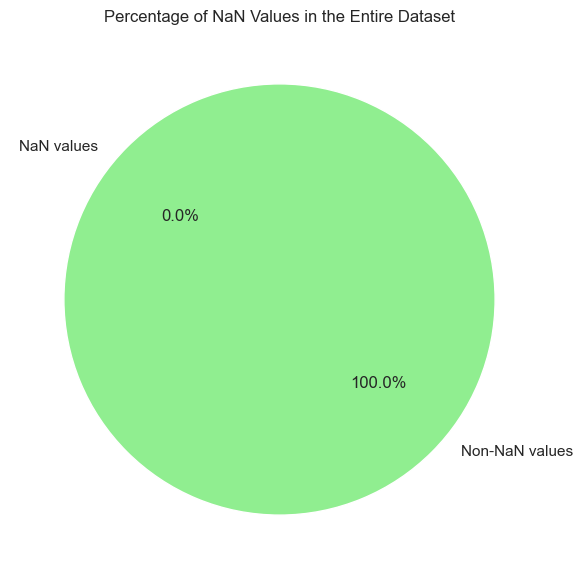

In [245]:
print(f"Sparsity of the dataset: {getsparsity(data)} %")
nanpie(data)

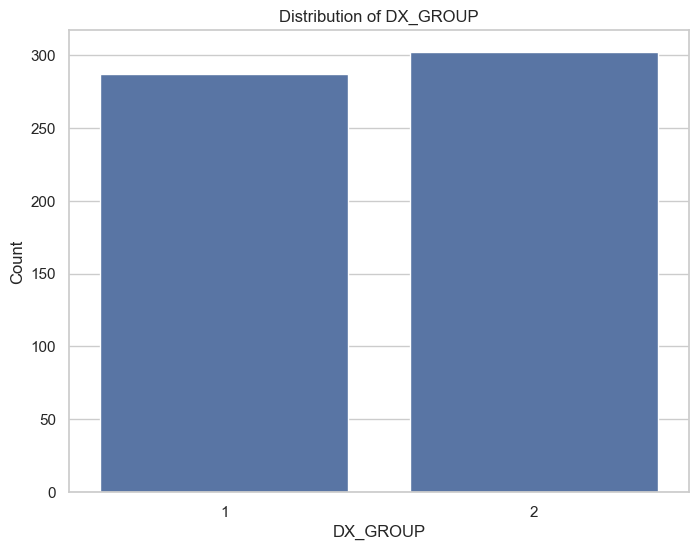

In [246]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='DX_GROUP')
plt.title('Distribution of DX_GROUP')
plt.xlabel('DX_GROUP')
plt.ylabel('Count')
plt.show()

In [247]:
gender_count_by_dxgroup = data.groupby(['DX_GROUP', 'SEX']).size().unstack()

gender_count_by_dxgroup

SEX         1   2
DX_GROUP         
1         250  37
2         235  67

<Figure size 1000x600 with 0 Axes>

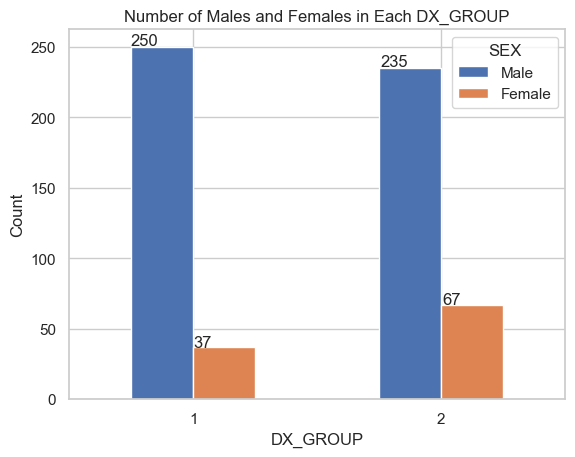

In [248]:
plt.figure(figsize=(10, 6))
ax = gender_count_by_dxgroup.plot(kind='bar', stacked=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Number of Males and Females in Each DX_GROUP')
plt.xlabel('DX_GROUP')
plt.ylabel('Count')
plt.legend(['Male', 'Female'], title='SEX')
plt.xticks(rotation=0)
plt.show()

In [249]:
age_sex_summary = data.groupby(['DX_GROUP', 'SEX'])['AGE_AT_SCAN'].describe()

age_sex_summary

count       mean       std   min      25%    50%        75%  \
DX_GROUP SEX                                                                
1        1    250.0  17.071826  7.029437  7.00  12.3825  15.66  19.636925   
         2     37.0  15.597838  6.236823  8.58  11.5600  14.06  16.800000   
2        1    235.0  17.006258  6.464543  6.47  12.8050  15.60  19.744550   
         2     67.0  15.611594  5.367227  8.26  12.8200  14.06  17.255000   

                  max  
DX_GROUP SEX           
1        1    50.2231  
         2    38.7600  
2        1    56.2000  
         2    30.0000

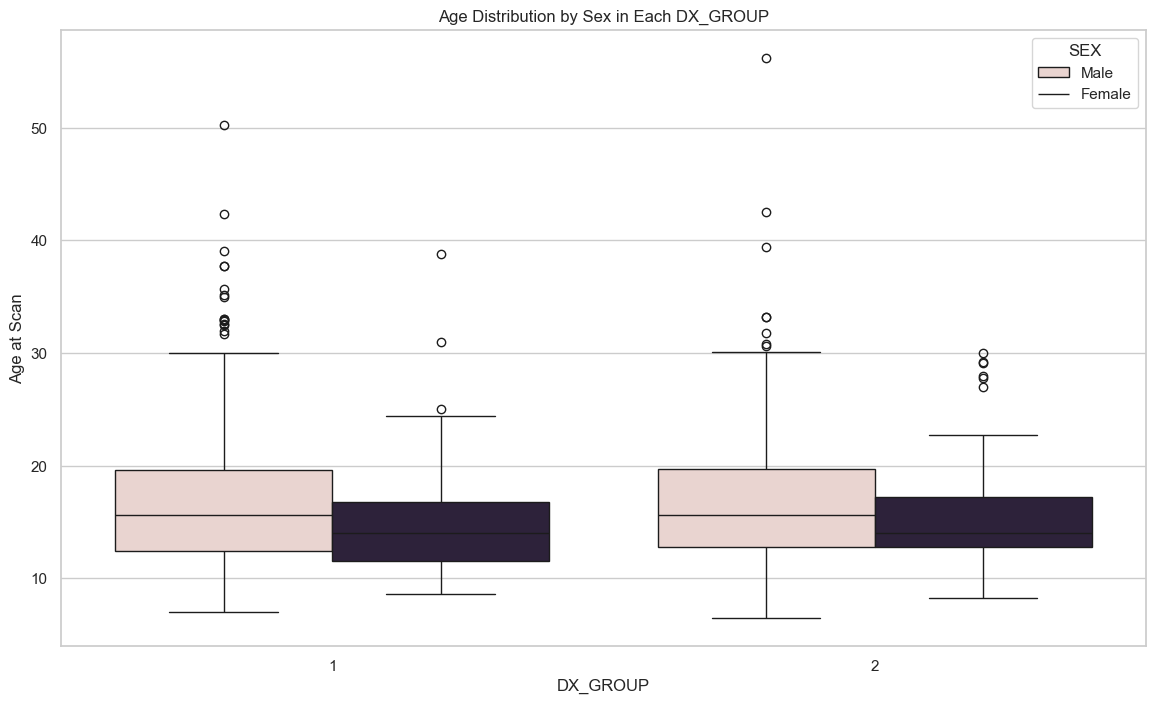

In [250]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='DX_GROUP', y='AGE_AT_SCAN', hue='SEX')
plt.title('Age Distribution by Sex in Each DX_GROUP')
plt.xlabel('DX_GROUP')
plt.ylabel('Age at Scan')
plt.legend(title='SEX', labels=['Male', 'Female'])
plt.show()

In [251]:
variance_age_by_group = data.groupby(['DX_GROUP', 'SEX'])['AGE_AT_SCAN'].var()

variance_age_by_group

DX_GROUP  SEX
1         1      49.412989
          2      38.897956
2         1      41.790320
          2      28.807120
Name: AGE_AT_SCAN, dtype: float64

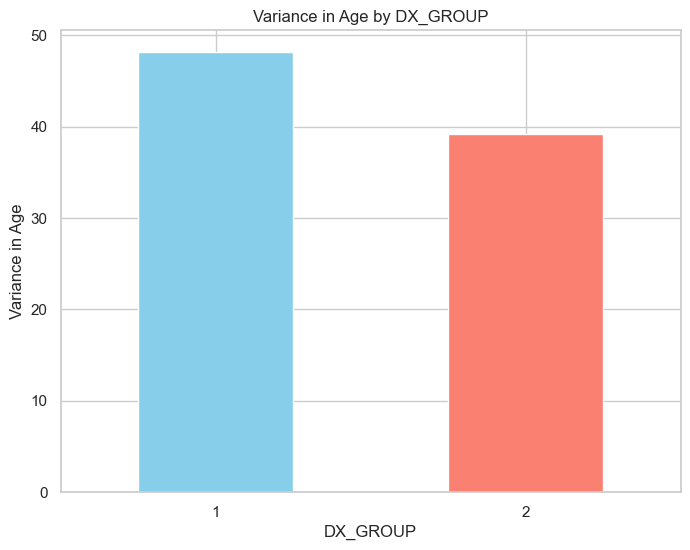

In [252]:
variance_age_by_dxgroup = data.groupby('DX_GROUP')['AGE_AT_SCAN'].var()

plt.figure(figsize=(8, 6))
variance_age_by_dxgroup.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Variance in Age by DX_GROUP')
plt.xlabel('DX_GROUP')
plt.ylabel('Variance in Age')
plt.xticks(rotation=0)
plt.show()

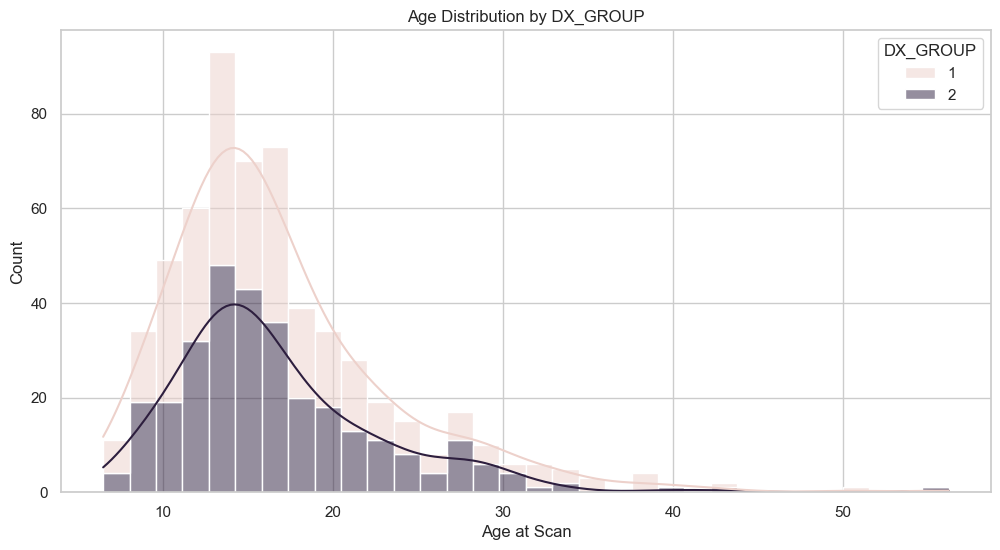

In [253]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='AGE_AT_SCAN', hue='DX_GROUP', multiple='stack', kde=True)
plt.title('Age Distribution by DX_GROUP')
plt.xlabel('Age at Scan')
plt.ylabel('Count')
plt.show()

In [254]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
numeric_data = data.drop(columns=non_numeric_columns)
correlation_matrix_numeric = numeric_data.corr()
correlation_with_dx_group_numeric = correlation_matrix_numeric['DX_GROUP'].sort_values(ascending=False)
top_correlations_numeric = correlation_with_dx_group_numeric.head(10)
bottom_correlations_numeric = correlation_with_dx_group_numeric.tail(10)

top_correlations_numeric, bottom_correlations_numeric


(DX_GROUP              1.000000
 VIQ                   0.184798
 FIQ                   0.160629
 SEX                   0.121824
 PIQ                   0.072421
 HANDEDNESS_R          0.043740
 EYE_STATUS_AT_SCAN    0.014963
 AGE_AT_SCAN          -0.014033
 HANDEDNESS_L         -0.041593
 Name: DX_GROUP, dtype: float64,
 DX_GROUP              1.000000
 VIQ                   0.184798
 FIQ                   0.160629
 SEX                   0.121824
 PIQ                   0.072421
 HANDEDNESS_R          0.043740
 EYE_STATUS_AT_SCAN    0.014963
 AGE_AT_SCAN          -0.014033
 HANDEDNESS_L         -0.041593
 Name: DX_GROUP, dtype: float64)

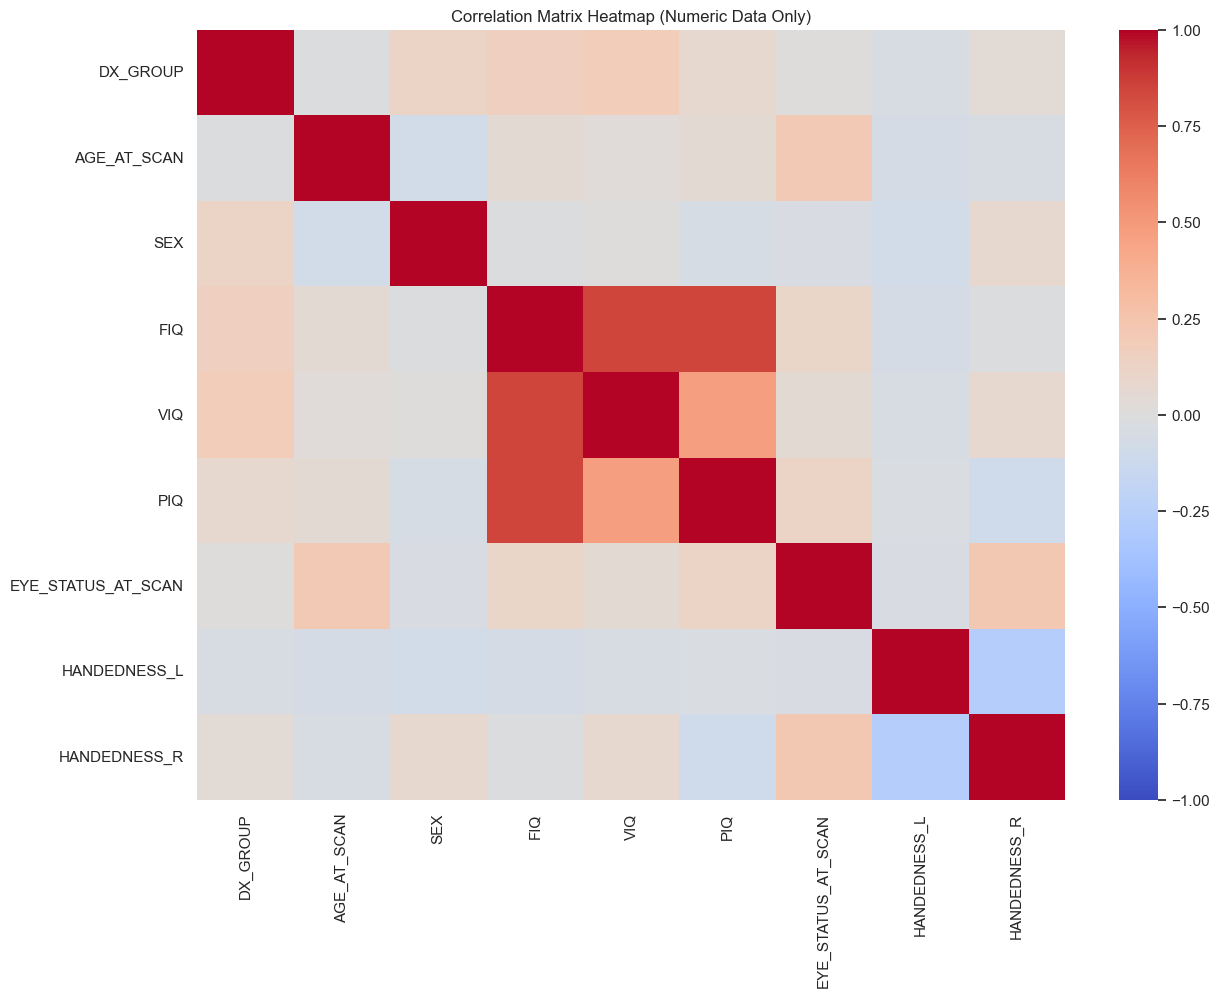

In [255]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_numeric, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (Numeric Data Only)')
plt.show()

#### Mutual information

In [256]:
data = data.dropna()

In [257]:
getsparsity(data)

0.0

In [258]:
from sklearn.preprocessing import LabelEncoder # type: ignore

encoded_data = data.copy()
label_encoder = LabelEncoder()

for column in encoded_data.select_dtypes(include=['object']).columns:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column].astype(str))

non_numeric_columns_after_encoding = encoded_data.select_dtypes(include=['object']).columns
non_numeric_columns_after_encoding, encoded_data.head()

(Index([], dtype='object'),
         DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ  EYE_STATUS_AT_SCAN  \
 SUB_ID                                                                        
 50003          1        24.45    1  124.0  128.0  115.0                   2   
 50004          1        19.09    1  113.0  108.0  117.0                   2   
 50005          1        13.73    2  119.0  117.0  118.0                   2   
 50006          1        13.37    1  109.0   99.0  119.0                   2   
 50007          1        17.78    1  110.0  106.0  112.0                   2   
 
         HANDEDNESS_L  HANDEDNESS_R  
 SUB_ID                              
 50003              0             1  
 50004              0             1  
 50005              0             1  
 50006              1             0  
 50007              0             1  )

In [259]:
X = encoded_data.drop(columns='DX_GROUP')
y = encoded_data['DX_GROUP']

In [260]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (589, 8)
Shape of y: (589,)


In [261]:
from sklearn.feature_selection import mutual_info_classif


X = encoded_data.drop(columns='DX_GROUP')
y = encoded_data['DX_GROUP']

mutual_info = mutual_info_classif(X, y)

mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

mutual_info_df


Feature  Mutual Information
0                 PIQ            0.059445
1                 FIQ            0.056984
2        HANDEDNESS_L            0.038343
3                 VIQ            0.038085
4  EYE_STATUS_AT_SCAN            0.035556
5         AGE_AT_SCAN            0.019897
6                 SEX            0.000000
7        HANDEDNESS_R            0.000000

In [262]:
encoded_data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ  EYE_STATUS_AT_SCAN  \
SUB_ID                                                                        
50003          1        24.45    1  124.0  128.0  115.0                   2   
50004          1        19.09    1  113.0  108.0  117.0                   2   
50005          1        13.73    2  119.0  117.0  118.0                   2   
50006          1        13.37    1  109.0   99.0  119.0                   2   
50007          1        17.78    1  110.0  106.0  112.0                   2   
...          ...          ...  ...    ...    ...    ...                 ...   
51491          2        56.20    1  120.0  109.0  128.0                   2   
51493          2        29.20    2  102.0  101.0  103.0                   2   
51578          1        33.00    1  125.0  129.0  113.0                   2   
51583          1        35.00    1   95.0  105.0   84.0                   2   
51585          1        27.00    1   96.0   99.0  106.0                   2   

        HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                              
50003              0             1  
50004              0             1  
50005              0             1  
50006              1             0  
50007              0             1  
...              ...           ...  
51491              0             1  
51493              0             1  
51578              0             0  
51583              0             0  
51585              0             0  

[589 rows x 9 columns]

In [263]:
thresholds = mutual_info_df['Mutual Information'].quantile([0.1, 0.3])

strongly_relevant_features = mutual_info_df[mutual_info_df['Mutual Information'] > thresholds[0.3]]
weakly_relevant_features = mutual_info_df[(mutual_info_df['Mutual Information'] <= thresholds[0.3])]

print(f"Strongly relevant features are \n : {strongly_relevant_features}\n\nWeakly relevant features\n{weakly_relevant_features}")

Strongly relevant features are 
 :               Feature  Mutual Information
0                 PIQ            0.059445
1                 FIQ            0.056984
2        HANDEDNESS_L            0.038343
3                 VIQ            0.038085
4  EYE_STATUS_AT_SCAN            0.035556

Weakly relevant features
        Feature  Mutual Information
5   AGE_AT_SCAN            0.019897
6           SEX            0.000000
7  HANDEDNESS_R            0.000000


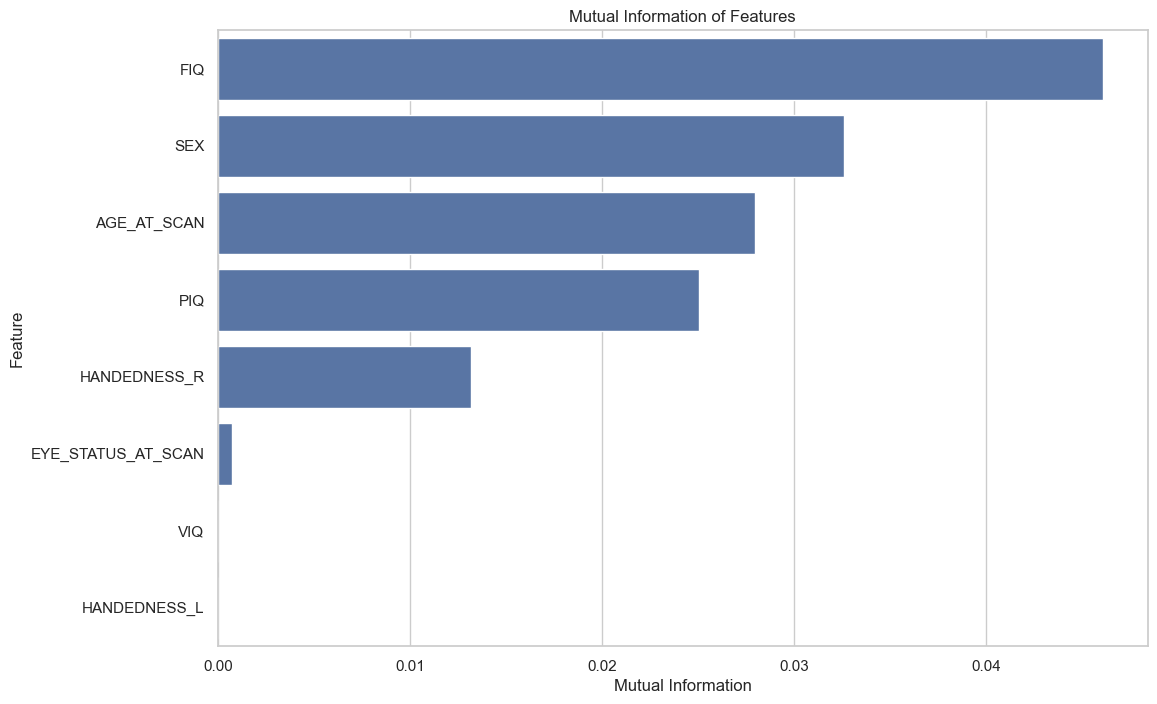

In [264]:
X = data.drop(columns=['DX_GROUP'])
y = data['DX_GROUP']

X_encoded = pd.get_dummies(X, drop_first=True)

mi = mutual_info_classif(X_encoded, y)

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information of Features')
plt.show()

### Conclusion

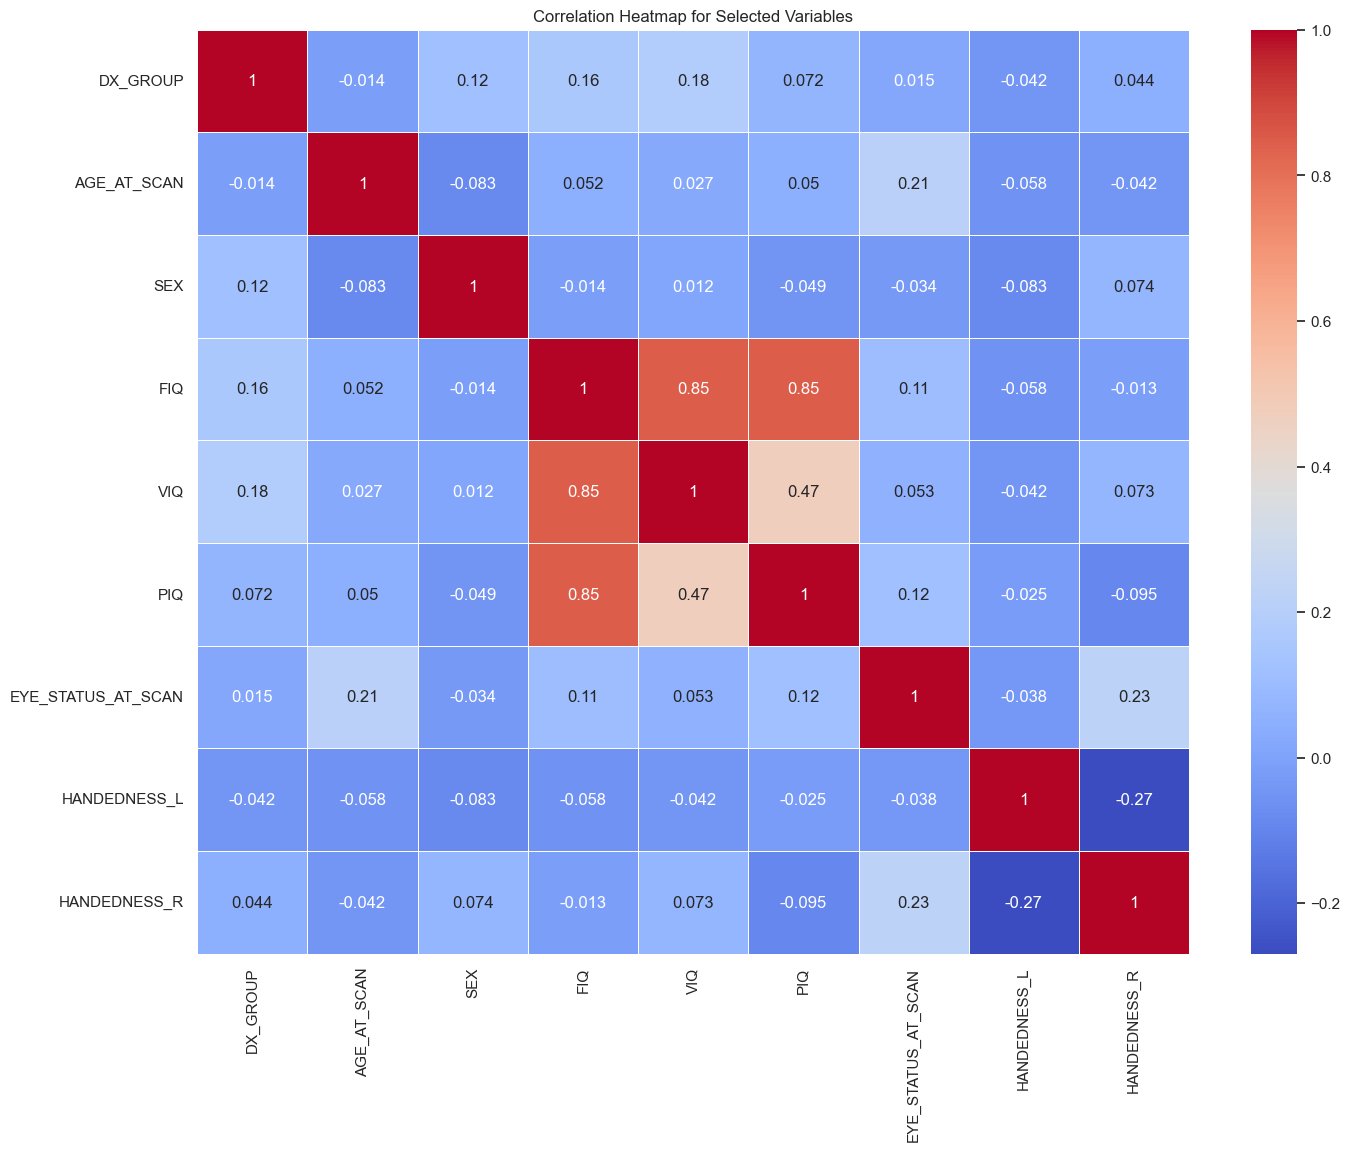

In [265]:
plt.figure(figsize=(16, 12))
selected_corr_columns = data.columns
selected_corr_data = data[selected_corr_columns].dropna()
corr_matrix = selected_corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

In [266]:
data

DX_GROUP  AGE_AT_SCAN  SEX    FIQ    VIQ    PIQ  EYE_STATUS_AT_SCAN  \
SUB_ID                                                                        
50003          1        24.45    1  124.0  128.0  115.0                   2   
50004          1        19.09    1  113.0  108.0  117.0                   2   
50005          1        13.73    2  119.0  117.0  118.0                   2   
50006          1        13.37    1  109.0   99.0  119.0                   2   
50007          1        17.78    1  110.0  106.0  112.0                   2   
...          ...          ...  ...    ...    ...    ...                 ...   
51491          2        56.20    1  120.0  109.0  128.0                   2   
51493          2        29.20    2  102.0  101.0  103.0                   2   
51578          1        33.00    1  125.0  129.0  113.0                   2   
51583          1        35.00    1   95.0  105.0   84.0                   2   
51585          1        27.00    1   96.0   99.0  106.0                   2   

        HANDEDNESS_L  HANDEDNESS_R  
SUB_ID                              
50003              0             1  
50004              0             1  
50005              0             1  
50006              1             0  
50007              0             1  
...              ...           ...  
51491              0             1  
51493              0             1  
51578              0             0  
51583              0             0  
51585              0             0  

[589 rows x 9 columns]

In [267]:
getsparsity(data)

0.0

In [268]:
data.to_csv('sub_id_processed_data.csv', index=True)